In [1]:
import math
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline


import time as t

In [2]:
import os
import gym
from gym import spaces, envs
import argparse
import numpy as np
import itertools
import time
from builtins import input
import random
#import randomizer

#from randomizer.wrappers import RandomizedEnvWrapper
from mujoco_py.modder import TextureModder, MaterialModder
import cv2
import pybullet as p

In [3]:
#Function to create the enviorments

env = envs.make("FetchSlide-v1")

path_numpy_actions = "Fetch_data/fetch_" 
path_data_excels = "Fetch_data/fetch_"
Experiment = 100


parameters_to_change= ["mass","inertia","dmin_equ","dmax_equ","width_equ","mid_point_equ","power_equ","damping_equ","stiffness_equ"]

#Get parameters values
parameters_values = list(np.load("Parameters_train_tcp_euc_mocap_mix_reduced.npy"))
#parameters_values = env.env.Get_Mujoco_Parameters(parameters_to_change,unique_List = True)

#Get experiment numpy actions and parameters
np_actions_goal_puck = np.load( path_numpy_actions + str(Experiment) + '.npz' )

#Get Original numpy results
np_real_robot = env.env.Excel_TCP_Joints_2_Numpy(path_data_excels + str(Experiment) + '.xlsx' )
np_real_robot_pos = np_real_robot[:,7:]

#convert euler to quaternion
np_aux = np.zeros((np_real_robot_pos.shape[0],np_real_robot_pos.shape[1]+1))
np_aux[:,:-1] = np_real_robot_pos
for i in range(np_real_robot_pos.shape[0]):
    np_aux[i,-4:] = list( p.getQuaternionFromEuler(np_real_robot_pos[i,:-3]) )
np_real_robot_pos = np_aux.copy()

reward = env.env.exp_mocap_tcp_reward(parameters_to_change,parameters_values,np_actions_goal_puck,np_real_robot_pos,render = True,render_mode = "human")
np_experiment_robot = env.env.np_exp_tcp_sergi

np_difference = np_real_robot_pos-np_experiment_robot

np_euclidian_dist = np.sqrt(np_difference[:,0]*np_difference[:,0] + np_difference[:,1]*np_difference[:,1] + np_difference[:,2]*np_difference[:,2])
    
print("reward",reward)



Creating window glfw
Creating window glfw
reward -0.027184495056198896


In [4]:
np_difference
np.savetxt("difference.csv", np_difference, delimiter=",")

In [4]:
np_real_robot_pos
np.savetxt("pybullet.csv", np_real_robot_pos, delimiter=",")

In [5]:
np_experiment_robot
np.savetxt("Mujoco.csv", np_experiment_robot, delimiter=",")

In [6]:
np_euclidian_dist
np.savetxt("Euc_diff.csv", np_euclidian_dist, delimiter=",")

In [3]:
#Function to create the enviorments
#NOTE uncomment all the equality constains and joint_control=false
env = envs.make("FetchSlide-v1")


#ctrlrange', 'forcerange', 'gainprm', 'mass', 'inertia'
#env.env.Change_Mujoco_Parameters(["mass"],[100]*7)
#env.env.Change_Mujoco_Parameters(["inertia"],[100,100,100]*7)

render_mode = "human"
render = True
actions = []
observations = []
infos = []
numItr = 100
#fileName = "data_mujoco" + "_" + "fold_sideways" + "_" + str(numItr) + "_T_100_" + "L_11_" + "all_randomized_explicit" ".npz"

#actionDull = [random.uniform(-0.00001, 0.00001), random.uniform(-0.00001, 0.00001), random.uniform(-0.00001, 0.00001), random.uniform(-0.00001, 0.00001)]
obs = env.reset()





for n in range(1,16):

    Data_numpy = np.load("Fetch_data/fetch_"+str(n)+".npz")
    
    pos_goal = list(Data_numpy["goal"][0,:])
    pos_puck = list(Data_numpy["puck"][0,:])
    
    env.env.object_pos_from_base = pos_puck[:2]
    env.env.goal_pos_from_base = pos_goal
    
    obs = env.reset()
    
    actions_numpy = Data_numpy["actions"]
    actions_numpy_gripper = np.zeros([actions_numpy.shape[0],4])
    actions_numpy_gripper[:,:3] = actions_numpy

    for i in range (actions_numpy.shape[0]):
        actionRescaled = list(actions_numpy_gripper[i,:])
        if render: 
            env.render(mode=render_mode)
        #t.sleep(1)

        obs, reward, done, info = env.step(actionRescaled)
        env.Save_Data_On_Environment()
    env.Reset_Save_Data_On_Environment()
    

Creating window glfw
Creating window glfw


In [4]:
Params_to_mod = ["mass","inertia","stiffness","gainprm","ctrlrange","forcerange","slide_friction","spin_friction","roll_friction","dmin_equ","dmax_equ","width_equ","mid_point_equ","power_equ","damping_equ","stiffness_equ"]
#Params_to_mod = ["mass","inertia","stiffness","gainprm","ctrlrange"]

Original_Params = env.env.Get_Mujoco_Parameters(Params_to_mod,unique_List = False)

print("Original_Params ",Original_Params,"\n")
print("len(Original_Params)",len(Original_Params),"\n")

param_all = env.env.Get_Mujoco_Parameters(Params_to_mod,unique_List = True)



env.env.Change_Mujoco_Parameters(Params_to_mod,param_all)

Original_Params  [[1.37735, 1.16367, 1.16366, 0.930287, 0.678106, 0.678106, 0.500657, 2.0], [[0.00488868058728242, 0.00456999968315277, 0.0013513197295648071], [0.0113017, 0.011088, 0.00102532], [0.0111633, 0.010932, 0.00100671], [0.00834839, 0.008147, 0.000598606], [0.00165901, 0.001596, 0.000346988], [0.00170087, 0.001641, 0.00035013], [0.000650457, 0.00056985, 0.000310694], [0.001666666666666667, 0.001666666666666667, 0.0025000000000000005]], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [10.0, 100.0, 10.0, 50.0, 5.0, 5.0, 5.0], [[-0.8727, 0.8727], [-0.8727, 0.8727], [-0.8727, 0.8727], [-0.8727, 0.8727], [-0.8727, 0.8727], [-0.8727, 0.8727], [-0.8727, 0.8727]], [[-39.0, 39.0], [-39.0, 39.0], [-39.0, 39.0], [-39.0, 39.0], [-9.0, 9.0], [-9.0, 9.0], [-9.0, 9.0]], [0.2], [0.2], [0.0], [1.0, 1.0], [1.0, 1.0], [0.001, 0.001], [0.0, 0.0], [2.0, 2.0], [1e-05, 1e-05], [1.0, 1.0]] 

len(Original_Params) 16 



In [6]:
#dir(env.env.sim.model.body_name2id)

print(env.env.sim.model.body_names)
id = env.env.sim.model._body_name2id['object0']
print(id)
env.env.sim.model.geom_bodyid
ind = list(env.env.sim.model.geom_bodyid).index(id)
print(ind)
print(list(env.env.sim.model.geom_friction)[ind])
env.env.sim.model.geom_friction[ind][2] = 3
print(list(env.env.sim.model.geom_friction)[ind])

print(env.env.sim.model.eq_active)
env.env.sim.model.eq_active[0] = 0
env.env.sim.model.eq_active[1] = 0
print(env.env.sim.model.eq_active)


id_link = env.env.sim.model._body_name2id['robot1:ee_link']
print("id_link",id_link)
env.env.sim.model.eq_obj2id
print("Parameters of mocap force")
print(env.env.sim.model.eq_solref)
env.env.sim.model.eq_solref[0][0] = 1e-20
print(env.env.sim.model.eq_solref)
print(env.env.sim.model.eq_solimp)
#http://www.mujoco.org/book/modeling.html#CSolver


('world', 'floor0', 'robot1:mocap', 'robot1:Base_Link', 'robot1:Shoulder_Link', 'robot1:HalfArm1_Link', 'robot1:HalfArm2_Link', 'robot1:ForeArm_Link', 'robot1:SphericalWrist1_Link', 'robot1:SphericalWrist2_Link', 'robot1:Bracelet_Link', 'robot1:ee_link', 'table0', 'object0')
13
15
[0.2 0.2 0. ]
[0.2 0.2 3. ]
[1 1]
[0 0]
id_link 11
Parameters of mocap force
[[1.e-06 1.e+00]
 [1.e-06 1.e+00]]
[[1.e-20 1.e+00]
 [1.e-06 1.e+00]]
[[1.e+00 1.e+00 1.e-03 0.e+00 2.e+00]
 [1.e+00 1.e+00 1.e-03 0.e+00 2.e+00]]


In [4]:
#Function to create the enviorments
#NOTE Comment all the equality constains and joint_control=true
env = envs.make("FetchSlide-v1")

env.env.sim.model.eq_active[0] = 0
env.env.sim.model.eq_active[1] = 0
env.env.joint_control = True
#ctrlrange', 'forcerange', 'gainprm', 'mass', 'inertia'
#env.env.Change_Mujoco_Parameters(["mass"],[100]*7)
#env.env.Change_Mujoco_Parameters(["inertia"],[100,100,100]*7)

render_mode = "human"
render = True
actions = []
observations = []
infos = []
numItr = 100
#fileName = "data_mujoco" + "_" + "fold_sideways" + "_" + str(numItr) + "_T_100_" + "L_11_" + "all_randomized_explicit" ".npz"

#actionDull = [random.uniform(-0.00001, 0.00001), random.uniform(-0.00001, 0.00001), random.uniform(-0.00001, 0.00001), random.uniform(-0.00001, 0.00001)]
#obs = env.reset()





for n in range(1,17):
    #env.env.Change_Mujoco_Parameters(["mass"],[1]*7)
#     env.env.Change_Mujoco_Parameters(["forcerange"],[-1000,1000]*7)
#     env.env.Change_Mujoco_Parameters(["gainprm"],[1000]*7)
#     env.env.Change_Mujoco_Parameters(["ctrlrange"],[100,100]*7)
    Data_numpy = np.load("Fetch_data/fetch_"+str(n)+".npz")
    
    pos_goal = list(Data_numpy["goal"][0,:])
    pos_puck = list(Data_numpy["puck"][0,:])
    
    env.env.object_pos_from_base = pos_puck[:2]
    env.env.goal_pos_from_base = pos_goal
    
    obs = env.reset()
    #env.step_joints_home()
    
    actions_numpy = Data_numpy["actions_j"]

    for i in range (actions_numpy.shape[0]):
        actionRescaled = list(actions_numpy[i,:])
        if render: 
            env.render(mode=render_mode)
        #t.sleep(1)

        env.step_joints_offset(actionRescaled)
        env.Save_Data_On_Environment()
    env.Reset_Save_Data_On_Environment()
    t.sleep(1)

Creating window glfw
(3,)
(3,)
Creating window glfw


[0. 0. 0. 0. 0. 0. 0.]
-0.009095450730626006
5.109146032328287e-13


-0.4219516599427688
-0.5235987750000027


-0.07757099149673405
-0.5235987750000027


1.8290389255859318
0.30645586383993445


-0.032164766893006055
0.20313121159971853


1.7332979000672746
0.5235987750000027


-1.6558885353441488
-0.009222075617332503


[ 5.10914603e-13 -5.23598775e-01 -5.23598775e-01  3.06455864e-01
  2.03131212e-01  5.23598775e-01 -9.22207562e-03]


[ 5.10914603e-13 -5.23598775e-01 -5.23598775e-01  3.06455864e-01
  2.03131212e-01  5.23598775e-01 -9.22207562e-03]
-0.009131392721765426
6.97191678707134e-06


-0.43255632074176914
0.3532775941888806


-0.07965322124001142
0.013465005107713084


1.8356085884359157
-0.2573889266861115


-0.031690384975639474
0.05685767281553546


1.7342970256033374
-0.12260794715756117


-1.655917911216157
0.0029304848914011752


[ 6.97191679e-06  3.53277594e-01  1.34650051e-02 -2.57388927e-01
  5.68576728e-02 -1.22607



[-3.08909311e-05  1.70300134e-01 -2.78530590e-02  3.26941671e-01
  1.36071788e-02 -4.71162500e-01 -3.18184690e-04]
-0.009697956813270549
-2.451430018075261e-05


-0.3625073358913729
0.19297603004109826


-0.08249102034494114
-0.029539571438675243


1.919580812194378
0.32344371001907235


-0.030670200625669154
0.01819286655673816


1.719797357230883
-0.4928558682479608


-1.6559232710313392
-0.0003538171034283295


[-2.45143002e-05  1.92976030e-01 -2.95395714e-02  3.23443710e-01
  1.81928666e-02 -4.92855868e-01 -3.53817103e-04]


[-2.45143002e-05  1.92976030e-01 -2.95395714e-02  3.23443710e-01
  1.81928666e-02 -4.92855868e-01 -3.53817103e-04]
-0.009733403138759289
-3.053803930430457e-05


-0.3574206045669993
0.20924494852692238


-0.08270942758631476
-0.029565444799888946


1.9284817488928119
0.3040911167962491


-0.030618505970362652
0.02215808978830954


1.7179905348691153
-0.48950896434536634


-1.6559239683388864
-0.00037790759700792695


[-3.05380393e-05  2.09244949e-01 -2.956544



[ 7.27571431e-03  3.49087858e-01  6.58953190e-06  1.30528561e-01
 -5.30633236e-02 -4.68058693e-01 -1.53895255e-03]
-0.010490744930996177
0.0037675973870219598


-0.2196732000716721
0.2874215038893703


-0.07355922373979147
8.011332433217963e-07


1.9954251028035142
0.09346126138967567


-0.03007205144932751
-0.05459616680535422


1.6946975288962138
-0.3432388515508166


-1.655934474382705
-0.001280470941776946


[ 3.76759739e-03  2.87421504e-01  8.01133243e-07  9.34612614e-02
 -5.45961668e-02 -3.43238852e-01 -1.28047094e-03]


[ 3.76759739e-03  2.87421504e-01  8.01133243e-07  9.34612614e-02
 -5.45961668e-02 -3.43238852e-01 -1.28047094e-03]
-0.010525692328660862
-0.002199100446163167


-0.21104401655501184
0.252287603669474


-0.07356422481152461
9.739909957988692e-08


1.9997998591317854
0.08647290993558303


-0.030260123092785796
0.04992003813800165


1.6930584553785206
-0.33982551107600767


-1.6559385619551379
0.014744384346843775


[-2.19910045e-03  2.52287604e-01  9.73990996e-08



[-1.13080111e-02  8.81105339e-02 -8.67191523e-02 -3.72957301e-01
 -2.11886056e-04  2.48490434e-01  2.79394835e-03]
-0.010787695464145724
-0.04719004842355672


-0.13829645279163055
0.10196256589029146


-0.06584257642703967
-0.037425459399066344


2.0133818452880408
-0.37747407664159316


-0.03222971108733584
-0.00017683635422737794


1.6842192950801576
0.2610768072273665


-1.655827715379887
0.0015499500804986922


[-4.71900484e-02  1.01962566e-01 -3.74254594e-02 -3.77474077e-01
 -1.76836354e-04  2.61076807e-01  1.54995008e-03]


[-4.71900484e-02  1.01962566e-01 -3.74254594e-02 -3.77474077e-01
 -1.76836354e-04  2.61076807e-01  1.54995008e-03]
-0.010828638711189385
-0.07367977773687691


-0.13478624654824986
0.11401170763524775


-0.06624646472035509
0.0010590300499958515


2.0080565729294566
-0.38118498333972156


-0.03222556333118433
0.0021812468903242882


1.6848934303255172
0.26537002013442434


-1.655818874802873
-0.0010694032308480703


[-0.07367978  0.11401171  0.00105903 -0.3



[-0.09210998 -0.057379    0.11503827  0.0178829  -0.00087845  0.06681485
 -0.00182664]
-0.011475829629893734
0.07535089487456045


-0.029936202019623777
0.4365909243595599


-0.06763698009462905
-0.09862149135544401


1.9815793406183733
-0.10801967387368992


-0.0321026921180519
-0.00010679881315433278


1.6800876311933297
-0.34792479089482314


-1.6557972049695215
0.0009954916673630785


[ 7.53508949e-02  4.36590924e-01 -9.86214914e-02 -1.08019674e-01
 -1.06798813e-04 -3.47924791e-01  9.95491667e-04]


[ 7.53508949e-02  4.36590924e-01 -9.86214914e-02 -1.08019674e-01
 -1.06798813e-04 -3.47924791e-01  9.95491667e-04]
-0.011503692396829327
-0.0025541587612063856


-0.019932347211698034
0.2627494497126354


-0.06776438151192994
-0.0022025912298611404


1.9820463593368627
-0.09369804477356404


-0.03209197580403866
-5.5333408443459766e-05


1.6791597833168908
-0.14768631028388376


-1.6557971748746456
0.0014734465089275934


[-2.55415876e-03  2.62749450e-01 -2.20259123e-03 -9.36980448e-0



[ 2.41775623e-01  3.24581406e-02 -4.12740563e-02 -1.24083213e-01
  9.37885368e-03  8.39016041e-02 -2.00639079e-05]
-0.012040507537648137
-0.3110748137837447


0.02771418517925635
-0.04287888704764409


-0.06826473119567529
0.0779144705794338


1.9490011016679754
0.16561437127174944


-0.03181047802648537
0.07802739275978918


1.6828394765602455
-0.1285499716373602


-1.6558058128699649
-0.0008200484689035863


[-0.31107481 -0.04287889  0.07791447  0.16561437  0.07802739 -0.12854997
 -0.00082005]


[-0.31107481 -0.04287889  0.07791447  0.16561437  0.07802739 -0.12854997
 -0.00082005]
-0.012108878066918197
-0.2853309808377674


0.028482081250137445
-0.028802418292976983


-0.06806912325349657
0.07286874209999751


1.952894166796432
0.11955447257098695


-0.03161657396958608
-0.06480174892274351


1.6823217524985554
-0.07794857069382367


-1.6558061063561695
0.0015240383007968815


[-0.28533098 -0.02880242  0.07286874  0.11955447 -0.06480175 -0.07794857
  0.00152404]


[-0.28533098 -0.0



[-0.22885842  0.00698427  0.00212641 -0.02711452 -0.00240153  0.01180046
  0.00610904]
-0.013054952699968477
-0.22533190248449983


0.05948444081065655
0.011445254202511631


-0.0739016424787388
0.0010812658739100926


1.9735762858358379
-0.04285180338658611


-0.026779666876569606
-0.03763951314055686


1.679004287982347
0.029533717196006056


-1.6558165081723426
-0.0006778974595675968


[-0.2253319   0.01144525  0.00108127 -0.0428518  -0.03763951  0.02953372
 -0.0006779 ]


[-0.2253319   0.01144525  0.00108127 -0.0428518  -0.03763951  0.02953372
 -0.0006779 ]
-0.01311908974197125
-0.21226977622848958


0.06136656631075753
0.015388341798268137


-0.07388919302500788
0.011183855916285622


1.9748065465585893
-0.05168310586769318


-0.026853473279704547
0.003140209708885654


1.6787405110972655
0.057443233890860985


-1.6558092973075171
-0.007955991099149046


[-0.21226978  0.01538834  0.01118386 -0.05168311  0.00314021  0.05744323
 -0.00795599]


[-0.21226978  0.01538834  0.01118386 



[-3.69629219e-02 -1.37544106e-01  1.10424522e-05  4.87519335e-01
  2.13052131e-02 -3.51932482e-01 -4.42893933e-04]
-0.013737069152894984
-0.038612570636876176


0.07814872569361753
-0.12805472141342628


-0.07358721237224614
2.520853191652754e-06


2.0339944464913775
0.4751422134388134


-0.02715783332763655
0.01790939299603664


1.6700815884057472
-0.34595906402457394


-1.6558028598435917
-0.0007337888493604145


[-3.86125706e-02 -1.28054721e-01  2.52085319e-06  4.75142213e-01
  1.79093930e-02 -3.45959064e-01 -7.33788849e-04]


[-3.86125706e-02 -1.28054721e-01  2.52085319e-06  4.75142213e-01
  1.79093930e-02 -3.45959064e-01 -7.33788849e-04]
-0.013777403788614138
-0.040201939057519745


0.0762810810021924
-0.11869463133728313


-0.07358527793112524
-8.153385590963273e-07


2.045447489258015
0.46274918593418446


-0.027074061728460354
0.006282594579859173


1.6684268631045813
-0.33853086632603846


-1.655803713274475
-0.000712409783444267


[-4.02019391e-02 -1.18694631e-01 -8.1533855

(3,)


[-5.79524815e-03 -3.49046153e-01 -1.23046123e-04  4.44530156e-02
  3.27492625e-01  3.32950469e-01 -2.93984823e-02]
-0.009095450730626006
5.109146032328287e-13


-0.4219516599427688
-0.5235987750000027


-0.07757099149673405
-0.5235987750000027


1.8290389255859318
0.30645586383993445


-0.032164766893006055
0.20313121159971853


1.7332979000672746
0.5235987750000027


-1.6558885353441488
-0.009222075617332503


[ 5.10914603e-13 -5.23598775e-01 -5.23598775e-01  3.06455864e-01
  2.03131212e-01  5.23598775e-01 -9.22207562e-03]


[ 5.10914603e-13 -5.23598775e-01 -5.23598775e-01  3.06455864e-01
  2.03131212e-01  5.23598775e-01 -9.22207562e-03]
-0.00913139272176915
6.97191678707134e-06


-0.43255632074176914
0.3532775941888806


-0.07965322124001128
0.013465005107713084


1.8356085884359157
-0.2573889266861115


-0.03169038497563945
0.056857672815535415


1.7342970256033374
-0.12260794715756117


-1.655917911216157
0.0029304848914011752


[ 6.97191679e-06  3.53277594e-01  1.34650051e-



[-2.55793977e-04  3.36679491e-01 -4.72059113e-03 -2.61518142e-01
  1.47804736e-01 -6.59793395e-02  7.63020129e-04]
-0.009697957647844663
0.00024033035786823865


-0.34258108844577717
0.04682052594921594


-0.09444874609338452
-0.3793517601581425


1.8365364051260231
-0.0404503575376285


-0.030367040105521194
-0.05996972329712081


1.728831789608468
-0.005736555336136493


-1.6559192696595753
-0.00091928138655997


[ 2.40330358e-04  4.68205259e-02 -3.79351760e-01 -4.04503575e-02
 -5.99697233e-02 -5.73655534e-03 -9.19281387e-04]


[ 2.40330358e-04  4.68205259e-02 -3.79351760e-01 -4.04503575e-02
 -5.99697233e-02 -5.73655534e-03 -9.19281387e-04]
-0.009733680818228826
-0.00028211992439190433


-0.3394628415093438
0.33353163100756283


-0.09611433726180346
0.017564232786932973


1.8371635167271936
-0.2710069745352193


-0.030313305232843358
0.1598162787648502


1.728642696599074
-0.06465715121829939


-1.6559207587143028
0.0006674906939778735


[-2.82119924e-04  3.33531631e-01  1.75642328



[ 0.12001393  0.30473221  0.00047509 -0.39496981  0.02763063  0.06740376
  0.00100169]
-0.01085821664624842
-0.2608977432786606


-0.2372536056479164
0.07957828864224643


-0.07393061420146509
0.002387582036189446


1.8029367634913565
-0.09264410280032045


-0.02925826326054273
-0.027902201934779356


1.7288025488889627
0.044205168422121285


-1.6559028089924415
-0.00048720588332305787


[-0.26089774  0.07957829  0.00238758 -0.0926441  -0.0279022   0.04420517
 -0.00048721]


[-0.26089774  0.07957829  0.00238758 -0.0926441  -0.0279022   0.04420517
 -0.00048721]
-0.010922413644368639
0.014908096809654126


-0.23323595199032687
0.07898595197212756


-0.0739175742772237
0.00015986100963747595


1.80206699298377
0.2941517008989349


-0.029284306889876877
-0.015621013834924636


1.728859739509566
-0.255126132043786


-1.6559023655169873
0.0004597516014747785


[ 1.49080968e-02  7.89859520e-02  1.59861010e-04  2.94151701e-01
 -1.56210138e-02 -2.55126132e-01  4.59751601e-04]


[ 1.49080968e-



[ 1.06190171e-02  2.19327363e-01 -5.07525811e-05  1.14636467e-01
  2.60598740e-02 -2.90559390e-01  1.19995197e-04]
-0.011497424186110234
-0.005500775520448914


-0.17240968571083345
0.058777103610778314


-0.07409653188176588
-6.170329017438745e-06


1.9018786623456507
0.1628926473278277


-0.028501654369307048
-0.015076006185432289


1.7090185327594234
-0.20860370746296875


-1.6558877587531182
-0.00035554966345405226


[-5.50077552e-03  5.87771036e-02 -6.17032902e-06  1.62892647e-01
 -1.50760062e-02 -2.08603707e-01 -3.55549663e-04]


[-5.50077552e-03  5.87771036e-02 -6.17032902e-06  1.62892647e-01
 -1.50760062e-02 -2.08603707e-01 -3.55549663e-04]
-0.011533427345225436
0.012825536125400076


-0.16907865283855275
0.28632806351542256


-0.07410374659686259
-7.501679596641042e-07


1.9072976250301712
0.10718946176624071


-0.028493628329228624
-0.09574549661988632


1.7079333292267787
-0.02767907046223861


-1.6558877039251028
-0.00012012301577258264


[ 1.28255361e-02  2.86328064e-01 



[ 0.00519201  0.21358195  0.         -0.01426666  0.00612007 -0.16935313
 -0.00086681]
-0.01210367746782888
0.11032740289703974


-0.05581231722403261
0.15177971399482476


-0.07418090310274417
0.0


1.953616959374927
-0.4649418744884412


-0.028277731962894754
-0.03664166307494395


1.6916160892298058
0.27405716050274714


-1.655891234533539
0.014480458858815087


[ 0.1103274   0.15177971  0.         -0.46494187 -0.03664166  0.27405716
  0.01448046]


[ 0.1103274   0.15177971  0.         -0.46494187 -0.03664166  0.27405716
  0.01448046]
-0.012126426595419074
-0.016768949832035696


-0.050089495462780805
0.26295044089841485


-0.07416943396031339
0.0


1.9488927527715019
0.05709156193891483


-0.0283362686804112
0.0633218810120835


1.6916875185584594
-0.3090574454551412


-1.6558598923786685
-0.010536795548170741


[-0.01676895  0.26295044  0.          0.05709156  0.06332188 -0.30905745
 -0.0105368 ]


[-0.01676895  0.26295044  0.          0.05709156  0.06332188 -0.30905745
 -0.0105



[ 0.21515259 -0.04871328  0.02532797  0.14067818 -0.0732523  -0.02449954
 -0.01000192]
-0.012545255931866396
0.22469900948583726


0.028306562642049126
-0.026270997170800184


-0.07405046088001008
0.006252471571476926


1.9539078618673773
0.08588739506376


-0.027883517573749666
-0.009880859106896525


1.6843925057601028
-0.06901116130723095


-1.6558440802258858
0.001038632637043951


[ 0.22469901 -0.026271    0.00625247  0.0858874  -0.00988086 -0.06901116
  0.00103863]


[ 0.22469901 -0.026271    0.00625247  0.0858874  -0.00988086 -0.06901116
  0.00103863]
-0.012552227857518817
0.23597062618943157


0.02899326825385727
-0.023098266952426956


-0.07397090681968843
-0.0057747473039111655


1.9578797799434857
0.07517204514073232


-0.027988590326701975
0.03965882233391442


1.6839344549495103
-0.06850383110606661


-1.6558528020095604
-0.003183346752052878


[ 0.23597063 -0.02309827 -0.00577475  0.07517205  0.03965882 -0.06850383
 -0.00318335]


[ 0.23597063 -0.02309827 -0.00577475  0



[ 0.23380298  0.00342074  0.00775315 -0.01638128 -0.01503887  0.00878429
 -0.00520278]
-0.012884282307631351
0.19996178667662548


0.05208009870533898
0.006055182613131589


-0.07393236587777684
0.015120552024446399


1.9982678249134198
-0.017983007833610634


-0.027524391157146985
0.20548322099721728


1.6772656316882968
0.0058403268166862575


-1.6558263950786378
-0.0031814248035755867


[ 0.19996179  0.00605518  0.01512055 -0.01798301  0.20548322  0.00584033
 -0.00318142]


[ 0.19996179  0.00605518  0.01512055 -0.01798301  0.20548322  0.00584033
 -0.00318142]
-0.012893860444502823
0.1541007874742713


0.053778286171678055
0.014238499290821183


-0.07383824705915501
0.11216591372270013


1.9998955385023818
-0.042226145050611535


-0.027121210143035954
-0.16840771566790394


1.6769332220652133
0.020361128992652452


-1.6558367490470904
0.0031251570317809728


[ 0.15410079  0.0142385   0.11216591 -0.04222615 -0.16840772  0.02036113
  0.00312516]


[ 0.15410079  0.0142385   0.11216591



[-2.60121716e-01 -2.16655462e-02  4.94730882e-02  9.06688176e-02
 -1.50438534e-02 -6.70117030e-02 -2.52777532e-04]
-0.013481952865491082
0.15025688053624556


0.08279402248202518
-0.12174065119512174


-0.06758613460764479
-0.19834616494482118


2.0298358454245946
0.4304605987336182


-0.03150838566580031
0.036016122360154286


1.6707851840310979
-0.16821767062197948


-1.6557727478135065
-0.005599827297281008


[ 0.15025688 -0.12174065 -0.19834616  0.4304606   0.03601612 -0.16821767
 -0.00559983]


[ 0.15025688 -0.12174065 -0.19834616  0.4304606   0.03601612 -0.16821767
 -0.00559983]
-0.013503359828208565
0.1873579431474258


0.08171242744650155
-0.16771664460000785


-0.06825739000936222
-0.26700470642988705


2.0385639245128155
0.47408690533887016


-0.031431739860381315
0.450546237375959


1.6698782843530369
-0.3269857318333251


-1.655784097380663
-0.006236975152853848


[ 0.18735794 -0.16771664 -0.26700471  0.47408691  0.45054624 -0.32698573
 -0.00623698]


[ 0.18735794 -0.1677



[-0.02479023 -0.02437844 -0.32282285  0.05942087  0.52359878 -0.06272207
 -0.02072859]
-0.014135625425509744
0.034968958590267045


0.09469332268928154
0.5235987750000027


-0.07022984844418102
-0.01735847463890154


2.1018405819048245
-0.20054383676774726


-0.030090838252733405
-0.05173432944363754


1.658355271975968
-0.4344626090559819


-1.6557669250329756
0.01492277045072847


[ 0.03496896  0.52359878 -0.01735847 -0.20054384 -0.05173433 -0.43446261
  0.01492277]


[ 0.03496896  0.52359878 -0.01735847 -0.20054384 -0.05173433 -0.43446261
  0.01492277]
-0.014166868906596967
0.06573040798502763


0.10690460727880856
-0.02923226865014743


-0.07109587629041396
0.2754007282573038


2.100862952625465
-0.033756835324300516


-0.02953598543297698
-0.3488611274478344


1.6570266641391442
0.08930265908128676


-1.6557581031354587
0.004291050893335607


[ 0.06573041 -0.02923227  0.27540073 -0.03375684 -0.34886113  0.08930266
  0.00429105]


[ 0.06573041 -0.02923227  0.27540073 -0.03375684 



[-8.55442760e-06 -1.29681283e-02 -3.96309488e-01 -5.31321238e-02
 -7.85190330e-02 -1.71613845e-01  1.28145761e-04]
-0.009379333321100764
-0.00018117804033416116


-0.4160614375611684
0.36028308636157


-0.09435541658554095
0.029679114638324944


1.8467530059288257
-0.17041664470668008


-0.032466464005805266
0.08181843208131762


1.7327005748786588
-0.1605826601550061


-1.655899403169332
-0.0005728248842158576


[-1.81178040e-04  3.60283086e-01  2.96791146e-02 -1.70416645e-01
  8.18184321e-02 -1.60582660e-01 -5.72824884e-04]


[-1.81178040e-04  3.60283086e-01  2.96791146e-02 -1.70416645e-01
  8.18184321e-02 -1.60582660e-01 -5.72824884e-04]
-0.0094144695144911
0.0004111669157000144


-0.4088151881306151
0.3216477643623227


-0.09524174747589957
0.0067416895237496464


1.846252695936891
-0.16734422371658106


-0.032399411827167685
0.009953915050339622


1.732185642542312
-0.0968925413288552


-1.655899585794416
-0.001935355747898177


[ 0.00041117  0.32164776  0.00674169 -0.16734422  



[-0.30978856  0.29411871  0.33519384 -0.24489975  0.22724649 -0.02660826
  0.00113052]
-0.010093665445097455
-0.5235987750000027


-0.3066263843896004
0.1469677427944041


-0.11388825226263703
0.2209042538713373


1.8352926254356292
-0.13613527357484498


-0.02878203221562333
-0.002739542337682498


1.7286948675894112
0.0526055297017969


-1.6559097578276047
-0.000921005174707422


[-0.52359878  0.14696774  0.22090425 -0.13613527 -0.00273954  0.05260553
 -0.00092101]


[-0.52359878  0.14696774  0.22090425 -0.13613527 -0.00273954  0.05260553
 -0.00092101]
-0.010193219452776157
-0.26801005651745424


-0.30153088018412066
0.2729413673291774


-0.11234753928138905
0.3414065336478882


1.8345059957677599
-0.25514615807114677


-0.02850510908386418
0.18902073543158424


1.7286992888186667
-0.015096369342218472


-1.655909237945265
0.0012085327270798597


[-0.26801006  0.27294137  0.34140653 -0.25514616  0.18902074 -0.01509637
  0.00120853]


[-0.26801006  0.27294137  0.34140653 -0.25514616



[ 0.08361322  0.20104461  0.10236622 -0.27876975  0.06385328 -0.10080467
  0.00226756]
-0.011471250220817585
-0.21979611263975846


-0.2039729392752656
0.11910407781285584


-0.07512673915969234
0.012445343057435533


1.7929718105122516
-0.16792684902678562


-0.029301663453334927
0.014959081424772255


1.7298845866297927
-0.04760907117480911


-1.655890031729154
-0.0010883974518358212


[-0.21979611  0.11910408  0.01244534 -0.16792685  0.01495908 -0.04760907
 -0.0010884 ]


[-0.21979611  0.11910408  0.01244534 -0.16792685  0.01495908 -0.04760907
 -0.0010884 ]
-0.011531238300658827
0.17179899410109045


-0.1995911214938159
0.3066292909633267


-0.0747239234952293
0.0015130631741549713


1.791487679545721
-0.460016709221955


-0.029199291685081945
0.005678816897213873


1.7295550100406651
0.1842465464562768


-1.6558902157046487
0.0014692934673923817


[ 0.17179899  0.30662929  0.00151306 -0.46001671  0.00567882  0.18424655
  0.00146929]


[ 0.17179899  0.30662929  0.00151306 -0.46001



[ 6.69007569e-04  8.72347336e-02  1.90870309e-05  2.05357312e-01
  2.27164853e-02 -3.12608780e-01  1.58032043e-04]
-0.012145975227411602
-0.0016060425653941406


-0.13326665395983833
0.08751839298895499


-0.07479731593195627
1.2849648636684173e-05


1.8489543887484146
0.24488175671746343


-0.02901612714768979
0.001569833291566919


1.7180015360821739
-0.33747642319337107


-1.6558801694005056
4.021077975554482e-05


[-1.60604257e-03  8.75183930e-02  1.28496486e-05  2.44881757e-01
  1.56983329e-03 -3.37476423e-01  4.02107798e-05]


[-1.60604257e-03  8.75183930e-02  1.28496486e-05  2.44881757e-01
  1.56983329e-03 -3.37476423e-01  4.02107798e-05]
-0.012181586303310822
0.004336314915746031


-0.1299581756459334
0.1289420094925948


-0.07480488728761264
-4.079877138808163e-06


1.8559866603900237
0.16813918815966344


-0.02897689798529815
0.024122287274397806


1.716639997848672
-0.2987530558441828


-1.655879332038066
0.00013350793116476454


[ 4.33631492e-03  1.28942009e-01 -4.0798771



[ 0.00116648  0.25835094  0.          0.06363541  0.01313076 -0.34153096
 -0.00040155]
-0.012780299746342559
0.0032007347565196635


-0.04305077305066692
0.2438022555409174


-0.07487645808623122
0.0


1.9320124555514429
0.032685445814210276


-0.02901728300727497
-0.001594403329851523


1.6985069044037058
-0.2600894623248802


-1.6558729192568924
-0.0003021645718454328


[ 0.00320073  0.24380226  0.          0.03268545 -0.0015944  -0.26008946
 -0.00030216]


[ 0.00320073  0.24380226  0.          0.03268545 -0.0015944  -0.26008946
 -0.00030216]
-0.012815359827198758
0.0011397649528398757


-0.035207599520914415
0.1671949268631223


-0.074877695156013
0.0


1.934993739705821
0.009027343383455096


-0.02899528519552414
-0.0028275632453883


1.6972322763035181
-0.1561397012554613


-1.6558732951151638
-0.0003042432039943865


[ 0.00113976  0.16719493  0.          0.00902734 -0.00282756 -0.1561397
 -0.00030424]


[ 0.00113976  0.16719493  0.          0.00902734 -0.00282756 -0.1561397
 -0



[ 1.46074466e-01  1.88898983e-01 -6.72086185e-09 -5.23598775e-01
 -4.83822929e-02  3.45575541e-01  8.49533695e-03]
-0.013313820416178545
0.11104553870761139


0.08595316274925494
-0.13407861836391302


-0.0748444421292147
-8.170998517672599e-10


1.9106742196619921
-0.34789620872258226


-0.028525344571217446
0.014513086948975266


1.6895503931524407
0.34867548169024676


-1.6558323410743852
-0.003367357622740142


[ 1.11045539e-01 -1.34078618e-01 -8.17099852e-10 -3.47896209e-01
  1.45130869e-02  3.48675482e-01 -3.36735762e-03]


[ 1.11045539e-01 -1.34078618e-01 -8.17099852e-10 -3.47896209e-01
  1.45130869e-02  3.48675482e-01 -3.36735762e-03]
-0.013334857122432117
0.10951298253623873


0.08609529891837833
0.1688700378797891


-0.07484123447236908
-9.934023031574808e-11


1.905050154505361
-0.5082016379861376


-0.02851786051379823
-0.024030163935988953


1.6902628725999178
0.32212219815110676


-1.655829098133796
0.0006984442809126145


[ 1.09512983e-01  1.68870038e-01 -9.93402303e-1



[-1.15379154e-01 -1.59694803e-01  4.82419747e-05  4.97564734e-01
  1.14697857e-02 -3.53754541e-01 -2.55423263e-05]
-0.013876839721270138
-0.11090669334275365


0.10189450777512297
-0.1477109801820356


-0.07479456042252304
0.0019952228440155598


1.9770667599133858
0.47730621462973155


-0.02876692197036221
0.02838292328842809


1.6816189400547772
-0.34378013676174113


-1.655837987364703
-0.0007922507347336586


[-0.11090669 -0.14771098  0.00199522  0.47730621  0.02838292 -0.34378014
 -0.00079225]


[-0.11090669 -0.14771098  0.00199522  0.47730621  0.02838292 -0.34378014
 -0.00079225]
-0.013926437954999513
0.1985885018565083


0.09962343642830875
-0.09526484606990429


-0.07478279574313804
0.019606469339639446


1.9886524016462768
0.3145295807674394


-0.028672515677998955
0.09097166821002471


1.679981535507491
-0.3488445299230518


-1.6558386362324655
0.0009889987361896458


[ 0.1985885  -0.09526485  0.01960647  0.31452958  0.09097167 -0.34884453
  0.000989  ]


[ 0.1985885  -0.09



[-0.09099715 -0.1052765   0.00996113  0.43145921 -0.02971673 -0.31998924
 -0.00116553]
-0.014314963366398934
0.2360963504537071


0.10740623559269807
-0.03318898758192614


-0.074742942428689
0.03905805072560866


2.0756755051797287
0.14429488838439014


-0.027786668252110677
-0.14422417827853315


1.6656862418244798
-0.18399458296134572


-1.6558182645526007
0.005848767175974671


[ 0.23609635 -0.03318899  0.03905805  0.14429489 -0.14422418 -0.18399458
  0.00584877]


[ 0.23609635 -0.03318899  0.03905805  0.14429489 -0.14422418 -0.18399458
  0.00584877]
-0.014324189312589681
0.23825184118010542


0.10778552516286649
-0.03079482030172217


-0.07454285828490521
0.004941681461295317


2.08182772951775
0.13512520992320787


-0.028152942857812384
0.07631388351188331


1.6644550807865441
-0.1013141421609081


-1.6558043275209315
-0.009394979749365425


[ 0.23825184 -0.03079482  0.00494168  0.13512521  0.07631388 -0.10131414
 -0.00939498]


[ 0.23825184 -0.03079482  0.00494168  0.13512521 



[ 0.27929699 -0.00783837  0.00676764  0.03968627 -0.1705544  -0.04741613
 -0.01586549]
-0.014646504790160213
0.2817455081035483


0.12642488799702528
-0.006744538160313075


-0.07417601882240285
0.0036256532485136016


2.144174065222685
0.033406583414846466


-0.030938961050945693
-0.04925241869437659


1.651784164153235
-0.04752199897478521


-1.6557478075030732
0.003758824850242538


[ 0.28174551 -0.00674454  0.00362565  0.03340658 -0.04925242 -0.047522
  0.00375882]


[ 0.28174551 -0.00674454  0.00362565  0.03340658 -0.04925242 -0.047522
  0.00375882]
-0.014646116168446426
0.28363226658276725


0.12787339010490525
-0.004881131881631487


-0.07414251789678399
0.002822770076154078


2.1464954129606784
0.021416239568596993


-0.03129898825408465
-0.011176042668308623


1.6511389587302043
-0.0359967847237937


-1.6557570426335606
0.0011982504747022626


[ 0.28363227 -0.00488113  0.00282277  0.02141624 -0.01117604 -0.03599678
  0.00119825]


[ 0.28363227 -0.00488113  0.00282277  0.0214



[-7.50586500e-05  2.93492149e-01  7.61101220e-03 -1.35804618e-01
  5.58696350e-02 -2.76744460e-01  1.79532483e-04]
-0.00927260226597135
-1.5753134738113106e-05


-0.4055923552178546
0.3125269720802392


-0.08106746113210304
0.008724050562236364


1.8380835547023422
-0.1698447526020761


-0.030781459759425728
0.04228811950896554


1.7324551367389425
-0.1765151043494394


-1.6559209862401505
3.5395969611623626e-05


[-1.57531347e-05  3.12526972e-01  8.72405056e-03 -1.69844753e-01
  4.22881195e-02 -1.76515104e-01  3.53959696e-05]


[-1.57531347e-05  3.12526972e-01  8.72405056e-03 -1.69844753e-01
  4.22881195e-02 -1.76515104e-01  3.53959696e-05]
-0.009308042634969359
1.874279183514668e-06


-0.3974490748169955
0.31187798778564585


-0.08104533244043416
0.008651429756691269


1.8373153153151587
-0.1822891765247431


-0.030613324223848607
0.04058024889821553


1.731693228522887
-0.14293405200239648


-1.655920627091558
1.3177676616242626e-05


[ 1.87427918e-06  3.11877988e-01  8.65142976e-



[ 1.87129031e-01  5.21032911e-02  2.17232317e-01 -3.65149675e-02
 -5.93660921e-03 -3.13654961e-04  6.69706212e-05]
-0.00988868801231451
0.39587805364101497


-0.31397979888274424
0.11368725956532953


-0.06215273445370717
-0.02241066449073218


1.8347122397277502
-0.09937757033906579


-0.028945201660528726
-0.01805609975704555


1.7278052286739698
-0.013863797655868267


-1.655902238012998
4.780936594597741e-05


[ 3.95878054e-01  1.13687260e-01 -2.24106645e-02 -9.93775703e-02
 -1.80560998e-02 -1.38637977e-02  4.78093659e-05]


[ 3.95878054e-01  1.13687260e-01 -2.24106645e-02 -9.93775703e-02
 -1.80560998e-02 -1.38637977e-02  4.78093659e-05]
-0.00987640133345873
0.13319048253021265


-0.3110075268247215
0.31668462158569344


-0.061710413436935625
-0.15148179095024278


1.8354264916711285
-0.3131153997681916


-0.028997254700236574
-0.07304752529975045


1.7277320305729706
-0.012608193541592276


-1.6559026615041
-0.00042945934553875357


[ 0.13319048  0.31668462 -0.15148179 -0.313115



[-0.09445142  0.29361245 -0.00494893 -0.4164502  -0.02043866  0.09014421
 -0.00093625]
-0.010063513050522489
0.24241859151554795


-0.21072118087356848
0.11816445421946602


-0.07330580894422371
0.004243202153650611


1.794701376783274
-0.1549668143432659


-0.02918906309393605
0.008678854176916261


1.7289132984646103
0.07335448838752133


-1.6559051805480463
0.0009666856136466235


[ 0.24241859  0.11816445  0.0042432  -0.15496681  0.00867885  0.07335449
  0.00096669]


[ 0.24241859  0.11816445  0.0042432  -0.15496681  0.00867885  0.07335449
  0.00096669]
-0.010072073787606526
0.0003477958231774061


-0.20585861810939748
0.05780081089046017


-0.07331585663869658
-0.015122485827819766


1.7927638969251762
0.31191437346557654


-0.02919095614296616
0.014926850273676885


1.7290676226846577
-0.28220195821368904


-1.6559036328108627
-0.0006317891367095713


[ 0.0003478   0.05780081 -0.01512249  0.31191437  0.01492685 -0.28220196
 -0.00063179]


[ 0.0003478   0.05780081 -0.01512249  0.



[ 2.63863090e-03  7.58165502e-02 -7.51219597e-10  1.20770035e-01
 -1.67306830e-02 -1.22432044e-01  1.32693824e-04]
-0.010669557642549976
-0.11415589080575847


-0.15466877718470393
0.3294926842179492


-0.07358017424827552
0.01884818706203457


1.911450065227539
-0.4279638687504035


-0.028417528402633983
-0.025603314688849174


1.7072824648669354
0.003757815593727419


-1.655894206868247
-0.000669022012545915


[-0.11415589  0.32949268  0.01884819 -0.42796387 -0.02560331  0.00375782
 -0.00066902]


[-0.11415589  0.32949268  0.01884819 -0.42796387 -0.02560331  0.00375782
 -0.00066902]
-0.010718147186857346
0.22956159290618294


-0.14641604503394778
0.062282729978079945


-0.07349588017214237
0.0452354573247354


1.9079972215212728
-0.11321132153609878


-0.02848330365314133
-0.05020526495813109


1.706990358879725
-0.017550946186042617


-1.655895283520725
0.0014875601388692572


[ 0.22956159  0.06228273  0.04523546 -0.11321132 -0.05020526 -0.01755095
  0.00148756]


[ 0.22956159  0.



[ 2.56153700e-03 -5.23132948e-02 -8.53223581e-05  1.56115098e-02
 -1.18976665e-02  4.31076913e-03 -4.54108741e-04]
-0.011126274698692113
0.0028154603506905535


-0.06416383195028338
0.37519192356986053


-0.07365829623186684
-1.0373206855441056e-05


1.9286856531316567
0.12177266585902512


-0.02778511674188906
0.02391233850051924


1.6992605901667694
-0.5235987750000027


-1.6558822398757538
-0.0003887390040252643


[ 2.81546035e-03  3.75191924e-01 -1.03732069e-05  1.21772666e-01
  2.39123385e-02 -5.23598775e-01 -3.88739004e-04]


[ 2.81546035e-03  3.75191924e-01 -1.03732069e-05  1.21772666e-01
  2.39123385e-02 -5.23598775e-01 -3.88739004e-04]
-0.011161171941518973
-0.0030712730280179966


-0.05551591224231132
0.29015745957795513


-0.0736640962750373
-1.2611397868826587e-06


1.9326369603607703
0.007036747331646097


-0.027735596621025628
0.05814272399695353


1.6979023991094566
-0.21027297477273027


-1.6558829255663963
0.00023047420296538762


[-3.07127303e-03  2.90157460e-01 -1.



[-0.32254298 -0.2828989   0.17679412  0.34561073 -0.34656134 -0.0160116
  0.00557759]
-0.011848677765376214
-0.3143124756310722


0.05288633809880784
-0.08694138795639667


-0.07122649079891955
0.18876048563765702


1.9715324418048112
0.25840701150643663


-0.02827212780198802
-0.3483676502876181


1.6805010944150762
-0.17111556390001556


-1.6558194932696852
0.0018550574330493514


[-0.31431248 -0.08694139  0.18876049  0.25840701 -0.34836765 -0.17111556
  0.00185506]


[-0.31431248 -0.08694139  0.18876049  0.25840701 -0.34836765 -0.17111556
  0.00185506]
-0.01192410339765875
0.10300703172557361


0.051017136571681436
0.12979102233094378


-0.06998760905006177
0.188587053009928


1.9791107333114304
-0.311643036376807


-0.029483135556369697
-0.34634242824579137


1.6797589609955434
0.20744959727121348


-1.655805580655108
-0.006468126192300109


[ 0.10300703  0.12979102  0.18858705 -0.31164304 -0.34634243  0.2074496
 -0.00646813]


[ 0.10300703  0.12979102  0.18858705 -0.31164304 -0.



[-0.20653512 -0.08163761  0.02514512  0.24054132 -0.03058988 -0.15421954
  0.00173071]
-0.012688761842974627
-0.19713340350138028


0.110601969465906
-0.0778778758013518


-0.07196704045304676
-0.0023860042990804862


1.9359728719142
0.2304183723788591


-0.028198673143547674
0.03135447706983367


1.6837577615451993
-0.1672393137709051


-1.6558367991391063
0.0020848560135700487


[-0.1971334  -0.07787788 -0.002386    0.23041837  0.03135448 -0.16723931
  0.00208486]


[-0.1971334  -0.07787788 -0.002386    0.23041837  0.03135448 -0.16723931
  0.00208486]
-0.012749407384857104
-0.21413111148733227


0.11031145948102128
-0.06390705018153488


-0.071902952735705
0.06442656217183214


1.9426191496075196
0.19137569959427347


-0.02816002270806711
-0.06520321642180714


1.6828071369095319
-0.1021652830782819


-1.6558292397187226
0.0004253905299522707


[-0.21413111 -0.06390705  0.06442656  0.1913757  -0.06520322 -0.10216528
  0.00042539]


[-0.21413111 -0.06390705  0.06442656  0.1913757  -



[-0.28031591 -0.05255544  0.10689403  0.19835192 -0.16872826 -0.1323153
  0.00205011]
-0.013381020384805204
-0.28143928349884123


0.12240154199334723
-0.04867117370465385


-0.06886877624841699
0.09943377157559397


2.019436551959505
0.18841680464633478


-0.030244783904989508
-0.15831783597094864


1.6709229844645241
-0.12509439573700257


-1.6557936178729384
0.0005389056806445496


[-0.28143928 -0.04867117  0.09943377  0.1884168  -0.15831784 -0.1250944
  0.00053891]


[-0.28143928 -0.04867117  0.09943377  0.1884168  -0.15831784 -0.1250944
  0.00053891]
-0.013452238262241175
-0.26667266570892656


0.1228440631289371
-0.046722695366032935


-0.06819207249358376
0.06467275404781497


2.0251024888052607
0.17904515427067152


-0.030788309778304948
-0.059521740986585386


1.6700477896667656
-0.11990694756026832


-1.6557879421723094
0.0017360337876669162


[-0.26667267 -0.0467227   0.06467275  0.17904515 -0.05952174 -0.11990695
  0.00173603]


[-0.26667267 -0.0467227   0.06467275  0.179



[-3.19361778e-01 -2.25830685e-02  8.23464475e-02  1.37884681e-01
 -6.62476484e-03 -9.60606466e-02 -2.10178962e-04]
-0.014190422372302117
-0.2956221925930121


0.1346257375773604
-0.022349154553970987


-0.06747502294154327
0.04569914131252016


2.106990377367044
0.12391946524112209


-0.03100599800772698
-0.0008527187515024306


1.6559005213507112
-0.08882190878696665


-1.6557392929070387
-0.0014037607362456287


[-0.29562219 -0.02234915  0.04569914  0.12391947 -0.00085272 -0.08882191
 -0.00140376]


[-0.29562219 -0.02234915  0.04569914  0.12391947 -0.00085272 -0.08882191
 -0.00140376]
-0.014263775669925143
-0.2832325099308636


0.13573392851099253
-0.021429076588664664


-0.06707068341734271
0.025771115343060584


2.111217168061543
0.1123303953765241


-0.03099820587671251
-0.00021372816505024793


1.6550900781740918
-0.08234082107090289


-1.655741443468468
-0.000753053603429641


[-2.83232510e-01 -2.14290766e-02  2.57711153e-02  1.12330395e-01
 -2.13728165e-04 -8.23408211e-02 -7.



[-2.73032181e-01 -1.81011029e-02  6.61309536e-03  8.86351887e-02
  3.23920347e-06 -6.59935721e-02 -3.20365980e-04]
-0.014973100617599962
-0.2558922213603326


0.16267466076081516
-0.01811159714564608


-0.06660583655505127
-0.017469831683139914


2.1450366193608024
0.07590816354474939


-0.0306929556181385
-3.276698280611735e-06


1.6462802845169786
-0.055513352938397105


-1.655719230801478
0.0003014628607272689


[-2.55892221e-01 -1.81115971e-02 -1.74698317e-02  7.59081635e-02
 -3.27669828e-06 -5.55133529e-02  3.01462861e-04]


[-2.55892221e-01 -1.81115971e-02 -1.74698317e-02  7.59081635e-02
 -3.27669828e-06 -5.55133529e-02  3.01462861e-04]
-0.01504130890927922
-0.06458135833898643


0.16393712361691679
-0.038058743736130475


-0.06665911313487968
-0.26183382099779845


2.1481730832583876
0.05331793213159657


-0.03067376640189027
0.0007957479427470939


1.6455751504996052
-0.027858954450000084


-1.6557172895947256
0.005030826410011773


[-0.06458136 -0.03805874 -0.26183382  0.053

(3,)


[ 0.20822433  0.00357593  0.06311613 -0.02058696  0.04021373 -0.0012233
 -0.00778138]
-0.009095450730626006
5.109146032328287e-13


-0.4219516599427688
-0.5235987750000027


-0.07757099149673405
-0.5235987750000027


1.8290389255859318
0.30645586383993445


-0.032164766893006055
0.20313121159971853


1.7332979000672746
0.5235987750000027


-1.6558885353441488
-0.009222075617332503


[ 5.10914603e-13 -5.23598775e-01 -5.23598775e-01  3.06455864e-01
  2.03131212e-01  5.23598775e-01 -9.22207562e-03]


[ 5.10914603e-13 -5.23598775e-01 -5.23598775e-01  3.06455864e-01
  2.03131212e-01  5.23598775e-01 -9.22207562e-03]
-0.009131392721761368
6.97191678707134e-06


-0.43255632074176914
0.3532775941888806


-0.07965322124001153
0.013465005107713084


1.8356085884359157
-0.2573889266861115


-0.0316903849756395
0.056857672815535415


1.7342970256033374
-0.12260794715756117


-1.655917911216157
0.0029304848914011752


[ 6.97191679e-06  3.53277594e-01  1.34650051e-02 -2.57388927e-01
  5.685767



[ 0.0008074   0.09836709 -0.01190317  0.30937034 -0.00721363 -0.2591862
 -0.00050825]
-0.009697789913117996
-0.0024147583493990057


-0.33166957631125804
0.2776724621388387


-0.08116295015866856
0.014724077732583378


1.857081025490719
-0.2709960624797212


-0.029554979151060333
0.06189033967915976


1.7241481464797215
-0.15776987517468088


-1.6559184735401398
0.0003481456912428666


[-0.00241476  0.27767246  0.01472408 -0.27099606  0.06189034 -0.15776988
  0.00034815]


[-0.00241476  0.27767246  0.01472408 -0.27099606  0.06189034 -0.15776988
  0.00034815]
-0.009733523142225678
0.003082683087613663


-0.3250180942133319
0.12278575328157376


-0.08114689633293828
-0.013056817699540499


1.8569702789255764
0.29301364281532477


-0.029429955314786104
-0.010912137760361639


1.7234816629711334
-0.24499079578314


-1.655918272645544
-0.000410226185131724


[ 0.00308268  0.12278575 -0.01305682  0.29301364 -0.01091214 -0.2449908
 -0.00041023]


[ 0.00308268  0.12278575 -0.01305682  0.2930



[ 3.20942655e-02  2.37706455e-01  1.48111809e-04 -3.75372526e-01
 -2.17962660e-02 -3.88688861e-02 -2.79608232e-04]
-0.01045195910895688
-0.003013526517219912


-0.22882261528499323
0.19219381120552842


-0.07351498361931846
-0.00023700457312447696


1.8930530688772222
0.2086346400346209


-0.02879617896945605
0.03880481070623279


1.7103862763085416
-0.21421710671696698


-1.6559030175200853
0.0005574775365817462


[-0.00301353  0.19219381 -0.000237    0.20863464  0.03880481 -0.21421711
  0.00055748]


[-0.00301353  0.19219381 -0.000237    0.20863464  0.03880481 -0.21421711
  0.00055748]
-0.010487269241531686
0.030227110657478864


-0.2229318309071484
0.22884918610509983


-0.07353721144356117
0.0002261972882774169


1.8966486889909426
-0.41009245444578235


-0.028732292434930487
-0.02269217018829712


1.70965805999468
0.029430752228077638


-1.6559011839044069
-1.4925212861006018e-05


[ 3.02271107e-02  2.28849186e-01  2.26197288e-04 -4.10092454e-01
 -2.26921702e-02  2.94307522e-02 



[ 2.69679301e-01  5.68347029e-02 -2.07782206e-03 -1.67466857e-01
 -3.47047050e-02  7.55392324e-03 -2.43814216e-04]
-0.010546159326791102
0.25677454251264165


-0.18202206469985138
0.12020620284540502


-0.07307474977485852
-0.020168297624233014


1.910594176540384
-0.20034324749307694


-0.02867768735972168
0.0026004541984688745


1.7063900579475004
0.06898329466643342


-1.655884113806572
0.0004917038578665928


[ 0.25677454  0.1202062  -0.0201683  -0.20034325  0.00260045  0.06898329
  0.0004917 ]


[ 0.25677454  0.1202062  -0.0201683  -0.20034325  0.00260045  0.06898329
  0.0004917 ]
-0.010548788216357968
-0.07182469481469748


-0.1784190278086347
0.26772228990866215


-0.07316818612241582
-0.05920938564908502


1.90907185693169
-0.42270321500404523


-0.028714580642458725
0.019842374603891988


1.7064010706551296
0.18638359048929734


-1.6558827623129486
-0.0013812020761711959


[-0.07182469  0.26772229 -0.05920939 -0.42270322  0.01984237  0.18638359
 -0.0013812 ]


[-0.07182469  



[-6.73570339e-03  2.39050951e-01 -8.83133707e-07  7.72745996e-02
  6.89065085e-02 -2.02100454e-01  3.95770555e-04]
-0.01106975009745616
0.004992817442493805


-0.08895571415276667
0.05618529000352994


-0.07378590698781291
-1.0736844169793048e-07


1.8935567658653791
0.10175780292965597


-0.028530110227945927
-0.018260696358683166


1.7039015483832338
-0.1041230327534331


-1.6558751658489885
-0.0005619143901493573


[ 4.99281744e-03  5.61852900e-02 -1.07368442e-07  1.01757803e-01
 -1.82606964e-02 -1.04123033e-01 -5.61914390e-04]


[ 4.99281744e-03  5.61852900e-02 -1.07368442e-07  1.01757803e-01
 -1.82606964e-02 -1.04123033e-01 -5.61914390e-04]
-0.011104767380563613
-0.0051453647614483405


-0.08523564934477681
0.2582781754121605


-0.07378851979369547
-1.3053495879522271e-08


1.897812610600293
0.06173717412373487


-0.02847653810540044
0.0530905577767024


1.7031028125311067
-0.012617936327052602


-1.6558751635951452
0.0002195039657779743


[-5.14536476e-03  2.58278175e-01 -1.305



[ 2.88855634e-03  4.85898292e-02 -1.26980169e-05  1.49419549e-01
 -2.82641789e-02 -3.13742075e-01  9.06766667e-05]
-0.011666488275685298
-0.09872801838306063


0.018311029759210708
0.40160579861874945


-0.07381298691546756
-1.5437824096788425e-06


1.8497863633649405
-0.5235987750000027


-0.028785968205646502
-0.010669848742496268


1.7034390484866246
0.5235987750000027


-1.65585967552392
-0.0006324771023866464


[-9.87280184e-02  4.01605799e-01 -1.54378241e-06 -5.23598775e-01
 -1.06698487e-02  5.23598775e-01 -6.32477102e-04]


[-9.87280184e-02  4.01605799e-01 -1.54378241e-06 -5.23598775e-01
 -1.06698487e-02  5.23598775e-01 -6.32477102e-04]
-0.011713236910641373
-0.07184432466158189


0.02858729488733036
0.25758591558315613


-0.07379895172274274
-1.876879008252936e-07


1.8448682993344392
-0.5235987750000027


-0.028830345581349923
-0.02763653755854031


1.7040250425231356
0.19484689492079302


-1.6558608672051218
-0.0001632897968757973


[-7.18443247e-02  2.57585916e-01 -1.87687



[ 8.28099506e-02 -1.42111903e-02 -5.98792775e-05  4.14827825e-01
  1.00293977e-02 -2.05616492e-02 -2.21001665e-04]
-0.01231538218782765
0.07709811852842335


0.13544327102430184
-0.2244006473391544


-0.07375162281129803
0.0020774399831023855


1.8698378462291154
0.477316537155307


-0.027939378301403823
0.01046334795595093


1.6931771742642634
0.007738418264983843


-1.6558497778055739
6.797973019182516e-05


[ 7.70981185e-02 -2.24400647e-01  2.07743998e-03  4.77316537e-01
  1.04633480e-02  7.73841826e-03  6.79797302e-05]


[ 7.70981185e-02 -2.24400647e-01  2.07743998e-03  4.77316537e-01
  1.04633480e-02  7.73841826e-03  6.79797302e-05]
-0.012341060907001402
0.0747741215740451


0.13269801099741355
-0.2112471811825374


-0.0737417251087437
0.003137145086438741


1.8810993425881823
0.5235987750000027


-0.027879652956011327
0.031026974182516705


1.692740621598261
-0.2585528712385353


-1.655848673287246
0.0015473876010730942


[ 0.07477412 -0.21124718  0.00313715  0.52359878  0.0310



[ 0.2326814   0.07977846 -0.04017071 -0.22253033  0.06028881  0.12835185
 -0.00113286]
-0.013115648149236651
0.22794446530493007


0.11259305478757187
0.06457534777719375


-0.06901809742949108
-0.05131247090143339


2.0044913426296427
-0.20516004177347247


-0.03058773637149706
0.08746777028301495


1.6758115102432203
0.1391556566722725


-1.6558228774127095
-0.0013562326239417563


[ 0.22794447  0.06457535 -0.05131247 -0.20516004  0.08746777  0.13915566
 -0.00135623]


[ 0.22794447  0.06457535 -0.05131247 -0.20516004  0.08746777  0.13915566
 -0.00135623]
-0.013122045273472337
0.1809617364351828


0.11614770695828382
-0.15711144842490482


-0.06932693801299838
-0.2062593922986616


2.0021822352129783
0.4446642588853186


-0.030303267466404903
0.3886298515655433


1.675903217244719
-0.1327214908878666


-1.6558261168255524
-0.0008198887136332491


[ 0.18096174 -0.15711145 -0.20625939  0.44466426  0.38862985 -0.13272149
 -0.00081989]


[ 0.18096174 -0.15711145 -0.20625939  0.44466426 



[-0.26305782 -0.0507548   0.0476757   0.19049408 -0.02416455 -0.12619388
  0.00209922]
-0.013834839504524542
-0.25379779812497394


0.12719665773344854
-0.048094831068925474


-0.06739559066902037
0.02803193698899649


2.0761669427372405
0.17857594457458023


-0.031051850102185686
-0.0036022745626138244


1.66356066245642
-0.1200364901574957


-1.6557605574516392
0.00019986223097913627


[-2.53797798e-01 -4.80948311e-02  2.80319370e-02  1.78575945e-01
 -3.60227456e-03 -1.20036490e-01  1.99862231e-04]


[-2.53797798e-01 -4.80948311e-02  2.80319370e-02  1.78575945e-01
 -3.60227456e-03 -1.20036490e-01  1.99862231e-04]
-0.013902687570047784
-0.24961017264706395


0.12761560987006892
-0.04524017524039517


-0.06714523248869649
0.01712947908350046


2.0815385871647556
0.16744957066647143


-0.031081839858407644
-0.0004216696235037797


1.6626757624281876
-0.11456388145320759


-1.6557556149625494
-0.00035631408750185


[-0.24961017 -0.04524018  0.01712948  0.16744957 -0.00042167 -0.1145638



[-7.50586500e-05  2.93492149e-01  7.61101220e-03 -1.35804618e-01
  5.58696350e-02 -2.76744460e-01  1.79532483e-04]
-0.00927260226597541
-1.5753134738113106e-05


-0.40559235521785486
0.3125269720802392


-0.0810674611321033
0.008724050562236364


1.8380835547023422
-0.1698447526020761


-0.030781459759425814
0.04228811950896554


1.7324551367389425
-0.1765151043494394


-1.6559209862401505
3.5395969611623626e-05


[-1.57531347e-05  3.12526972e-01  8.72405056e-03 -1.69844753e-01
  4.22881195e-02 -1.76515104e-01  3.53959696e-05]


[-1.57531347e-05  3.12526972e-01  8.72405056e-03 -1.69844753e-01
  4.22881195e-02 -1.76515104e-01  3.53959696e-05]
-0.009308042634969703
1.874279183514668e-06


-0.39744907481699576
0.31187798778564646


-0.08104533244043428
0.008651429756691269


1.8373153153151587
-0.1822891765247431


-0.03061332422384867
0.04058024889821553


1.731693228522887
-0.14293405200239648


-1.655920627091558
1.3177676616242626e-05


[ 1.87427918e-06  3.11877988e-01  8.65142976e-



[-0.26038253  0.317806    0.34048872 -0.33133222  0.04232983  0.01307626
  0.00090695]
-0.010144855570245397
-0.5235987750000027


-0.29438835155874676
0.019452794153024158


-0.08100863647375245
0.32139426579747105


1.8196106450516905
-0.014070851996012653


-0.028983078727529876
-0.05533446101172535


1.7281858674328916
0.007008181402502453


-1.6559122219613265
-0.0005924919646140635


[-0.52359878  0.01945279  0.32139427 -0.01407085 -0.05533446  0.00700818
 -0.00059249]


[-0.52359878  0.01945279  0.32139427 -0.01407085 -0.05533446  0.00700818
 -0.00059249]
-0.010243852200189573
-0.22272690284223623


-0.2917687994707271
0.31616291664486373


-0.07886557801502124
0.3435361672860952


1.8202790090725756
-0.3429557270097391


-0.029056529995722113
0.007069602388485102


1.7281001424615858
0.022178438780527013


-1.6559118572125298
0.0008770863760478779


[-0.2227269   0.31616292  0.34353617 -0.34295573  0.0070696   0.02217844
  0.00087709]


[-0.2227269   0.31616292  0.34353617 -0



[-2.31995854e-01  4.56500750e-02  2.84417683e-03 -5.16413382e-02
  4.59217871e-02 -1.79565786e-01  1.70218052e-05]
-0.01112527250026474
0.13012139715930432


-0.20157246697977335
0.31708138304841854


-0.07371128973568275
0.0007116967558191168


1.7861836748899182
-0.47182377236773493


-0.02906606052342765
0.016536373068763394


1.7292595211742094
0.1291762820710744


-1.6559054991223618
0.0012392560103369693


[ 0.1301214   0.31708138  0.0007117  -0.47182377  0.01653637  0.12917628
  0.00123926]


[ 0.1301214   0.31708138  0.0007117  -0.47182377  0.01653637  0.12917628
  0.00123926]
-0.011148373371472706
0.09281610711785959


-0.193961972236392
0.28184496374851653


-0.07371057775455217
-0.0005295791015850853


1.7812018337717148
-0.4272602423697253


-0.028974579513313833
0.007278792700753004


1.7293388932832177
0.1214788440938135


-1.6559030711174791
0.000364300875695344


[ 9.28161071e-02  2.81844964e-01 -5.29579102e-04 -4.27260242e-01
  7.27879270e-03  1.21478844e-01  3.64300



[-3.40116107e-03  8.62488835e-02 -2.01586187e-06  2.46584001e-01
  4.23375400e-04 -3.46382548e-01 -6.67903093e-05]
-0.011778146312378805
0.006307954508153196


-0.1335356275119192
0.16217513598228045


-0.07387283246472416
-2.450817426464769e-07


1.8662992029434127
0.12327695347676493


-0.028568608543987177
0.028183626165879692


1.7135644032708683
-0.2793187976569521


-1.6558903077310976
0.00020946451187176592


[ 6.30795451e-03  1.62175136e-01 -2.45081743e-07  1.23276953e-01
  2.81836262e-02 -2.79318798e-01  2.09464512e-04]


[ 6.30795451e-03  1.62175136e-01 -2.45081743e-07  1.23276953e-01
  2.81836262e-02 -2.79318798e-01  2.09464512e-04]
-0.011812887860659423
-0.005325285165621721


-0.12866855402495125
0.08411751538358894


-0.07387777511267396
-2.9796218466604362e-08


1.871687369620583
0.22616339863886054


-0.028496661164162537
0.009773206918816522


1.7123090221124957
-0.3453856765132524


-1.655889399286109
-0.0001407710798912001


[-5.32528517e-03  8.41175154e-02 -2.9796



[ 2.28070366e-03  2.53623447e-01 -3.65935693e-07  1.22447061e-02
  1.13045126e-02 -2.17735834e-01  2.01307496e-04]
-0.012385930670629592
-0.0007132972403726781


-0.03061413976314886
0.031397340822748906


-0.07393850641193435
-4.44892374670813e-08


1.9195790487881768
0.014059950328935849


-0.028490633333570603
0.0025401454824183958


1.6980403137848354
-0.04690822751296333


-1.6558804940040475
-0.0006332440502746884


[-7.13297240e-04  3.13973408e-02 -4.44892375e-08  1.40599503e-02
  2.54014548e-03 -4.69082275e-02 -6.33244050e-04]


[-7.13297240e-04  3.13973408e-02 -4.44892375e-08  1.40599503e-02
  2.54014548e-03 -4.69082275e-02 -6.33244050e-04]
-0.012421515589266685
0.000684174863454315


-0.02709649682620071
0.22761230825036044


-0.07393893845399248
-5.408852681397353e-09


1.922124672739314
0.02211793698066911


-0.02845624253988761
0.015358515627044428


1.697269034437819
-0.2604086931985261


-1.6558806527571486
-0.00039461366047008497


[ 6.84174863e-04  2.27612308e-01 -5.



[-0.00242618 -0.10825376  0.00025052  0.0472033  -0.00048027  0.04699209
 -0.0010613 ]
-0.01323599492811788
0.0003816719604956137


0.06422564854683038
0.4417763394863793


-0.07392748012052185
3.045732090514286e-05


1.9097534297373984
-0.12497220454644618


-0.028398860024117865
0.012810897369358804


1.6918974599496437
-0.3554185289840183


-1.655864888911158
0.002738905123051758


[ 3.81671960e-04  4.41776339e-01  3.04573209e-05 -1.24972205e-01
  1.28108974e-02 -3.55418529e-01  2.73890512e-03]


[ 3.81671960e-04  4.41776339e-01  3.04573209e-05 -1.24972205e-01
  1.28108974e-02 -3.55418529e-01  2.73890512e-03]
-0.013271181874963392
0.005496275172021256


0.07429478784765256
0.31065929827107197


-0.07391994710511442
3.702899183524715e-06


1.9100195788271017
-0.1449486291783833


-0.028363354021544218
0.028045238463480046


1.6909591638362813
-0.134196120118052


-1.6558594917856597
-0.0018490586263489907


[ 5.49627517e-03  3.10659298e-01  3.70289918e-06 -1.44948629e-01
  2.804523



[-1.84709614e-01  9.01550243e-02  2.73256820e-03 -2.43418530e-01
 -1.26581448e-02  1.48351631e-01  1.31225671e-04]
-0.013684117688525049
-0.17942642756037255


0.1075509161767211
0.08601871948229024


-0.07405392367930932
0.010068880450789594


1.9392158095689547
-0.22954688646643878


-0.027688693312005772
-0.03183140066898337


1.6858589046735166
0.1400394197863612


-1.6558581088970261
0.0020716142515910143


[-0.17942643  0.08601872  0.01006888 -0.22954689 -0.0318314   0.14003942
  0.00207161]


[-0.17942643  0.08601872  0.01006888 -0.22954689 -0.0318314   0.14003942
  0.00207161]
-0.013742422318825007
-0.09077271032101218


0.11166267307467292
-0.13861855226319578


-0.0740065569404214
0.01870440826616768


1.936537776465132
0.43547400776603057


-0.027758945492351306
-0.1829795927183044


1.6860175043499097
-0.07561229246917064


-1.655852303033548
0.0018279182112215476


[-0.09077271 -0.13861855  0.01870441  0.43547401 -0.18297959 -0.07561229
  0.00182792]


[-0.09077271 -0.13



[ 0.21049161 -0.05393502  0.00494575  0.17935048 -0.00459964 -0.11574623
 -0.00040863]
-0.014259082979394275
0.21496665348764096


0.10831753875224015
-0.04988654932774662


-0.07363013100437558
0.003163628000860322


2.0426290925884483
0.16810611924760543


-0.027513341432078918
0.010977245433473642


1.6709338696036935
-0.11790227089852401


-1.6558284309128461
0.00019098043095225814


[ 2.14966653e-01 -4.98865493e-02  3.16362800e-03  1.68106119e-01
  1.09772454e-02 -1.17902271e-01  1.90980431e-04]


[ 2.14966653e-01 -4.98865493e-02  3.16362800e-03  1.68106119e-01
  1.09772454e-02 -1.17902271e-01  1.90980431e-04]
-0.01426722526566825
0.21863689111796478


0.10865676704249634
-0.04615636363057956


-0.07360120368297121
0.0025212097086756407


2.047874511061488
0.15725000980912907


-0.0274763916429925
0.013354713256186146


1.6700949665215736
-0.11179844575106565


-1.6558269239357195
-0.0003031182451128095


[ 0.21863689 -0.04615636  0.00252121  0.15725001  0.01335471 -0.11179845
 



[ 6.97191679e-06  3.53277594e-01  1.34650051e-02 -2.57388927e-01
  5.68576728e-02 -1.22607947e-01  2.93048489e-03]
-0.009166356951627474
1.826671781966098e-05


-0.429781547968134
0.3336914519803942


-0.08086578548967469
0.004192959288158021


1.835414515425839
-0.043101543083656504


-0.03134007724092405
0.019502466087747836


1.734953965348405
-0.22629315792158422


-1.6559237274940872
9.075980298575733e-05


[ 1.82667178e-05  3.33691452e-01  4.19295929e-03 -4.31015431e-02
  1.95024661e-02 -2.26293158e-01  9.07598030e-05]


[ 1.82667178e-05  3.33691452e-01  4.19295929e-03 -4.31015431e-02
  1.95024661e-02 -2.26293158e-01  9.07598030e-05]
-0.009201708489806261
5.4753860553316075e-05


-0.42113928755479174
0.28934586592518347


-0.08101788647883622
-0.001098611359606686


1.8359149017664038
-0.023016786719900133


-0.031214781853684117
0.08358375572906324


1.7344792947724905
-0.33121662668630136


-1.6559206669448163
-0.00046766937169674964


[ 5.47538606e-05  2.89345866e-01 -1.0986



[-1.00635266e-05  3.05319136e-01  1.63908616e-02 -2.58537480e-01
  2.96877363e-02 -4.53567353e-02 -3.88137572e-04]
-0.009804224858760412
-2.4263014883424305e-05


-0.32313634577757006
0.030130015632846213


-0.08140884659168003
-0.01605997260299894


1.880855077735061
0.2578155791925846


-0.02982212727343135
0.04253827460136399


1.7208099676409185
-0.2953632589251


-1.655923750558801
0.0002829944691691054


[-2.42630149e-05  3.01300156e-02 -1.60599726e-02  2.57815579e-01
  4.25382746e-02 -2.95363259e-01  2.82994469e-04]


[-2.42630149e-05  3.01300156e-02 -1.60599726e-02  2.57815579e-01
  4.25382746e-02 -2.95363259e-01  2.82994469e-04]
-0.00983968244178993
0.00010458413044830725


-0.32052286056198265
0.21100962048049676


-0.08145989111773218
-0.016943370525662495


1.8858400393887595
0.33600671183669983


-0.02968523069997163
0.01168911402161713


1.7198942887007451
-0.34907999960110697


-1.655922799454049
-0.00033331290532942655


[ 1.04584130e-04  2.11009620e-01 -1.69433705e-0



[-0.00355921  0.1731528   0.00041404  0.12893797  0.02969551 -0.08832922
 -0.00287552]
-0.010561616290851845
0.012472098826391137


-0.2148905639874657
0.13718066042051527


-0.07357552213132663
-0.00014065101141607603


1.9237643222429965
-0.2431581367118017


-0.02956235313046263
0.15971061176674586


1.707395524129008
-0.28982278967602104


-1.6559020074101876
0.0015496579296814582


[ 1.24720988e-02  1.37180660e-01 -1.40651011e-04 -2.43158137e-01
  1.59710612e-01 -2.89822790e-01  1.54965793e-03]


[ 1.24720988e-02  1.37180660e-01 -1.40651011e-04 -2.43158137e-01
  1.59710612e-01 -2.89822790e-01  1.54965793e-03]
-0.010595726096381994
0.01114529457266097


-0.21029965794429248
0.13289004151192219


-0.07357981702808612
-0.00037977079359916976


1.9231467920773841
0.017422186805840758


-0.029175725688896835
-0.10858102861644536


1.7064638745107605
0.00525904844053676


-1.655901134438434
-0.0010275358717762601


[ 0.01114529  0.13289004 -0.00037977  0.01742219 -0.10858103  0.005259



[-2.45544517e-01  4.67477654e-02 -7.01598064e-05 -6.58889273e-02
 -8.12027751e-03  7.02061467e-02  2.09196339e-04]
-0.011328109543566738
-0.24588729363894682


-0.1265029459352458
-0.0349839834504549


-0.07399162115101492
0.00038789436299470586


1.8948971638030319
-0.09663381712225905


-0.028593641857896455
-0.002035722557044883


1.7050708835635418
0.13816716389387373


-1.6558894382300866
-0.0001628213026518463


[-2.45887294e-01 -3.49839835e-02  3.87894363e-04 -9.66338171e-02
 -2.03572256e-03  1.38167164e-01 -1.62821303e-04]


[-2.45887294e-01 -3.49839835e-02  3.87894363e-04 -9.66338171e-02
 -2.03572256e-03  1.38167164e-01 -1.62821303e-04]
-0.011394852330993915
-0.24192707224255433


-0.12593779675892042
0.047883972047695296


-0.07399467992793665
0.0006935116492285233


1.8954759871949876
-0.07046064044577781


-0.028601419903011623
-0.003896537345880305


1.7052260878684198
0.01847981717637492


-1.655888784860069
-4.8710466105874484e-05


[-2.41927072e-01  4.78839720e-02  6.



[-0.21167955 -0.02129324 -0.02664306 -0.19797844  0.0006593   0.21499999
 -0.00282045]
-0.01226055127230316
-0.20233922138598742


-0.060223363083181526
0.13207237902996358


-0.07394243533843106
0.0033917415610386793


1.9241295986621902
-0.1594002508949995


-0.028401944689619818
-0.02897555618289248


1.6977407253051073
0.02372764245847012


-1.655877276331457
6.332932432885003e-05


[-2.02339221e-01  1.32072379e-01  3.39174156e-03 -1.59400251e-01
 -2.89755562e-02  2.37276425e-02  6.33293243e-05]


[-2.02339221e-01  1.32072379e-01  3.39174156e-03 -1.59400251e-01
 -2.89755562e-02  2.37276425e-02  6.33293243e-05]
-0.012321732984607064
-0.010515185078589603


-0.05642034589140917
0.4821896758305586


-0.07399552235249503
0.020052886372808915


1.9229290725038728
0.09630376152063642


-0.028457950662318963
0.05661855957094986


1.697857383516177
-0.5235987750000027


-1.6558800386023544
0.0028188015405378845


[-0.01051519  0.48218968  0.02005289  0.09630376  0.05661856 -0.52359878
  



[-0.17348165  0.06483265  0.00318727 -0.30326446 -0.02585367  0.23572553
  0.0006144 ]
-0.013167369699038438
-0.16853636338586536


0.027882097431887715
0.17451277017159134


-0.07397127619889576
0.0015055270485499874


1.913104577443514
-0.3193491828347923


-0.028398913460858863
1.7896587772942357e-05


1.6934502155278985
0.13130504211061525


-1.6558651720708877
0.00021218802348596766


[-1.68536363e-01  1.74512770e-01  1.50552705e-03 -3.19349183e-01
  1.78965878e-05  1.31305042e-01  2.12188023e-04]


[-1.68536363e-01  1.74512770e-01  1.50552705e-03 -3.19349183e-01
  1.78965878e-05  1.31305042e-01  2.12188023e-04]
-0.013224248825685823
-0.1652722327119559


0.03343003675680884
0.09158344008501094


-0.07395614627271965
0.002619963310676272


1.9088877331814642
-0.331307102073817


-0.02842067406369814
-0.012937247697265298


1.6937910798327291
0.23096351702100623


-1.655862975987497
0.0001573750624992149


[-1.65272233e-01  9.15834401e-02  2.61996331e-03 -3.31307102e-01
 -1.29372



[-1.72751528e-01 -1.33692546e-01 -1.55685632e-04  3.63011977e-01
  5.29426784e-03 -2.36347604e-01 -2.00760135e-04]
-0.014155507565350596
-0.17848577911771107


0.044999324486839666
-0.12952337712886308


-0.07376516034228732
-0.0003946546005779808


1.9724982332452499
0.35548567143582815


-0.028957910927969222
0.017987303366008033


1.685935972721735
-0.2433450889641255


-1.6558359432266543
-0.00017424097535021372


[-1.78485779e-01 -1.29523377e-01 -3.94654601e-04  3.55485671e-01
  1.79873034e-02 -2.43345089e-01 -1.74240975e-04]


[-1.78485779e-01 -1.29523377e-01 -3.94654601e-04  3.55485671e-01
  1.79873034e-02 -2.43345089e-01 -1.74240975e-04]
-0.014213579532507731
-0.17946342418146632


0.043068725157069436
-0.11346979994018218


-0.07376592602175008
-0.00046051824936319056


1.9816701266879824
0.34471603002547657


-0.028900202305370184
0.037450836417102826


1.6847215711433876
-0.2732753339399805


-1.6558354232067174
-0.001240797526482547


[-0.17946342 -0.1134698  -0.00046052 



[-0.00849456 -0.14637218 -0.00055499  0.05928706 -0.00220296  0.08027944
 -0.00231774]
-0.0148615907437867
-0.21495429258120663


0.09206310293242947
-0.15083173863441962


-0.07372341639815773
-0.006745207476032863


2.025064332700737
0.34131387891372333


-0.02871650348238888
0.043287840196014636


1.6730484858517343
-0.16002353943598804


-1.655814501995523
-0.0002971774815493581


[-2.14954293e-01 -1.50831739e-01 -6.74520748e-03  3.41313879e-01
  4.32878402e-02 -1.60023539e-01 -2.97177482e-04]


[-2.14954293e-01 -1.50831739e-01 -6.74520748e-03  3.41313879e-01
  4.32878402e-02 -1.60023539e-01 -2.97177482e-04]
-0.014921911546997724
-0.19874372887734235


0.08973109753727603
-0.09017164970751522


-0.07376131778556598
0.0021921075904257994


2.032264878262934
0.3002545481345517


-0.028622669392695293
0.019626764590928488


1.6723213282119893
-0.22433315147985286


-1.6558168519466792
-0.00048422548164852854


[-0.19874373 -0.09017165  0.00219211  0.30025455  0.01962676 -0.22433315




[-0.27741661 -0.02629374  0.00684212  0.22519312 -0.00070303 -0.20735769
 -0.00182298]
-0.01564086110347764
-0.277490673364222


0.08550568838684618
-0.021882405414600865


-0.07393484093031494
0.0012637906714154346


2.163538071749052
0.20575233553234556


-0.03112609369609704
-0.0004761072618160948


1.6522448340169311
-0.19565732038155173


-1.6557518474236625
0.001277744799961423


[-0.27749067 -0.02188241  0.00126379  0.20575234 -0.00047611 -0.19565732
  0.00127774]


[-0.27749067 -0.02188241  0.00126379  0.20575234 -0.00047611 -0.19565732
  0.00127774]
-0.0157115890635265
0.3044738667955694


0.08638006496344798
0.027056708330036237


-0.07392204844598352
0.07428758757919567


2.1694216762160266
-0.25444737134611173


-0.031112712584956643
0.0017651931323960017


1.6510503232818872
0.21247078629079977


-1.6557497321551384
-0.0015544719049518149


[ 0.30447387  0.02705671  0.07428759 -0.25444737  0.00176519  0.21247079
 -0.00155447]


[ 0.30447387  0.02705671  0.07428759 -0.254



[-0.26423196 -0.01698755 -0.01989119  0.11239213  0.00084286  0.07592677
 -0.00524803]
-0.016368656709714567
-0.2691718645710179


0.12348211270899268
-0.01757478731517747


-0.07384703291959435
-0.005364603646579096


2.174005761300438
0.15541703570461912


-0.030824024848209765
-0.0012447142809268777


1.644199695202377
-0.0628771959566358


-1.655703003417691
-0.00267348717933256


[-0.26917186 -0.01757479 -0.0053646   0.15541704 -0.00124471 -0.0628772
 -0.00267349]


[-0.26917186 -0.01757479 -0.0053646   0.15541704 -0.00124471 -0.0628772
 -0.00267349]
-0.016438240011089372
-0.2896450805936236


0.12460383402140202
-0.018856478213605386


-0.07391974896248922
0.02465905095342085


2.1784000893146973
0.17253106931891823


-0.030808916208477824
-9.419555277149827e-05


1.6436649184478749
-0.16203020289669365


-1.6557123062066792
0.00018011243274313387


[-2.89645081e-01 -1.88564782e-02  2.46590510e-02  1.72531069e-01
 -9.41955528e-05 -1.62030203e-01  1.80112433e-04]


[-2.89645081e



[-1.26383304e-04  7.01279817e-02 -4.25596036e-01 -5.61079053e-02
 -1.70785065e-02 -5.29538258e-02  1.39043830e-03]
-0.009485621361161257
-0.00039279264230832945


-0.39177482173627315
0.08304906172896369


-0.09396115388899436
-0.4272046681425164


1.8463365081272212
-0.06769004173716318


-0.03217490350365623
-0.0020809824502373217


1.7307286669206992
-0.05948716305784528


-1.6559204030089358
0.0016289057193790459


[-3.92792642e-04  8.30490617e-02 -4.27204668e-01 -6.76900417e-02
 -2.08098245e-03 -5.94871631e-02  1.62890572e-03]


[-3.92792642e-04  8.30490617e-02 -4.27204668e-01 -6.76900417e-02
 -2.08098245e-03 -5.94871631e-02  1.62890572e-03]
-0.0095211089564171
-0.0003626824850663533


-0.3896748962085696
0.09705092884770147


-0.096851761300996
-0.42747297587542193


1.8474805854397587
-0.07999927848819695


-0.03222581149433205
-0.00025356965689827567


1.7305371587457827
-0.06107816483305907


-1.655914654433243
0.0013548984011428433


[-3.62682485e-04  9.70509288e-02 -4.2747



[-1.15384654e-02  3.11459147e-01  2.05072457e-02 -1.88576544e-01
  2.30181736e-01  2.76161804e-02  2.66640288e-04]
-0.010125199915041742
-0.014848240876800292


-0.3203971325002944
-0.43852860796461257


-0.13199819152987288
0.038184992037271596


1.853171640662193
0.2897014587221293


-0.030041694385537835
-0.3483813508444627


1.7281676584661947
0.002754621558713215


-1.6559059567839765
0.0003558804862937933


[-1.48482409e-02 -4.38528608e-01  3.81849920e-02  2.89701459e-01
 -3.48381351e-01  2.75462156e-03  3.55880486e-04]


[-1.48482409e-02 -4.38528608e-01  3.81849920e-02  2.89701459e-01
 -3.48381351e-01  2.75462156e-03  3.55880486e-04]
-0.010162404582107244
0.025364563364067085


-0.3263546836660594
-0.3055822359358492


-0.13178790338758725
-0.05748848887051392


1.8592089439447306
0.1938185028186028


-0.03047003424162497
-0.2444426283230983


1.7279162909940404
-0.10843064115450936


-1.6559041160000063
-0.0018351297864853163


[ 0.02536456 -0.30558224 -0.05748849  0.1938185 



[ 0.00343129  0.03689785 -0.12390413  0.13237506 -0.02884939 -0.09081975
  0.00234401]
-0.010761116773401998
0.00045807871072917685


-0.45214537433268026
0.002662681001894133


-0.1394619334433097
-0.01804918209889325


1.941635426733741
0.052274001941781244


-0.04352436075327624
-0.013327778226592066


1.7310815526959675
-0.06159192087191024


-1.655861542903754
-0.0008388565365497183


[ 0.00045808  0.00266268 -0.01804918  0.052274   -0.01332778 -0.06159192
 -0.00083886]


[ 0.00045808  0.00266268 -0.01804918  0.052274   -0.01332778 -0.06159192
 -0.00083886]
-0.010796395166130667
-0.0048802474447236744


-0.4521276411213855
0.09904711220658867


-0.14001422927828253
-0.29945223916507724


1.9455796090354838
0.4082140211165995


-0.04362214607521248
-0.09820617930409885


1.730762598844152
-0.3328495562799654


-1.6558587934678008
0.0003139930468196046


[-4.88024744e-03  9.90471122e-02 -2.99452239e-01  4.08214021e-01
 -9.82061793e-02 -3.32849556e-01  3.13993047e-04]


[-4.8802474



[ 3.00838669e-01  3.33201580e-01 -5.23598775e-01  2.54702161e-01
  1.71043709e-01 -5.23598775e-01 -1.11768665e-04]
-0.011484203803177398
-0.5235987750000027


-0.4339832770808669
0.30103358172026856


-0.16840979761412922
-0.20206147709659203


2.0518523225772345
-0.08594328726295658


-0.046903629439582255
0.274959472528786


1.7128604212166014
-0.18303391774870167


-1.6558435256655548
-0.00021212566551903565


[-5.23598775e-01  3.01033582e-01 -2.02061477e-01 -8.59432873e-02
  2.74959473e-01 -1.83033918e-01 -2.12125666e-04]


[-5.23598775e-01  3.01033582e-01 -2.02061477e-01 -8.59432873e-02
  2.74959473e-01 -1.83033918e-01 -2.12125666e-04]
-0.011576442048967208
0.33484946854804043


-0.4259948092676799
0.3491941455523317


-0.17061059648545362
-0.5235987750000027


2.054254658734341
0.2689222345112747


-0.04608825679097551
0.26436518962902517


1.7116709835379718
-0.5235987750000027


-1.6558423319982871
-0.0009607303984817175


[ 0.33484947  0.34919415 -0.52359878  0.26892223  0.2



[ 0.19507628 -0.39975202 -0.10407172  0.13181673 -0.52359878 -0.03449074
  0.00252998]
-0.01147360451881418
0.1742353543849416


-0.5070847543171612
-0.3322040727964792


-0.19277559593603943
0.19473937958731968


2.0649633885890446
-0.39497006068117163


-0.055305707158617205
-0.26388029964035076


1.7116780206613056
0.4284808809069993


-1.6557843061227833
-0.00026520508835648664


[ 1.74235354e-01 -3.32204073e-01  1.94739380e-01 -3.94970061e-01
 -2.63880300e-01  4.28480881e-01 -2.65205088e-04]


[ 1.74235354e-01 -3.32204073e-01  1.94739380e-01 -3.94970061e-01
 -2.63880300e-01  4.28480881e-01 -2.65205088e-04]
-0.011486535333386314
0.21674721146083806


-0.5168082042231734
-0.3812237359590636


-0.19245176216254933
0.1294625914087876


2.062228400777705
-0.3819589777149828


-0.0566857318858766
-0.2500740882946431


1.7125681478661845
0.45411116822804043


-1.6557790908395773
-0.0013443993860335795


[ 0.21674721 -0.38122374  0.12946259 -0.38195898 -0.25007409  0.45411117
 -0.001344



[-0.28746598 -0.25319475  0.24162885 -0.1398104  -0.20377727  0.13578186
 -0.00042122]
-0.012204857858865726
0.381214466451125


-0.6198057650544235
-0.2572011642360439


-0.1857525077307468
0.12811677241489652


2.0264546112164554
-0.4297755422907145


-0.06631224914184819
-0.23045683812694637


1.726766786102862
0.490972969055815


-1.655755870827037
0.00036855059945953305


[ 3.81214466e-01 -2.57201164e-01  1.28116772e-01 -4.29775542e-01
 -2.30456838e-01  4.90972969e-01  3.68550599e-04]


[ 3.81214466e-01 -2.57201164e-01  1.28116772e-01 -4.29775542e-01
 -2.30456838e-01  4.90972969e-01  3.68550599e-04]
-0.012199652998622431
-0.264001197093243


-0.6275246550617238
-0.2838797270364816


-0.18488192044545196
0.27454864053703304


2.021764005248
-0.14039917843467273


-0.06714055123865913
-0.24507868359394744


1.728139265610699
0.1620910426272245


-1.6557541677639185
-0.0005628700053056549


[-0.2640012  -0.28387973  0.27454864 -0.14039918 -0.24507868  0.16209104
 -0.00056287]


[-0



[-0.05292152 -0.37513547 -0.15283532  0.15650705 -0.3213655  -0.22542987
 -0.00101787]
-0.01280824749931646
0.03371712126887387


-0.7599995187600884
-0.437513199795201


-0.1666883698158133
0.20268027692275525


2.0017036998007467
0.08404035207335712


-0.08492312103227531
-0.44006167594585827


1.743681114915842
0.13752012232882346


-1.6557433354622733
-0.0005338048235586702


[ 0.03371712 -0.4375132   0.20268028  0.08404035 -0.44006168  0.13752012
 -0.0005338 ]


[ 0.03371712 -0.4375132   0.20268028  0.08404035 -0.44006168  0.13752012
 -0.0005338 ]
-0.012840408332094147
0.0823958472758787


-0.7727062991580068
-0.27171963983195646


-0.16636850915841622
0.34907999960110137


2.0061398495172225
-0.000945050490008885


-0.08637588890977362
-0.34114283212099045


1.7438741423000783
0.2975439038774781


-1.6557445381335343
0.0017799104389880653


[ 0.08239585 -0.27171964  0.34908    -0.00094505 -0.34114283  0.2975439
  0.00177991]


[ 0.08239585 -0.27171964  0.34908    -0.00094505 -0



[-0.1537477   0.07667386  0.1907366   0.4240506   0.3144249   0.48774998
  0.00781928]
-0.013401927646846064
0.020082653320169317


-0.9398476236814085
0.08111263840616639


-0.14637753626097155
-0.29321435995588196


2.0636045008064867
0.3715744474358487


-0.10862244199140578
0.2467070466689288


1.754744320699724
0.0022714311353960923


-1.6557120156462581
-0.004653968303000361


[ 0.02008265  0.08111264 -0.29321436  0.37157445  0.24670705  0.00227143
 -0.00465397]


[ 0.02008265  0.08111264 -0.29321436  0.37157445  0.24670705  0.00227143
 -0.00465397]
-0.013436717083175601
0.04136788427342157


-0.9397109992582394
-0.023869705463295976


-0.14730261920323645
-0.16777966218177867


2.073626762459219
0.2458052962762397


-0.1077224518683927
0.179874334183523


1.755661445594361
0.020108266885904193


-1.6557144490059958
-0.00012756653426392094


[ 4.13678843e-02 -2.38697055e-02 -1.67779662e-01  2.45805296e-01
  1.79874334e-01  2.01082669e-02 -1.27566534e-04]


[ 4.13678843e-02 -2.3



[-1.66338525e-01  1.17321049e-01 -5.04436384e-02 -2.21995064e-01
  6.09551220e-02 -1.67820801e-01  1.41488354e-04]
-0.014184718331330832
-0.17267134198147913


-0.9545088786544402
0.13843574779456466


-0.17489745822756217
-0.08755062114952082


2.1516393788325927
-0.20743330060582577


-0.10069161693080476
0.06464369590493524


1.7521923185394197
-0.14852044804578277


-1.655725993428687
-0.0005338954789889951


[-0.17267134  0.13843575 -0.08755062 -0.2074333   0.0646437  -0.14852045
 -0.0005339 ]


[-0.17267134  0.13843575 -0.08755062 -0.2074333   0.0646437  -0.14852045
 -0.0005339 ]
-0.014242026717459381
-0.2805614901013932


-0.9529211436810668
-0.10656276530464179


-0.17566610284721004
-0.05172249535090802


2.1497797905781018
0.3798651198177779


-0.10051821412824503
0.07535401465186525


1.75179886487137
0.15754753601061777


-1.655726057677194
0.0019751255981543094


[-0.28056149 -0.10656277 -0.0517225   0.37986512  0.07535401  0.15754754
  0.00197513]


[-0.28056149 -0.1065



[-2.88424712e-01 -2.19885472e-01  1.14794006e-01  3.09618157e-01
 -9.10618255e-02  2.70412335e-01  2.68469916e-04]
-0.015192938631757585
-0.2711467096813618


-0.9797104879526092
-0.24013854913710325


-0.1908101396630573
0.15883754165554292


2.236210023756221
0.2348302470617944


-0.09816791729621166
0.0021466152846290284


1.7525803887667382
0.3261777995300593


-1.655691197039934
0.001420032660377117


[-0.27114671 -0.24013855  0.15883754  0.23483025  0.00214662  0.3261778
  0.00142003]


[-0.27114671 -0.24013855  0.15883754  0.23483025  0.00214662  0.3261778
  0.00142003]
-0.015263064649314977
-0.28530105611517664


-0.9880334844626806
-0.22966824112830833


-0.19018111067333124
0.10616551099240705


2.243677067986864
0.19006539986394314


-0.09833503043520485
0.053248040776274895


1.7537797778132898
0.25865190015206685


-1.6556853560417577
0.0024001601814872264


[-0.28530106 -0.22966824  0.10616551  0.1900654   0.05324804  0.2586519
  0.00240016]


[-0.28530106 -0.22966824  



[ 0.37327417  0.14003086 -0.2471692   0.19556539  0.00695028 -0.19033602
 -0.0005768 ]
-0.015768553332151006
0.41131731534672444


-1.0413248691926682
0.11365822890552706


-0.20476288649110022
-0.21357658419550407


2.3699687817441073
0.18279453436075427


-0.09810487420439173
-0.012512761732032614


1.758554477431304
-0.1529677670496716


-1.6556233061696035
-0.0006630873886404797


[ 0.41131732  0.11365823 -0.21357658  0.18279453 -0.01251276 -0.15296777
 -0.00066309]


[ 0.41131732  0.11365823 -0.21357658  0.18279453 -0.01251276 -0.15296777
 -0.00066309]
-0.015752097160973488
0.44266748733569306


-1.0403102398288497
0.07381955352844033


-0.20653002310379437
-0.16784330049565194


2.3760811423605337
0.16815933693691637


-0.0981846458798632
-0.022763772218789113


1.7580161543071107
-0.1006469908613522


-1.6556225533046651
-0.0004989712766989659


[ 0.44266749  0.07381955 -0.1678433   0.16815934 -0.02276377 -0.10064699
 -0.00049897]


[ 0.44266749  0.07381955 -0.1678433   0.1681



[-1.34314702e-05  5.67040363e-02 -4.30970987e-01 -6.73075709e-04
 -1.62703162e-01 -9.96582919e-02  4.11982566e-04]
-0.00927305732791597
-9.223302096607595e-06


-0.43313623837318477
0.07318168501028967


-0.09139356399604952
-0.4358386010699303


1.8405697482447478
-8.183029300535282e-05


-0.032690947820339884
-0.15692178536933912


1.735378398827323
-0.1137077390239003


-1.655899194677748
-1.4517035172229316e-05


[-9.22330210e-06  7.31816850e-02 -4.35838601e-01 -8.18302930e-05
 -1.56921785e-01 -1.13707739e-01 -1.45170352e-05]


[-9.22330210e-06  7.31816850e-02 -4.35838601e-01 -8.18302930e-05
 -1.56921785e-01 -1.13707739e-01 -1.45170352e-05]
-0.009308501688951504
-3.3360559343513007e-07


-0.4314901200033258
0.08760544863421862


-0.09433967588335071
-0.44140062371755956


1.8429978591929346
-9.948653278863441e-06


-0.033261389163368245
-0.14583957370689937


1.7350332280040741
-0.13251142122172346


-1.6558978086345462
-5.6309989733667526e-05


[-3.33605593e-07  8.76054486e-02 -



[ 0.06209401  0.31164183 -0.50670926 -0.19724406 -0.03105933 -0.14080624
  0.00064649]
-0.009913250748055142
-0.08614131601420678


-0.47126084780234073
-0.3946579778867978


-0.1227668095644205
0.03542299467922734


1.874809373914014
0.048084336407654714


-0.041735767407327685
-0.23703489769332212


1.7376913306228088
0.1937363418792953


-1.6558970213089919
-0.0006519743813048909


[-0.08614132 -0.39465798  0.03542299  0.04808434 -0.2370349   0.19373634
 -0.00065197]


[-0.08614132 -0.39465798  0.03542299  0.04808434 -0.2370349   0.19373634
 -0.00065197]
-0.009957644886211871
0.08693465791843805


-0.47742401434062065
0.3218968794544064


-0.12390079926511734
-0.5235987750000027


1.8772153745950644
-0.20856264164025445


-0.04235291489676109
-0.0029558889651812707


1.7378523416152403
-0.19091125304011247


-1.6558957033887753
0.0005920398457423317


[ 0.08693466  0.32189688 -0.52359878 -0.20856264 -0.00295589 -0.19091125
  0.00059204]


[ 0.08693466  0.32189688 -0.52359878 -0.20



[ 0.27638231  0.34185977 -0.52359878 -0.23448933  0.29880931 -0.28284201
  0.00136628]
-0.010551116120642546
-0.32935398552134465


-0.4617949646345556
0.15053901325476382


-0.15688278207738005
-0.27466656225168895


1.8759079555262845
-0.08259836583685906


-0.04596423716861819
0.00606615059693963


1.7363517785535436
-0.03977573357723891


-1.6558789598524302
-0.0011799867686118008


[-0.32935399  0.15053901 -0.27466656 -0.08259837  0.00606615 -0.03977573
 -0.00117999]


[-0.32935399  0.15053901 -0.27466656 -0.08259837  0.00606615 -0.03977573
 -0.00117999]
-0.010621189391270948
0.33497911751113996


-0.4569869279458259
0.3438533774121964


-0.15943843974745708
-0.5235987750000027


1.8759868677259688
-0.2202713732590262


-0.04559854309152358
0.34125688202620774


1.7358861168402984
-0.3043789278828696


-1.6558784907205182
0.0014007636814915379


[ 0.33497912  0.34385338 -0.52359878 -0.22027137  0.34125688 -0.30437893
  0.00140076]


[ 0.33497912  0.34385338 -0.52359878 -0.220271



[-0.02836353 -0.35939768  0.31607109  0.27664865 -0.35483168 -0.08371627
 -0.00046666]
-0.011123393560947006
-0.046572768516818616


-0.5014811704275193
-0.254176914520086


-0.17953734858930942
0.12637128185332844


1.8761622190768183
-0.23996645330692792


-0.051909808461784106
-0.3387082329471142


1.7360900237154147
0.20197203847415499


-1.655839911212347
0.0001862597969483055


[-4.65727685e-02 -2.54176915e-01  1.26371282e-01 -2.39966453e-01
 -3.38708233e-01  2.01972038e-01  1.86259797e-04]


[-4.65727685e-02 -2.54176915e-01  1.26371282e-01 -2.39966453e-01
 -3.38708233e-01  2.01972038e-01  1.86259797e-04]
-0.011164700372334802
0.013493477497199414


-0.5092715930196091
-0.19926020363006866


-0.17842976607092723
0.007073046028418981


1.8764678037416325
0.29105168724792757


-0.05317877264345469
-0.10812722659866049


1.7365280980380324
-0.19779586171938723


-1.6558399342627361
-0.0020112810024814068


[ 0.01349348 -0.1992602   0.00707305  0.29105169 -0.10812723 -0.19779586
 -



[ 0.01978785 -0.18577447 -0.06547916  0.17647953 -0.10379863 -0.13711459
 -0.00127648]
-0.011786230081301436
-0.042505660789916765


-0.617432710125773
-0.2219168528895251


-0.17866366645740653
0.08385948014413752


1.9372759460067324
-0.2616857260559735


-0.06697192133099926
-0.31333352557149036


1.7366043962668036
0.20109100299163135


-1.6558288883504897
0.001363453018593215


[-0.04250566 -0.22191685  0.08385948 -0.26168573 -0.31333353  0.201091
  0.00136345]


[-0.04250566 -0.22191685  0.08385948 -0.26168573 -0.31333353  0.201091
  0.00136345]
-0.011826340403463987
0.02075440993873308


-0.6239937304719698
-0.211467021533685


-0.17867387668521068
-0.02098378650668446


1.93668998499756
0.17176302009186248


-0.06788091772122264
-0.1372324483245246


1.7370222109772826
-0.09564316687735372


-1.6558266744502235
-0.0011141875700687923


[ 0.02075441 -0.21146702 -0.02098379  0.17176302 -0.13723245 -0.09564317
 -0.00111419]


[ 0.02075441 -0.21146702 -0.02098379  0.17176302 -0.1



[-0.00907131 -0.30516267 -0.1987491   0.06842953 -0.33402737 -0.1723558
 -0.00043601]
-0.012407550047799277
0.024284605387448442


-0.775670281869119
-0.3476988721109468


-0.17951600565143344
0.22467847881952763


2.0050941014813906
0.012585854385028353


-0.08570868161112175
-0.3000154484583536


1.7409108511287115
0.2801622817745177


-1.6558045820775573
0.0004370748360791343


[ 0.02428461 -0.34769887  0.22467848  0.01258585 -0.30001545  0.28016228
  0.00043707]


[ 0.02428461 -0.34769887  0.22467848  0.01258585 -0.30001545  0.28016228
  0.00043707]
-0.012440297301390922
-0.01268339491596191


-0.7861610320039205
-0.3180378648890716


-0.17934085752391551
-0.18936272411273186


2.008020176384621
0.036698064642927915


-0.08688457078816997
-0.34686841554460657


1.741473520777151
-0.15515400574962113


-1.6558020931201038
-0.0003338260592459233


[-1.26833949e-02 -3.18037865e-01 -1.89362724e-01  3.66980646e-02
 -3.46868416e-01 -1.55154006e-01 -3.33826059e-04]


[-1.26833949e-02 -3



[-0.23168786 -0.29161506  0.34586974  0.37372383 -0.17409173  0.37972884
  0.00333395]
-0.012823440921269464
0.17840910295949103


-0.9269905490753484
-0.03021263245078769


-0.17277720800827734
0.25387591572929624


2.006706980443874
0.3836613548437939


-0.10378475983708234
0.02681697599036633


1.7495755147631593
0.4291892407746622


-1.655787127740613
0.0019323905575516873


[ 0.1784091  -0.03021263  0.25387592  0.38366135  0.02681698  0.42918924
  0.00193239]


[ 0.1784091  -0.03021263  0.25387592  0.38366135  0.02681698  0.42918924
  0.00193239]
-0.012840997470546525
0.08389567005273443


-0.9313245396957744
0.04034887440744594


-0.17135993722399245
-0.0031098066130054846


2.016456678432095
0.3313234007151376


-0.10408362497428238
0.08841076640268689


1.7512611915106175
0.12792738434875298


-1.6557771584307632
-0.001248698912921888


[ 0.08389567  0.04034887 -0.00310981  0.3313234   0.08841077  0.12792738
 -0.0012487 ]


[ 0.08389567  0.04034887 -0.00310981  0.3313234   0.



[-0.15008804  0.04631923 -0.00829653 -0.21268461 -0.02497461 -0.06783486
 -0.00127056]
-0.013376792604745546
-0.047957951220278565


-0.9501585654646225
-0.1487448495396367


-0.18482284891538148
-0.5235987750000027


2.0959596042998307
-0.1673185195806299


-0.10132725671523747
-0.2795492687956811


1.753374924537143
-0.3490799996010996


-1.6557718623263866
0.0007850126450247134


[-0.04795795 -0.14874485 -0.52359878 -0.16731852 -0.27954927 -0.34908
  0.00078501]


[-0.04795795 -0.14874485 -0.52359878 -0.16731852 -0.27954927 -0.34908
  0.00078501]
-0.013419380297365212
-0.01977461685252326


-0.9550075739440965
-0.3602714323916819


-0.1872341405793384
0.17853234689904868


2.0947354702277
-0.051867879283312275


-0.10199537172732653
-0.2761277617496588


1.752677754446461
0.010601701312046755


-1.6557723303698804
0.0008149325319683577


[-0.01977462 -0.36027143  0.17853235 -0.05186788 -0.27612776  0.0106017
  0.00081493]


[-0.01977462 -0.36027143  0.17853235 -0.05186788 -0.27612



[ 0.22724936  0.09525806 -0.25212319  0.1897709   0.05327832 -0.14389756
  0.00301253]
-0.014171823568545464
0.17472278052102297


-1.047851718445704
0.19958964577063848


-0.19053977216313958
-0.31677783608755883


2.1937960706229234
0.21364507320655488


-0.10646073039963126
0.09424372967351179


1.7634865806281799
-0.2750038643347425


-1.6557062253795216
-0.0008456112524640429


[ 0.17472278  0.19958965 -0.31677784  0.21364507  0.09424373 -0.27500386
 -0.00084561]


[ 0.17472278  0.19958965 -0.31677784  0.21364507  0.09424373 -0.27500386
 -0.00084561]
-0.014184384010854176
0.20433949733407025


-1.0453396506357884
0.2288620969517281


-0.19280368999060718
-0.3534743890763092


2.2002842415140176
0.16507655023158085


-0.10621114898211166
0.2577990940298543


1.7629145005576743
-0.3043330300882003


-1.6557022391080194
0.0010599408569982485


[ 0.2043395   0.2288621  -0.35347439  0.16507655  0.25779909 -0.30433303
  0.00105994]


[ 0.2043395   0.2288621  -0.35347439  0.16507655  0



[ 0.32556839 -0.02643826 -0.00083588  0.06496951 -0.0400471   0.06053605
 -0.00126357]
-0.014338721125187822
0.3302267378979204


-1.0460928440356458
-0.032368678523592646


-0.20900197248937713
0.017408819698248545


2.2438793207176895
0.04093642391525622


-0.10471284313104008
-0.012525103494756981


1.759280545597098
0.07325097754716081


-1.655681473926286
-1.285005409085549e-07


[ 3.30226738e-01 -3.23686785e-02  1.74088197e-02  4.09364239e-02
 -1.25251035e-02  7.32509775e-02 -1.28500541e-07]


[ 3.30226738e-01 -3.23686785e-02  1.74088197e-02  4.09364239e-02
 -1.25251035e-02  7.32509775e-02 -1.28500541e-07]
-0.014332202434805782
-0.42599657817940806


-1.0491271936177162
0.000603984203760131


-0.20928061528105185
0.025975646256077362


2.2471712181554535
-0.04120863269962494


-0.1048610725711297
-0.04339363614881689


1.7596817999259342
0.07706252710615294


-1.6556804854540486
-0.00047540444787545755


[-0.42599658  0.00060398  0.02597565 -0.04120863 -0.04339364  0.07706253
 

(3,)


[-2.58832424e-01 -1.55528589e-01  2.03258915e-01 -4.29604794e-02
 -1.06262802e-01  1.91385569e-01  1.72293655e-04]
-0.009095450730626006
5.109146032328287e-13


-0.4219516599427688
-0.5235987750000027


-0.07757099149673405
-0.5235987750000027


1.8290389255859318
0.30697214092197633


-0.032164766893006055
0.2006428478209876


1.7332979000672746
0.5235987750000027


-1.6558885353441488
-0.009056429539051891


[ 5.10914603e-13 -5.23598775e-01 -5.23598775e-01  3.06972141e-01
  2.00642848e-01  5.23598775e-01 -9.05642954e-03]


[ 5.10914603e-13 -5.23598775e-01 -5.23598775e-01  3.06972141e-01
  2.00642848e-01  5.23598775e-01 -9.05642954e-03]
-0.009131392856794861
0.000751956711687755


-0.43255645905733936
0.0065225835596416605


-0.07965317387999606
-0.4145238652856865


1.8356162016670305
-0.2551327762150189


-0.031695822900235426
-0.17386338757081127


1.734296989937865
0.17132050890297704


-1.6559175486505184
0.0007692927865396339


[ 0.00075196  0.00652258 -0.41452387 -0.2551



[-1.02786286e-04  6.32308840e-02 -9.75728441e-02  1.86666028e-01
  3.53942340e-02 -4.00264978e-01  2.17850015e-04]
-0.009698027367640409
-0.0002632650726392062


-0.4121171481922432
0.10155437308139913


-0.11198646276948723
-0.40373550321169105


1.9003845963509414
-0.2411403706261176


-0.035898534157489004
-0.0017430207921614268


1.726288963562104
-0.17971830569426195


-1.6558900594328225
-0.0010294943343736763


[-2.63265073e-04  1.01554373e-01 -4.03735503e-01 -2.41140371e-01
 -1.74302079e-03 -1.79718306e-01 -1.02949433e-03]


[-2.63265073e-04  1.01554373e-01 -4.03735503e-01 -2.41140371e-01
 -1.74302079e-03 -1.79718306e-01 -1.02949433e-03]
-0.009733761449577718
0.00039227439755017303


-0.4096539117367294
0.25056826356236417


-0.11396670080568673
-0.301860509193847


1.9002949544442291
0.5235987750000027


-0.035879676839749686
-0.060865295565662246


1.7253506503857887
-0.44749435287941647


-1.6558924475836811
0.0009146452503960316


[ 3.92274398e-04  2.50568264e-01 -3.01860



[-0.52359878  0.37081028  0.34690619  0.23645784  0.39980675 -0.37471672
  0.0016237 ]
-0.010558434946499311
-0.5235987750000027


-0.2803765140535787
0.3051258433844655


-0.1439380251371527
0.30132473658976544


1.9611325392283996
-0.3141766885951413


-0.025550656994081915
0.17382185838918837


1.7081224329622593
0.15097159442847433


-1.6558964484029723
0.006946049119472302


[-0.52359878  0.30512584  0.30132474 -0.31417669  0.17382186  0.15097159
  0.00694605]


[-0.52359878  0.30512584  0.30132474 -0.31417669  0.17382186  0.15097159
  0.00694605]
-0.01066059902978416
-0.5081383034150383


-0.27137562732083137
0.35709453574964084


-0.14186200473487418
0.3485017689806967


1.9601351517991796
0.3368448922423586


-0.024605101498486166
0.5235987750000027


1.707807575583829
-0.5222526188104907


-1.6558774207688174
-0.005678853948752177


[-0.5081383   0.35709454  0.34850177  0.33684489  0.52359878 -0.52225262
 -0.00567885]


[-0.5081383   0.35709454  0.34850177  0.33684489  0.523



[-0.25621125  0.05463897  0.34908     0.00515819 -0.33029578 -0.07457501
  0.01328057]
-0.012112333547702756
0.0633377814475207


-0.1642772796896259
-0.08522994402721616


-0.10432417846222888
0.37287341389031164


1.979243869236238
-0.17050299106161182


-0.017836033335164852
-0.1599628219755538


1.69598363165735
0.07643762482678934


-1.6558126966395819
-0.002718743774642755


[ 0.06333778 -0.08522994  0.37287341 -0.17050299 -0.15996282  0.07643762
 -0.00271874]


[ 0.06333778 -0.08522994  0.37287341 -0.17050299 -0.15996282  0.07643762
 -0.00271874]
-0.012143472951405124
0.030590863836798345


-0.16484242101557073
0.03250166981270951


-0.10191062825756707
0.3546382676042514


1.9791063914015983
-0.17711968330465175


-0.018603400072430606
-0.29008544681053944


1.6957136072326617
0.07251650982074345


-1.6558008387047556
0.00107175643516539


[ 0.03059086  0.03250167  0.35463827 -0.17711968 -0.29008545  0.07251651
  0.00107176]


[ 0.03059086  0.03250167  0.35463827 -0.17711968 



[ 5.78295560e-03  9.17601841e-02  5.66656157e-05  1.19522913e-02
 -4.08376609e-03 -9.30541970e-02 -2.28061938e-03]
-0.01297307559599574
0.24574772160389285


-0.08665377768294574
0.03771214519240567


-0.0760968523891431
0.008074637726297362


1.9448498223030037
-0.2587086585959412


-0.030266026376692852
0.09016824214652248


1.6941987138894
0.2095988765151405


-1.6558468246165114
0.012541162385760007


[ 0.24574772  0.03771215  0.00807464 -0.25870866  0.09016824  0.20959888
  0.01254116]


[ 0.24574772  0.03771215  0.00807464 -0.25870866  0.09016824  0.20959888
  0.01254116]
-0.012980115564493282
0.2222914123013072


-0.08414134644502756
-0.05284434479008698


-0.07606392620804589
-0.0029399783461070807


1.9433503963564127
-0.2746049484895805


-0.03006968510997533
0.016801036671615307


1.694226275173387
0.330565336131012


-1.6558213930528045
0.0009786491335339982


[ 0.22229141 -0.05284434 -0.00293998 -0.27460495  0.01680104  0.33056534
  0.00097865]


[ 0.22229141 -0.05284434



[ 1.39462295e-02  2.87316367e-01 -2.63767731e-04 -9.53306885e-02
 -1.90194508e-01 -6.43474552e-02 -6.06761826e-03]
-0.013342320371613316
-0.007658656307607063


-0.012032867999793667
-0.17789137969667193


-0.07613247373089865
-3.206799829535514e-05


1.96397370135914
0.06724186587944611


-0.029911445848380635
0.0743112837059158


1.6867401401678763
0.045197837688446076


-1.655804261836555
-0.007075577074346234


[-7.65865631e-03 -1.77891380e-01 -3.20679983e-05  6.72418659e-02
  7.43112837e-02  4.51978377e-02 -7.07557707e-03]


[-7.65865631e-03 -1.77891380e-01 -3.20679983e-05  6.72418659e-02
  7.43112837e-02  4.51978377e-02 -7.07557707e-03]
-0.013378602772130162
0.0014152239370684126


-0.012621943604276766
0.5235987750000027


-0.07613967417620696
-3.898719952094158e-06


1.9667405105625329
-0.10358322077906906


-0.029946936640008765
0.06011526439126313


1.6862345207153797
-0.5108077613078037


-1.655824994735222
0.012598385208595159


[ 1.41522394e-03  5.23598775e-01 -3.8987199



[-2.35746297e-01 -5.35084026e-02  6.72813434e-05  2.41005237e-01
 -8.99641423e-02 -1.91471838e-01  1.21288708e-03]
-0.014172181471237548
-0.23719955505792084


0.017433716855223387
-0.04892436086652706


-0.0762140659218324
-0.00045680080997317495


2.034713922123599
0.23037497841684967


-0.031421628946434604
-0.039873922336288656


1.6734537812788646
-0.19623094761487722


-1.6558199295736535
-0.0016607398886820549


[-0.23719956 -0.04892436 -0.0004568   0.23037498 -0.03987392 -0.19623095
 -0.00166074]


[-0.23719956 -0.04892436 -0.0004568   0.23037498 -0.03987392 -0.19623095
 -0.00166074]
-0.014237766584293793
-0.241308870830806


0.017498683792389922
-0.04300840345216602


-0.07621528945381487
0.0004570680542778757


2.041358806763838
0.20456057411147519


-0.031604618849241685
-0.1639587817692703


1.6723993923979994
-0.15436651955490424


-1.6558211127968354
0.02183010963014701


[-0.24130887 -0.0430084   0.00045707  0.20456057 -0.16395878 -0.15436652
  0.02183011]


[-0.241308



[-0.29896321 -0.01858604 -0.0007423   0.13529873 -0.00048658 -0.13415156
 -0.00073879]
-0.015148655177110646
-0.3286339749242728


0.03365735532816487
-0.015318797563669953


-0.07639579431661711
0.03142968143576983


2.103616549468041
0.1225882129950806


-0.03221015087201448
3.077288239387274e-05


1.6620273240119472
-0.11909920743860127


-1.655736730735041
0.00017589495411669028


[-3.28633975e-01 -1.53187976e-02  3.14296814e-02  1.22588213e-01
  3.07728824e-05 -1.19099207e-01  1.75894954e-04]


[-3.28633975e-01 -1.53187976e-02  3.14296814e-02  1.22588213e-01
  3.07728824e-05 -1.19099207e-01  1.75894954e-04]
-0.015225498788435937
-0.2882230600589183


0.0346152058007751
-0.0145645118290138


-0.07627303626098868
-0.025472901782776454


2.107984024222814
0.10947536648037842


-0.032197490008620336
-0.0007100366616752655


1.661181632056545
-0.110050434307114


-1.6557359081745304
-0.0016593488645340678


[-0.28822306 -0.01456451 -0.0254729   0.10947537 -0.00071004 -0.11005043
 -0.



[ 3.10460024e-01  6.08302568e-03 -1.14794092e-02 -6.95111007e-02
  2.23277353e-05  7.45993957e-02 -1.57336828e-04]
-0.015952255414570897
-0.27176768777315213


0.057090558901722537
-0.012847278135606276


-0.07571007661032308
-0.13332798301985993


2.1452273792294534
0.07801379097137548


-0.031949707603477005
0.00019844885927344135


1.6526275756018272
-0.07234843207235239


-1.6557191901251536
0.000590328541946734


[-2.71767688e-01 -1.28472781e-02 -1.33327983e-01  7.80137910e-02
  1.98448859e-04 -7.23484321e-02  5.90328542e-04]


[-2.71767688e-01 -1.28472781e-02 -1.33327983e-01  7.80137910e-02
  1.98448859e-04 -7.23484321e-02  5.90328542e-04]
-0.016015562584304217
-0.36138177062942245


0.05826073526356854
-0.0059879557142140305


-0.07627438408614907
0.03359819900631609


2.1477567284994987
0.061638739790629025


-0.0319287743031144
-2.5284494736242554e-05


1.6521262227938047
-0.06890387343939014


-1.6557166456348167
-0.0014600555649807335


[-3.61381771e-01 -5.98795571e-03  3.



[-3.21541352e-01  1.43326040e-03  1.13075249e-03 -2.00697245e-02
  2.42377947e-05  2.94698762e-03  1.20549583e-04]
-0.01690885103897542
-0.319644491372524


0.08193298956567287
0.0027147614550880857


-0.07638619611500141
0.0011618161180955045


2.1797701351539525
-0.03339613620603943


-0.03167020209620418
7.012016643868952e-05


1.643570582985745
0.01566069012562185


-1.6556940431336213
0.00023347871872469504


[-3.19644491e-01  2.71476146e-03  1.16181612e-03 -3.33961362e-02
  7.01201664e-05  1.56606901e-02  2.33478719e-04]


[-3.19644491e-01  2.71476146e-03  1.16181612e-03 -3.33961362e-02
  7.01201664e-05  1.56606901e-02  2.33478719e-04]
-0.016984957708173005
-0.3104084371550076


0.08345266122926366
0.018176432853721967


-0.07637740645263778
0.028139972485853475


2.1808124393553014
-0.047134100360010596


-0.03165406772732665
-0.005329237519821996


1.6431463525512457
0.028476732139399687


-1.6556915594388057
-0.0017109370139238528


[-0.31040844  0.01817643  0.02813997 -0.04



[ 7.60639616e-05  1.76238087e-01 -4.62642350e-01  1.06057899e-02
 -1.30670910e-01 -1.43924960e-01 -3.33651425e-04]
-0.009485667190281884
-0.00012401846666261346


-0.4208856760224875
-0.05803096120443553


-0.10666127177955388
0.006089613574737451


1.8550664426483483
0.004629367336761781


-0.03514968451359339
0.042674577992129835


1.7329239793943
-0.07065084122201067


-1.655894340255437
0.0005410719172435715


[-0.00012402 -0.05803096  0.00608961  0.00462937  0.04267458 -0.07065084
  0.00054107]


[-0.00012402 -0.05803096  0.00608961  0.00462937  0.04267458 -0.07065084
  0.00054107]
-0.009520861033194772
0.00011144757152948423


-0.4211625170084257
0.21127685332616364


-0.10782970305713083
-0.4808039307274236


1.8577406440070605
-0.0028894530549685837


-0.03525256689303205
-0.09483617824089413


1.7325508142613713
-0.16555999483930245


-1.6558914632370234
-0.00015499299121313402


[ 1.11447572e-04  2.11276853e-01 -4.80803931e-01 -2.88945305e-03
 -9.48361782e-02 -1.65559995e-0



[-0.00091514  0.30795227 -0.41029075 -0.35686788  0.02204277 -0.01945997
 -0.0035353 ]
-0.010123581550202649
-0.00043169637868185803


-0.33348008019279285
0.33454240361236265


-0.14596586571095144
-0.32282857118077674


1.921354434339038
0.34811754962792957


-0.03252416438997905
0.38376236566273403


1.7173698559800874
-0.3900937751653375


-1.6558921621447082
-0.0050275684701748015


[-0.0004317   0.3345424  -0.32282857  0.34811755  0.38376237 -0.39009378
 -0.00502757]


[-0.0004317   0.3345424  -0.32282857  0.34811755  0.38376237 -0.39009378
 -0.00502757]
-0.010158893421029613
-0.0007483530532437173


-0.3246491890668447
0.3282393119762755


-0.14844088923879833
-0.46377219705689454


1.9271373108795562
-0.4014935537270585


-0.03166977181355404
0.3812579804155148


1.7163212044660603
0.061641110273967153


-1.6559055795110045
-0.0006350375368833172


[-0.00074835  0.32823931 -0.4637722  -0.40149355  0.38125798  0.06164111
 -0.00063504]


[-0.00074835  0.32823931 -0.4637722  -0.



[-0.28942848  0.01195837  0.33661099  0.09732677  0.08559221 -0.18952482
 -0.00702502]
-0.011655014221712914
-0.34780965050184814


-0.20591528560827727
-0.050966698376036464


-0.1191326529297315
0.031300081722252335


1.951547221678597
0.15104443381206678


-0.020052812856971615
-0.2083082745486624


1.7059341689823198
-0.12466412876353808


-1.6558327911535764
-0.008134724729704166


[-0.34780965 -0.0509667   0.03130008  0.15104443 -0.20830827 -0.12466413
 -0.00813472]


[-0.34780965 -0.0509667   0.03130008  0.15104443 -0.20830827 -0.12466413
 -0.00813472]
-0.011734344519561945
-0.3292268400095075


-0.20625158059610244
0.013688200149165917


-0.11813037910141386
0.028759225294643857


1.9566158018732536
0.19865181502457935


-0.020448214178577707
0.11625652887961212


1.7051959793519824
-0.2294572107896467


-1.6558577205404217
-0.006099775007999468


[-0.32922684  0.0136882   0.02875923  0.19865182  0.11625653 -0.22945721
 -0.00609978]


[-0.32922684  0.0136882   0.02875923  0.1



[ 0.02044396  0.16060402  0.35049093 -0.2443661  -0.09660293  0.11166769
  0.00187246]
-0.01252834051932541
-0.2934832155870324


-0.1393182006753716
-0.10774045737899476


-0.08380233255956522
0.34903841350668635


1.9830066349262219
0.008298506100237461


-0.027411599439305597
-0.3398205087032561


1.6967429094175097
0.06447940199555573


-1.6557939744776848
-0.001043223077559495


[-0.29348322 -0.10774046  0.34903841  0.00829851 -0.33982051  0.0644794
 -0.00104322]


[-0.29348322 -0.10774046  0.34903841  0.00829851 -0.33982051  0.0644794
 -0.00104322]
-0.012597478032514816
-0.23306401616577532


-0.1397060546733625
0.5235987750000027


-0.08147739222324178
0.3490799996011199


1.984244008762771
0.142126173678398


-0.028325729527379665
-0.3394631525555781


1.6966104248720417
-0.5235987750000027


-1.6557925837271552
0.0013155864399963095


[-0.23306402  0.52359878  0.34908     0.14212617 -0.33946315 -0.52359878
  0.00131559]


[-0.23306402  0.52359878  0.34908     0.14212617 -0.3



[-0.11676975  0.14897525  0.00118733 -0.39856453 -0.09285092  0.27082672
  0.00471782]
-0.013361581326311465
0.004768955315810024


-0.03894107270467754
-0.07096952431794747


-0.07647560657931006
-0.0009911531784875672


1.9669140562664504
-0.009272938206064094


-0.030851221542246347
0.09207708035241008


1.6895251989338345
0.07732081482542877


-1.6558065621176055
-0.011261150894933509


[ 0.00476896 -0.07096952 -0.00099115 -0.00927294  0.09207708  0.07732081
 -0.01126115]


[ 0.00476896 -0.07096952 -0.00099115 -0.00927294  0.09207708  0.07732081
 -0.01126115]
-0.013397829881314252
-0.11550485439829654


-0.03827663861244609
0.13680506273511225


-0.07648977819030857
0.0007156612706887175


1.966963272943169
-0.3860192743662109


-0.030748385944124
-0.023387213689521198


1.6895804726035675
0.2055817599497563


-1.6558241904869426
0.010478267864535977


[-0.11550485  0.13680506  0.00071566 -0.38601927 -0.02338721  0.20558176
  0.01047827]


[-0.11550485  0.13680506  0.00071566 -0.



[-0.2528727  -0.28666825  0.00184065  0.21266972 -0.01119761  0.03878284
  0.00184172]
-0.014320775303505996
-0.25816877050480974


0.005141267678242603
-0.0390271825787242


-0.07662538519859047
0.0007715735328331335


2.0226397938142324
0.12155897182461999


-0.03284506056665486
-3.829195721939204e-05


1.6761903254681718
-0.07485310229442586


-1.655723683558337
-0.0033283608840687672


[-2.58168771e-01 -3.90271826e-02  7.71573533e-04  1.21558972e-01
 -3.82919572e-05 -7.48531023e-02 -3.32836088e-03]


[-2.58168771e-01 -3.90271826e-02  7.71573533e-04  1.21558972e-01
 -3.82919572e-05 -7.48531023e-02 -3.32836088e-03]
-0.014388911471202012
0.10442579487386482


0.004036144189992361
-0.07853453630215151


-0.07662091150697442
0.01764643925662806


2.0275039255939524
0.4086390709232029


-0.03286593836557979
-0.003605278994005197


1.675778270182703
-0.2984346887592469


-1.655726462652681
0.0018242919406953214


[ 0.10442579 -0.07853454  0.01764644  0.40863907 -0.00360528 -0.29843469
 



[-3.11556845e-01 -6.88535663e-03  8.81598716e-05  5.80355132e-02
 -2.03046773e-04 -6.71228247e-02 -4.35982927e-04]
-0.015155415593950582
-0.3122248153582825


0.01757487841947169
-0.005288393576138424


-0.07677312532212016
-0.00011712674485802975


2.0992920486170994
0.04512646889732574


-0.03265443212687615
-0.0001740108723231466


1.6643679087692393
-0.05587144896566751


-1.6557529861230886
-0.00034553511743552734


[-3.12224815e-01 -5.28839358e-03 -1.17126745e-04  4.51264689e-02
 -1.74010872e-04 -5.58714490e-02 -3.45535117e-04]


[-3.12224815e-01 -5.28839358e-03 -1.17126745e-04  4.51264689e-02
 -1.74010872e-04 -5.58714490e-02 -3.45535117e-04]
-0.015230551347840543
-0.3318200601561126


0.018761450439226925
-0.0027918583120196297


-0.07677299736031297
0.026220348235005665


2.102146346829131
0.03126665704985383


-0.03264083468676518
8.925647429807753e-05


1.6637563196981389
-0.03632960323114908


-1.6557529352318732
0.000875964704847885


[-3.31820060e-01 -2.79185831e-03  2.6



[-3.32225841e-01  5.71305022e-04  1.14179961e-03 -2.03576672e-02
  1.27142214e-05  3.40292136e-03  9.81069581e-05]
-0.016043959947535647
-0.3301174398209863


0.03965845586278633
0.0012834646508220167


-0.07677698845410964
0.0012366114091006953


2.1505249384250695
-0.03388137133848537


-0.032404322915289684
7.189843877338588e-05


1.653601299622143
0.016747121470375177


-1.655751539218739
0.00024686337540818435


[-3.30117440e-01  1.28346465e-03  1.23661141e-03 -3.38813713e-02
  7.18984388e-05  1.67471215e-02  2.46863375e-04]


[-3.30117440e-01  1.28346465e-03  1.23661141e-03 -3.38813713e-02
  7.18984388e-05  1.67471215e-02  2.46863375e-04]
-0.016121402499796197
-0.3461872588841362


0.04104262841779935
0.002745482401296586


-0.07676785451971352
0.02922309487420039


2.1516841999557914
-0.04662324472420417


-0.03238941728130499
0.00015350024005502988


1.6532138185310776
0.03206699088762115


-1.655749218672036
-0.0017282837340339974


[-3.46187259e-01  2.74548240e-03  2.922309



[ 0.00041677  0.03441942 -0.01924755  0.31750448 -0.05223485 -0.2055132
 -0.0004021 ]
-0.009378911697595908
-0.00029484144247871584


-0.3935942214138958
0.027902799874196502


-0.08377396247838059
-0.005955473623245954


1.844499234681288
0.07580194844250254


-0.031100672475734097
-0.007478974004693824


1.7310926949842924
-0.037653845557905685


-1.6559197062559956
0.00029139787794520963


[-0.00029484  0.0279028  -0.00595547  0.07580195 -0.00747897 -0.03765385
  0.0002914 ]


[-0.00029484  0.0279028  -0.00595547  0.07580195 -0.00747897 -0.03765385
  0.0002914 ]
-0.009414418214671021
-9.104858139052075e-05


-0.39277044578247194
0.07018902794317178


-0.08386945221432292
-0.0261361810980273


1.8496583464093903
0.377895413655624


-0.03118117373637519
-0.009308739850638374


1.7307172036491567
-0.33318448205909273


-1.6559193147585363
-0.00043667186936137767


[-9.10485814e-05  7.01890279e-02 -2.61361811e-02  3.77895414e-01
 -9.30873985e-03 -3.33184482e-01 -4.36671869e-04]


[-9.



[-0.26968014  0.31062183  0.32903022 -0.31258771 -0.02539528 -0.0683349
  0.00177565]
-0.010077232466453648
-0.33793520855668185


-0.29378018187136745
0.10397223865108461


-0.08164897423928023
0.3490799996011188


1.9018977826890289
0.26395997927852083


-0.029339771570913303
0.020710633267695257


1.7154641868536935
-0.29328296527646647


-1.6559179510965722
-0.0006208878224897236


[-0.33793521  0.10397224  0.34908     0.26395998  0.02071063 -0.29328297
 -0.00062089]


[-0.33793521  0.10397224  0.34908     0.26395998  0.02071063 -0.29328297
 -0.00062089]
-0.010154734627848386
-0.2622830613647058


-0.28953488838179414
0.3519002700018967


-0.07949984425622254
0.3474590309570102


1.9067219448421064
-0.28025294065466627


-0.029324146892760753
-0.05985638907606752


1.7145130842886849
-0.14963089767899007


-1.6559155663421068
0.00316889193693013


[-0.26228306  0.35190027  0.34745903 -0.28025294 -0.05985639 -0.1496309
  0.00316889]


[-0.26228306  0.35190027  0.34745903 -0.280252



[-3.01456649e-01 -1.66546880e-02 -1.27627146e-02 -1.03999734e-01
 -6.45096268e-02  1.72838885e-01 -2.38814090e-04]
-0.011017340065109559
-0.014310130615893552


-0.2037635013168623
0.07738361166274851


-0.0737135368314068
0.009394832548825617


1.9351085456496866
0.14202005214972885


-0.0299543991596574
0.03829094015569207


1.706406411211043
-0.38895111037225544


-1.655904294082236
-0.0007826935383156529


[-0.01431013  0.07738361  0.00939483  0.14202005  0.03829094 -0.38895111
 -0.00078269]


[-0.01431013  0.07738361  0.00939483  0.14202005  0.03829094 -0.38895111
 -0.00078269]
-0.011057854856074203
-0.3026725384410594


-0.20160228112478762
0.02907687034526827


-0.0737226498737151
-0.027105565310265523


1.93900663554884
-0.13527030553191116


-0.029949327202364665
-0.016060009484982075


1.7055568314371323
0.194418119481541


-1.6559054905393271
-0.0008842735697802127


[-0.30267254  0.02907687 -0.02710557 -0.13527031 -0.01606001  0.19441812
 -0.00088427]


[-0.30267254  0.02



[-0.20718549 -0.30327145  0.02588491  0.3286819   0.01958938 -0.00663959
  0.00066948]
-0.012168076393864712
-0.19153388047329456


-0.1536137741851828
-0.3129766337078854


-0.07381919512617717
0.003227776481292263


1.9514463671463074
0.25216854185956694


-0.029191415408089793
0.030110782250122797


1.6998372237759576
0.05510698054101637


-1.6558770309995696
-0.0001858670133679995


[-1.91533880e-01 -3.12976634e-01  3.22777648e-03  2.52168542e-01
  3.01107823e-02  5.51069805e-02 -1.85867013e-04]


[-1.91533880e-01 -3.12976634e-01  3.22777648e-03  2.52168542e-01
  3.01107823e-02  5.51069805e-02 -1.85867013e-04]
-0.012228093079833495
-0.19500519148417794


-0.16100445619618275
-0.28664684293808973


-0.07375115706456402
-0.009019996292289847


1.959090966919573
0.23398264454114776


-0.02909964550247088
0.01863063150670242


1.6997150352192603
0.04959467439262545


-1.6558753708855511
-0.00034330870836735177


[-0.19500519 -0.28664684 -0.00902     0.23398264  0.01863063  0.04959467



[-0.11869943  0.06571238  0.00230024 -0.47431302 -0.07225437  0.34785144
  0.00476323]
-0.01328002340623429
-0.13862324613817031


-0.15488606940840213
0.3266463951705315


-0.07386284384814629
-0.0010696097598356402


2.002181057536884
-0.23128585183489747


-0.029437877793270843
-0.07529017702653694


1.6957967759132073
-0.038228074511929486


-1.6558530727647807
-0.004564362271894439


[-0.13862325  0.3266464  -0.00106961 -0.23128585 -0.07529018 -0.03822807
 -0.00456436]


[-0.13862325  0.3266464  -0.00106961 -0.23128585 -0.07529018 -0.03822807
 -0.00456436]
-0.013332740533098688
-0.27637870354012345


-0.14694217819245672
0.020830630245468468


-0.07386556322891707
-0.0010243194066800667


1.9985539441702338
0.3206715953491985


-0.0296750301034835
0.03055077761346679


1.6959798945819018
-0.32617805728390814


-1.6558570831043875
-0.00130235449385272


[-0.2763787   0.02083063 -0.00102432  0.3206716   0.03055078 -0.32617806
 -0.00130235]


[-0.2763787   0.02083063 -0.00102432  0



[-3.33372905e-01 -1.26466973e-03  8.63510164e-04  3.77694103e-02
  7.74995241e-03 -1.85092484e-02 -3.25484577e-04]
-0.014556826509107928
-0.33580106678692223


-0.15965157598273938
-0.0001536702712476378


-0.07398367441435831
0.0002563132616839814


2.0650351556112314
0.04903063987975221


-0.030906372367667943
0.014263337838186825


1.690506616883716
-0.06858531424638536


-1.655860791753406
-2.456880977020132e-06


[-3.35801067e-01 -1.53670271e-04  2.56313262e-04  4.90306399e-02
  1.42633378e-02 -6.85853142e-02 -2.45688098e-06]


[-3.35801067e-01 -1.53670271e-04  2.56313262e-04  4.90306399e-02
  1.42633378e-02 -6.85853142e-02 -2.45688098e-06]
-0.014634934683177387
-0.3347013220785204


-0.15891150330974577
-1.8307656069666133e-05


-0.073985198356493
-0.00039706833788604346


2.0681196387185037
0.024191281108947384


-0.030871653425358095
0.0057054534291695515


1.6900633730252064
-0.03289421599166995


-1.6558599676156966
-7.195635052938105e-05


[-3.34701322e-01 -1.83076561e-05 



[-0.2902676  -0.00192598  0.00355427 -0.08913114  0.0729236   0.00029207
 -0.0078826 ]
-0.015687360115640852
0.04264807928851846


-0.09714205714485978
0.5235987750000027


-0.07404039177304632
0.0157958514212869


2.1100057299347386
0.1764069183299742


-0.030882418041819844
-0.17823318945550184


1.6782608811750996
-0.5235987750000027


-1.6558484556113238
0.024107660147493944


[ 0.04264808  0.52359878  0.01579585  0.17640692 -0.17823319 -0.52359878
  0.02410766]


[ 0.04264808  0.52359878  0.01579585  0.17640692 -0.17823319 -0.52359878
  0.02410766]
-0.01572110194240962
-0.0065145806962253255


-0.08551089029313089
0.31657840591717923


-0.0739749236018105
-0.003176561162885518


2.1140789753527693
0.020834332513632252


-0.03114070865059029
-0.14471665243501616


1.6769203171058682
-0.24481579841378134


-1.6558077977267271
0.00949132094193526


[-0.00651458  0.31657841 -0.00317656  0.02083433 -0.14471665 -0.2448158
  0.00949132]


[-0.00651458  0.31657841 -0.00317656  0.0208343



[-6.61249637e-03  5.23598775e-01 -2.81491216e-08 -6.71665675e-02
  2.18825205e-01 -5.23598775e-01  1.71546719e-02]
-0.016449524884247262
0.01114787464853428


-0.006165645982139162
0.37812272099655797


-0.07392582422508288
-3.422276104173712e-09


2.1135749834583404
-0.10365441196317597


-0.030439891386633226
-0.30057962183586107


1.668302396039501
-0.27025282197896905


-1.6557845714752015
0.012561051724937258


[ 1.11478746e-02  3.78122721e-01 -3.42227610e-09 -1.03654412e-01
 -3.00579622e-01 -2.70252822e-01  1.25610517e-02]


[ 1.11478746e-02  3.78122721e-01 -3.42227610e-09 -1.03654412e-01
 -3.00579622e-01 -2.70252822e-01  1.25610517e-02]
-0.016483833620762906
0.13630292579238046


0.005922894470169077
-0.1123750676734265


-0.07391603842031041
-4.160689177666676e-10


2.113603729715287
-0.3369819521004445


-0.030814721798591654
0.21476849527332503


1.6666843868364767
0.3499284716471782


-1.6557383006252406
-0.0042937010666644045


[ 1.36302926e-01 -1.12375068e-01 -4.16068918



[-0.26534988  0.0260442   0.00194386 -0.07197564  0.00076818  0.02222898
 -0.00073979]
-0.016828790182870732
0.04079961801330113


0.02499748370039529
0.5235987750000027


-0.0740666965615089
0.018135284253080572


2.146412171719776
-0.14133322876438276


-0.03156579501621177
-0.002980853338735511


1.6592617888873877
-0.5235987750000027


-1.6556758359657597
7.05609946012605e-05


[ 4.07996180e-02  5.23598775e-01  1.81352843e-02 -1.41333229e-01
 -2.98085334e-03 -5.23598775e-01  7.05609946e-05]


[ 4.07996180e-02  5.23598775e-01  1.81352843e-02 -1.41333229e-01
 -2.98085334e-03 -5.23598775e-01  7.05609946e-05]
-0.016862476852038254
-0.0981709109291348


0.0373128196629261
-0.1939204486173525


-0.07397919074329631
0.00442673809520226


2.1456946079719885
0.43585578597248226


-0.031561695203119404
-0.00015593060366644236


1.657842829784551
-0.2045855865670732


-1.6556754815822465
-0.001565303392032011


[-9.81709109e-02 -1.93920449e-01  4.42673810e-03  4.35855786e-01
 -1.55930604e-0



[ 3.16504980e-01 -1.22918495e-01 -2.11171816e-02  1.07170010e-01
  3.22168471e-04 -4.73178821e-03 -7.55979814e-05]
-0.01742409651066171
0.31641962553434905


0.05241824648667923
-0.007752783672732732


-0.0736927674005651
-0.009510380668410834


2.1976609055467464
0.057570061462497275


-0.03132910714404655
-0.0004146124091223613


1.6464255841056914
-0.04382754786071257


-1.655703977120082
0.0003252951783670853


[ 0.31641963 -0.00775278 -0.00951038  0.05757006 -0.00041461 -0.04382755
  0.0003253 ]


[ 0.31641963 -0.00775278 -0.00951038  0.05757006 -0.00041461 -0.04382755
  0.0003253 ]
-0.017419247425216382
0.2910550407835932


0.05289556755922312
-0.004316452565006875


-0.07376172501750161
0.018718966029540263


2.200734471710713
0.04740084006097114


-0.03131570815562148
-0.0006314107094366108


1.6459343078812665
-0.046716979939172495


-1.65570200406173
-8.63214447026926e-05


[ 2.91055041e-01 -4.31645257e-03  1.87189660e-02  4.74008401e-02
 -6.31410709e-04 -4.67169799e-02 -8.



[ 0.00034002 -0.00193407  0.01564559 -0.02499643  0.02637951  0.02969289
  0.00239774]
-0.009166401685694691
3.9052538019697395e-05


-0.43589993766198304
0.0002371387971558935


-0.08085674759819865
0.44980736636274343


1.8390239832140352
-0.10395714444098039


-0.031405347426071206
0.1465470616523624


1.7351830511914397
0.11683407336902035


-1.6559244563996198
-0.0008094265025048934


[ 3.90525380e-05  2.37138797e-04  4.49807366e-01 -1.03957144e-01
  1.46547062e-01  1.16834073e-01 -8.09426503e-04]


[ 3.90525380e-05  2.37138797e-04  4.49807366e-01 -1.03957144e-01
  1.46547062e-01  1.16834073e-01 -8.09426503e-04]
-0.009201501907527313
-0.00029767754891465114


-0.436165767220917
0.010569651928477494


-0.079243375714212
0.4106302156971244


1.839827481640147
0.01990013441117978


-0.031061043098871373
0.1650377678118987


1.7356414412552785
-0.012995380249982787


-1.6559223094329614
-0.0004224161153673985


[-2.97677549e-04  1.05696519e-02  4.10630216e-01  1.99001344e-02
  1.650



[-6.49306487e-05  2.38192414e-01  1.14849865e-01  3.54124056e-01
  2.96155208e-02 -5.23598775e-01 -1.82505365e-04]
-0.009804189093765136
0.00020466067988459487


-0.4039705044301535
0.12934324975274


-0.058184499163245175
0.5235987750000027


1.9529065037352171
-0.09599087380509513


-0.025709709007202642
0.15863062970599


1.718699471934552
-0.349223323721355


-1.655904507743041
-0.00029571571396363224


[ 2.04660680e-04  1.29343250e-01  5.23598775e-01 -9.59908738e-02
  1.58630630e-01 -3.49223324e-01 -2.95715714e-04]


[ 2.04660680e-04  1.29343250e-01  5.23598775e-01 -9.59908738e-02
  1.58630630e-01 -3.49223324e-01 -2.95715714e-04]
-0.009839412936871916
0.0004590772080476937


-0.39989532372507464
0.052025199662009074


-0.055795692475618754
0.5235987750000027


1.9558030332754672
-0.1333707480494389


-0.025343826445251696
0.13765093813928037


1.7171456819625057
-0.20254419424372697


-1.65590349715281
-0.00016339767149309279


[ 4.59077208e-04  5.20251997e-02  5.23598775e-01 -1



[ 0.52359878  0.34994573 -0.27080922 -0.23301835 -0.02863941 -0.04754697
 -0.0024479 ]
-0.00985933569446757
0.33362360978481287


-0.261044950906304
0.34936096774688175


-0.04675969110960762
-0.3421300313362486


2.0014615023020865
0.18174305234965274


-0.032081677702537566
-0.027117711878488302


1.6986620377867792
-0.5235987750000027


-1.6558896439449606
0.0011686603309154905


[ 0.33362361  0.34936097 -0.34213003  0.18174305 -0.02711771 -0.52359878
  0.00116866]


[ 0.33362361  0.34936097 -0.34213003  0.18174305 -0.02711771 -0.52359878
  0.00116866]
-0.009850113053104974
0.5235987750000027


-0.2513411831612744
0.351701742059308


-0.04886644285577944
-0.25081000841196066


2.005311990525194
-0.23871474536900134


-0.03221326990075861
-0.003744485529215312


1.697177694458039
-0.040302039042011586


-1.6558893538923687
-0.0018660442313085251


[ 0.52359878  0.35170174 -0.25081001 -0.23871475 -0.00374449 -0.04030204
 -0.00186604]


[ 0.52359878  0.35170174 -0.25081001 -0.2387147



[ 5.15611179e-01  3.32313379e-02  2.41172709e-02 -2.62715909e-02
 -6.39398267e-05 -1.26503189e-02 -8.05241753e-04]
-0.009651790957378396
0.5235987750000027


-0.21157208283442694
0.040785466348027585


-0.045809882158786334
0.007441761927530569


2.0615655592518025
-0.04535242858314882


-0.03219175525890287
-6.136080466279653e-05


1.6870414226590489
-0.005054215679824856


-1.6559340650954966
-0.000842102800568019


[ 5.23598775e-01  4.07854663e-02  7.44176193e-03 -4.53524286e-02
 -6.13608047e-05 -5.05421568e-03 -8.42102801e-04]


[ 5.23598775e-01  4.07854663e-02  7.44176193e-03 -4.53524286e-02
 -6.13608047e-05 -5.05421568e-03 -8.42102801e-04]
-0.009620757155540378
0.5235987750000027


-0.20995419424240427
0.04770353383338019


-0.04569407015598301
-0.011534474959842859


2.062990348065816
-0.06413421575344798


-0.032183188654494876
-0.0002585738939415865


1.6867781521159713
0.0025446862659126274


-1.6559362427164819
-0.0004561760332687827


[ 5.23598775e-01  4.77035338e-02 -1.1



[ 0.30825499  0.49580883 -0.34908     0.03049735 -0.00097845 -0.51163483
  0.00131955]
-0.009313986623133437
0.2885491661041351


-0.12738343190969706
0.34085065782723123


-0.06608680026666192
-0.34695010429215356


2.079822914432728
-0.003936526223763489


-0.032030182157160164
-0.0006717155154899608


1.676403027385201
-0.26902790420160466


-1.655869798092734
0.001792825659570574


[ 0.28854917  0.34085066 -0.3469501  -0.00393653 -0.00067172 -0.2690279
  0.00179283]


[ 0.28854917  0.34085066 -0.3469501  -0.00393653 -0.00067172 -0.2690279
  0.00179283]
-0.00931256434619168
0.2473372047029


-0.11653963772536029
0.49665563266134266


-0.06839469795517576
-0.27568407507508375


2.0820572846488665
0.0009449400524797774


-0.03202319194530778
0.0003329536787617134


1.6747801788776366
-0.506726246642586


-1.6558627456344452
0.0021606021058692268


[ 2.47337205e-01  4.96655633e-01 -2.75684075e-01  9.44940052e-04
  3.32953679e-04 -5.06726247e-01  2.16060211e-03]


[ 2.47337205e-01  4.



[-0.46530178  0.13290957 -0.02536225  0.19370584  0.15295006 -0.28442267
  0.00358794]
-0.009945054799330466
-0.43383955308892896


0.007816856239593786
0.1752050338151199


-0.07403872882560587
-0.043166259529385374


2.1462669316314926
0.03749031170497139


-0.0326660027632533
-0.044071363448123374


1.6472348378726098
-0.06455826135391034


-1.6558732185382865
-0.0040496115925709834


[-0.43383955  0.17520503 -0.04316626  0.03749031 -0.04407136 -0.06455826
 -0.00404961]


[-0.43383955  0.17520503 -0.04316626  0.03749031 -0.04407136 -0.06455826
 -0.00404961]
-0.010036105073361523
-0.3815293470992111


0.013525577910892789
0.4966757208748889


-0.07426824135326582
-0.2197947901023473


2.149662730030173
0.007345453424337672


-0.03250769768245482
-0.4096257316405896


1.6462748650466181
-0.517394122441067


-1.655877074337113
-0.006374205776906842


[-0.38152935  0.49667572 -0.21979479  0.00734545 -0.40962573 -0.51739412
 -0.00637421]


[-0.38152935  0.49667572 -0.21979479  0.007345



[-0.32607805 -0.25525686  0.34574475 -0.21756826  0.37821533  0.28463354
  0.01578421]
-0.011272550000163277
-0.010797201122633524


0.0584826869671095
-0.23367040998214322


-0.07903117463076613
0.14603427461163968


2.1758300629291054
-0.30622893802623047


-0.039745432618317464
0.34891861653010253


1.635548582452648
0.35364681416943977


-1.6557126817031644
0.004924491565140921


[-0.0107972  -0.23367041  0.14603427 -0.30622894  0.34891862  0.35364681
  0.00492449]


[-0.0107972  -0.23367041  0.14603427 -0.30622894  0.34891862  0.35364681
  0.00492449]
-0.011313323768637643
0.20271400224566652


0.05351765349525032
-0.23890133826529653


-0.07751677138892692
-0.012078179049346808


2.1719029861627934
-0.3194474185483998


-0.038382870412608426
0.3488613526515257


1.636241810552974
0.43816749151254347


-1.655683676762853
-0.018550357002713506


[ 0.202714   -0.23890134 -0.01207818 -0.31944742  0.34886135  0.43816749
 -0.01855036]


[ 0.202714   -0.23890134 -0.01207818 -0.3194474



[-2.49262691e-06  3.47888759e-03 -7.07278135e-04 -2.67272894e-02
  1.70205121e-02  9.55419521e-03  2.77558346e-03]
-0.009166451219693315
1.6510996795753367e-05


-0.43578880449552143
0.3444370370739674


-0.08092103288300767
0.014631997137973541


1.838996124649423
-0.21692000491972363


-0.031425098516118376
0.038609446950162656


1.7351406718622968
-0.16404489875825148


-1.655923702495145
2.900436446426628e-06


[ 1.65109968e-05  3.44437037e-01  1.46319971e-02 -2.16920005e-01
  3.86094470e-02 -1.64044899e-01  2.90043645e-06]


[ 1.65109968e-05  3.44437037e-01  1.46319971e-02 -2.16920005e-01
  3.86094470e-02 -1.64044899e-01  2.90043645e-06]
-0.009201741290107878
7.7966466947437e-06


-0.4289421098127515
0.036076612312207545


-0.08106309132737641
-0.045623055424250325


1.8379669585637042
0.5235987750000027


-0.03131323147852496
-0.05026755606167615


1.7350604879685128
-0.3502001811714582


-1.655921328887531
-0.0002451598759505565


[ 7.79664669e-06  3.60766123e-02 -4.56230554e-



[-4.30857909e-05  2.05064297e-01 -1.88976217e-02  2.51003108e-01
  8.42277976e-03 -3.49080000e-01 -2.96129467e-04]
-0.00980426480381845
1.0476533695786098e-05


-0.33825149090770135
0.1351390344379244


-0.0824208032617222
-0.017872564520884884


1.9134063340338154
0.20875955536153973


-0.03018371002534371
0.028270100061143933


1.716428279530572
-0.34907999960112185


-1.6559247593785964
-0.00018557695608786826


[ 1.04765337e-05  1.35139034e-01 -1.78725645e-02  2.08759555e-01
  2.82701001e-02 -3.49080000e-01 -1.85576956e-04]


[ 1.04765337e-05  1.35139034e-01 -1.78725645e-02  2.08759555e-01
  2.82701001e-02 -3.49080000e-01 -1.85576956e-04]
-0.009839733412578041
6.293665553976052e-05


-0.33404004569787626
0.2903361864816161


-0.08256932177798543
-0.031050961363970096


1.9202779777090573
0.3371064974893998


-0.030110819319847052
0.025189444326640203


1.7150776679140545
-0.4467130752040141


-1.655925002608051
-0.0003549323983235444


[ 6.29366555e-05  2.90336186e-01 -3.10509614



[ 3.47231788e-01  2.25394596e-02  7.29761697e-02 -2.45550873e-02
 -6.29413581e-02  9.57748799e-03 -4.20069985e-05]
-0.010505207523965462
0.1648999194998969


-0.2068351899194435
0.05164629166393983


-0.07269517414547329
-0.14850234966535836


1.984119185010772
0.057907027760995565


-0.029852726496673906
0.09001354454083313


1.69426652973736
-0.23451359131736194


-1.6558663719337547
-0.017694162929293294


[ 0.16489992  0.05164629 -0.14850235  0.05790703  0.09001354 -0.23451359
 -0.01769416]


[ 0.16489992  0.05164629 -0.14850235  0.05790703  0.09001354 -0.23451359
 -0.01769416]
-0.0105177413575502
0.2605801768462607


-0.20500625866117755
0.006877090281866518


-0.0730953319440391
0.0702565956179227


1.9871357965195462
-0.0365019859495812


-0.02971904737689894
0.24637155587983514


1.6935806859886258
0.06927024499629562


-1.6559023761956553
-0.0021016327049393395


[ 0.26058018  0.00687709  0.0702566  -0.03650199  0.24637156  0.06927024
 -0.00210163]


[ 0.26058018  0.00687709



[ 0.13565992  0.13905799  0.2724829  -0.17596197  0.0021547   0.14931417
 -0.00893577]
-0.01078110698486108
0.19802805089823708


-0.12535861058488634
-0.14184812665999844


-0.0663785002480888
-0.2127495843754132


2.0188671411749954
-0.02254533823493681


-0.03225129136740881
-8.246248914193331e-05


1.6836850232756229
0.21389243141452613


-1.6558692187404145
0.006998708014962232


[ 1.98028051e-01 -1.41848127e-01 -2.12749584e-01 -2.25453382e-02
 -8.24624891e-05  2.13892431e-01  6.99870801e-03]


[ 1.98028051e-01 -1.41848127e-01 -2.12749584e-01 -2.25453382e-02
 -8.24624891e-05  2.13892431e-01  6.99870801e-03]
-0.010792627155317149
0.2709966593641232


-0.12655773505441856
-0.016172610343980525


-0.06666910940085524
0.13176774392916402


2.0199106851525284
-0.1822552854706975


-0.032226255021498784
-0.0007984765863925508


1.6839070335619553
0.2202648811372714


-1.655863861149798
-0.0036306790360091687


[ 0.27099666 -0.01617261  0.13176774 -0.18225529 -0.00079848  0.22026488
 -



[ 1.69773813e-02 -2.70627363e-01  2.26719772e-01  3.91109870e-01
  1.32556153e-04 -9.34140310e-02 -5.52507679e-04]
-0.01094108233660226
0.26008905681911576


-0.06344452793659706
-0.33920974833318496


-0.06723900060503746
-0.04696494176669109


2.0066648263154137
0.33974658437511346


-0.032081831743093175
0.00034214015887134983


1.682217743542624
-0.011133127592125017


-1.6558511960248739
-0.0019226807287617202


[ 0.26008906 -0.33920975 -0.04696494  0.33974658  0.00034214 -0.01113313
 -0.00192268]


[ 0.26008906 -0.33920975 -0.04696494  0.33974658  0.00034214 -0.01113313
 -0.00192268]
-0.010946605739106961
0.30875112374015945


-0.07088162529415794
-0.06678741316346286


-0.06689320032752848
-0.10685495725124337


2.0158036238801653
0.27467572730938333


-0.03206071941626016
-0.0011413456694211802


1.6816892701735693
-0.2032950505615014


-1.655856275089852
0.0010888595222133314


[ 0.30875112 -0.06678741 -0.10685496  0.27467573 -0.00114135 -0.20329505
  0.00108886]


[ 0.30875



[ 5.23598775e-01  2.07358047e-02 -1.43403064e-01  1.02526830e-01
 -3.38704494e-04 -1.71328898e-01 -1.08853340e-03]
-0.010960641499256964
0.445448471163013


-0.0393094064168775
-0.025439322653966638


-0.0670244577336461
-0.009529659728694366


2.108571204712297
0.10108643655226311


-0.03187798324639543
0.00020526041366151853


1.6639609069385384
-0.06486098864824735


-1.6558512164339563
-0.0024621236774943537


[ 4.45448471e-01 -2.54393227e-02 -9.52965973e-03  1.01086437e-01
  2.05260414e-04 -6.48609886e-02 -2.46212368e-03]


[ 4.45448471e-01 -2.54393227e-02 -9.52965973e-03  1.01086437e-01
  2.05260414e-04 -6.48609886e-02 -2.46212368e-03]
-0.010938401729747686
0.36539152244874196


-0.0385895131888977
0.11746787777976991


-0.0673868257349365
0.04389244572638107


2.11256548125342
0.0633714396376073


-0.03186827245622831
-0.0011482897290676392


1.6632135017836605
-0.21818521712346753


-1.6558562847349934
0.0027623561505116284


[ 0.36539152  0.11746788  0.04389245  0.06337144 -



[-0.05896808 -0.07892425 -0.00470009  0.0044649  -0.20036712  0.3967145
 -0.0048498 ]
-0.011016104666103515
-0.06993909451768303


-0.003922530743337596
-0.07500048646639021


-0.07364880106474375
0.008132931279419749


2.179079973690136
-0.006166707320354504


-0.03756270234087851
-0.5235987750000027


1.6548180321673718
0.5235987750000027


-1.6558619138654584
0.016716380594450755


[-0.06993909 -0.07500049  0.00813293 -0.00616671 -0.52359878  0.52359878
  0.01671638]


[-0.06993909 -0.07500049  0.00813293 -0.00616671 -0.52359878  0.52359878
  0.01671638]
-0.011060320220348512
0.08938225852585654


-0.004763259625008389
0.5235987750000027


-0.07363634920656521
0.008689104890145032


2.1807993797130285
-0.004741461216602264


-0.038975840963149766
-0.5235987750000027


1.6560927552827849
-0.21862474150009392


-1.6558302265945661
-0.020061776871026567


[ 0.08938226  0.52359878  0.0086891  -0.00474146 -0.52359878 -0.21862474
 -0.02006178]


[ 0.08938226  0.52359878  0.0086891  -0.0



[ 0.14794334  0.08737366 -0.06244772 -0.32489978  0.3485881  -0.00127167
 -0.00145556]
-0.011921264551831411
-0.05308270737962398


-0.08581222106708153
0.5235987750000027


-0.07333490855217889
-0.010877910947025383


2.192032831944578
-0.16622265232994965


-0.041493982111950954
0.34810892482344924


1.6554920024560071
-0.16492389110712363


-1.6557425551980238
0.001867853314943303


[-0.05308271  0.52359878 -0.01087791 -0.16622265  0.34810892 -0.16492389
  0.00186785]


[-0.05308271  0.52359878 -0.01087791 -0.16622265  0.34810892 -0.16492389
  0.00186785]
-0.01196091668010221
-0.04716121193286109


-0.07349148798478868
0.5235987750000027


-0.07356899713789497
0.006601838398400068


2.189749955306726
-0.14791071718215182


-0.04021930679026896
0.3477268554873173


1.6548372470363304
-0.17660561622699666


-1.6557398083990584
0.002667156307942617


[-0.04716121  0.52359878  0.00660184 -0.14791072  0.34772686 -0.17660562
  0.00266716]


[-0.04716121  0.52359878  0.00660184 -0.147910



[ 0.02064403  0.18580605  0.0841567  -0.43193041  0.3503556   0.2646222
 -0.00292042]
-0.012597973597612024
0.003176116437001537


0.014338175106301367
0.016401154241698225


-0.06634638371135074
-0.02625147001426844


2.1442440304488777
-0.013277860559915743


-0.018469519451630098
0.34774692007218017


1.6511990265019696
-0.06896555205393293


-1.6557207564327998
0.0022635153110959487


[ 0.00317612  0.01640115 -0.02625147 -0.01327786  0.34774692 -0.06896555
  0.00226352]


[ 0.00317612  0.01640115 -0.02625147 -0.01327786  0.34774692 -0.06896555
  0.00226352]
-0.012632871636956264
-0.045893758871510607


0.017004399992809463
-0.03644549361029496


-0.06630218344342503
0.1709696779781666


2.1436607896039557
-0.32128175481723464


-0.017192975748475506
0.35037340309960796


1.6508677872207234
0.3392683150808876


-1.6557171185433333
0.0010558963948517513


[-0.04589376 -0.03644549  0.17096968 -0.32128175  0.3503734   0.33926832
  0.0010559 ]


[-0.04589376 -0.03644549  0.17096968 -0



[ 0.41260161 -0.015164   -0.02946177  0.00067638  0.52359878 -0.04180096
  0.00119609]
-0.012885847422869245
0.1044274734928645


0.04305181050320742
0.11012118926688881


-0.07243647982570031
-0.13277687917464645


2.215088891078014
0.35064430608933334


0.005501088800029793
0.3512269521207053


1.6336498341098074
-0.4417331399475448


-1.6557119521264936
-0.024908712919398397


[ 0.10442747  0.11012119 -0.13277688  0.35064431  0.35122695 -0.44173314
 -0.02490871]


[ 0.10442747  0.11012119 -0.13277688  0.35064431  0.35122695 -0.44173314
 -0.02490871]
-0.012904440931155855
-0.3850935857441881


0.046579929428976555
0.00027718011273184537


-0.07305149733963553
-0.04495473452458647


2.2218916377336924
0.07989019297585112


0.006997427526901118
0.34121719866152445


1.6321752216662233
-0.1533447185919017


-1.6557610023208849
0.011895083237778848


[-3.85093586e-01  2.77180113e-04 -4.49547345e-02  7.98901930e-02
  3.41217199e-01 -1.53344719e-01  1.18950832e-02]


[-3.85093586e-01  2.



[-4.14941402e-04  8.99988177e-02  4.36800791e-01 -3.03235190e-03
  1.65996283e-01 -1.89577596e-01  6.11205209e-04]
-0.009484970843258642
0.00027789011551358517


-0.42467128163561507
0.09179098621780296


-0.05438800072974646
0.42094028013790163


1.855153024019503
-0.05505762319877726


-0.02516066969150553
0.1676369699808897


1.7343755203262972
-0.19017726990920233


-1.6559042806271536
-0.00025944312422219177


[ 2.77890116e-04  9.17909862e-02  4.20940280e-01 -5.50576232e-02
  1.67636970e-01 -1.90177270e-01 -2.59443124e-04]


[ 2.77890116e-04  9.17909862e-02  4.20940280e-01 -5.50576232e-02
  1.67636970e-01 -1.90177270e-01 -2.59443124e-04]
-0.009520402280890478
0.0001317269931984555


-0.4223875425739106
0.15264580578925468


-0.051522523706379
0.44958481697899655


1.8567690492929987
-0.11455742448670926


-0.024563077638767868
0.10033335166752796


1.7337221573686519
-0.09304803074978668


-1.6559042420827124
1.4183612164660044e-05


[ 1.31726993e-04  1.52645806e-01  4.49584817e



[-3.19288145e-01  3.40328058e-01  5.23598775e-01 -2.57156621e-01
 -1.40310250e-01 -1.41281907e-01  5.35477741e-05]
-0.010088467715715161
0.5235987750000027


-0.3989892188575455
-0.08355116625453579


-0.01867111002655403
-0.1782570916011101


1.873592713579501
0.07179837828438844


-0.02084741004153003
0.07712637463473965


1.7315898940291343
0.03832103162323012


-1.6559079622053612
-0.0001262522259254549


[ 5.23598775e-01 -8.35511663e-02 -1.78257092e-01  7.17983783e-02
  7.71263746e-02  3.83210316e-02 -1.26252226e-04]


[ 5.23598775e-01 -8.35511663e-02 -1.78257092e-01  7.17983783e-02
  7.71263746e-02  3.83210316e-02 -1.26252226e-04]
-0.010067848282895014
-0.32536480872651885


-0.3988195476976691
0.35618804224408285


-0.018152355337788556
0.5235987750000027


1.8759584538677205
-0.2521046234501182


-0.02082203373549715
-0.19692973454877463


1.73139050560299
-0.17940774192091638


-1.6559093984979922
0.00025205738040419954


[-3.25364809e-01  3.56188042e-01  5.23598775e-01 -2.5



[ 0.52359878  0.32114457 -0.33823916 -0.32518682 -0.35905877  0.04719167
 -0.00178574]
-0.010231058406299051
0.5206724104925227


-0.2483250896710132
-0.029431260686446987


-0.008651699206850993
-0.25442291235784054


1.8610620367538844
-0.02935690645284135


-0.03611214334354523
0.15500765561080357


1.7289291711269752
-0.032796834594435796


-1.6558781372215068
0.002006447292140516


[ 0.52067241 -0.02943126 -0.25442291 -0.02935691  0.15500766 -0.03279683
  0.00200645]


[ 0.52067241 -0.02943126 -0.25442291 -0.02935691  0.15500766 -0.03279683
  0.00200645]
-0.010200356046961885
0.503898235883724


-0.24651980749651586
-0.07606158610299087


-0.010553164424787142
-0.3463412776893785


1.8614941791076438
-0.02810948569374107


-0.03621216009145142
0.09285000809004086


1.7287578412327993
-0.10697543262520381


-1.655875421585809
0.00018736188816606913


[ 5.03898236e-01 -7.60615861e-02 -3.46341278e-01 -2.81094857e-02
  9.28500081e-02 -1.06975433e-01  1.87361888e-04]


[ 5.03898236e-



[ 2.62175794e-01  9.32329889e-02 -3.49080000e-01  1.47904523e-01
  8.71023309e-02 -3.48101717e-01  3.18692727e-04]
-0.010260947732859689
0.284875008652345


-0.21581325082039965
0.15890995334346072


-0.04759226596795197
-0.3490799996011213


1.966385921905321
0.15746702335379784


-0.03414400872545108
-0.08366299065357455


1.708220278865097
-0.2483563737218008


-1.6558736460061008
-0.0008516790463757166


[ 0.28487501  0.15890995 -0.34908     0.15746702 -0.08366299 -0.24835637
 -0.00085168]


[ 0.28487501  0.15890995 -0.34908     0.15746702 -0.08366299 -0.24835637
 -0.00085168]
-0.010260425697250443
0.26205291776108247


-0.21135961188430824
0.15783543817893325


-0.04990189080781148
-0.34907999960112146


1.971774511634466
0.18345933746864707


-0.034173870009885435
0.11079920816631764


1.707006544316063
-0.4019687076846789


-1.6558746823923067
0.0005267034843374422


[ 0.26205292  0.15783544 -0.34908     0.18345934  0.11079921 -0.40196871
  0.0005267 ]


[ 0.26205292  0.157835



[ 0.24672778 -0.20336426 -0.333449    0.00715367  0.16551403  0.13526226
 -0.00772978]
-0.010178913724769785
0.1262732483297727


-0.13445257523376897
0.5235987750000027


-0.08733194933400215
-0.15461349688588674


2.0260721577345246
0.0765260417485465


-0.030634239494844024
0.2025184302655779


1.6899432195642823
-0.5235987750000027


-1.6559006540072911
0.008920364871146164


[ 0.12627325  0.52359878 -0.1546135   0.07652604  0.20251843 -0.52359878
  0.00892036]


[ 0.12627325  0.52359878 -0.1546135   0.07652604  0.20251843 -0.52359878
  0.00892036]
-0.010196514462365993
0.007784696820702763


-0.12468664374122128
0.05166895332852124


-0.08886442739159411
0.39955898364905407


2.0292639461054014
-0.08031931754605165


-0.029990087701895148
-0.3019795474567966


1.6887907684782018
0.012154762713291682


-1.6558888987075182
0.010508857528472498


[ 0.0077847   0.05166895  0.39955898 -0.08031932 -0.30197955  0.01215476
  0.01050886]


[ 0.0077847   0.05166895  0.39955898 -0.08031932



[ 1.62185058e-01  5.23598775e-01 -2.38900475e-01  7.10392447e-02
  3.41097486e-01 -5.23598775e-01 -1.06596163e-04]
-0.010376367189010848
0.017714846591289718


-0.09068951260169014
0.2974820568865278


-0.08887706511387582
-0.006568711682901407


2.0379996418453374
-0.04523614865431196


-0.027391734131463803
-0.1699025961358471


1.6863664339716748
-0.12842919050647436


-1.6558915565977772
-0.0003819906848952414


[ 0.01771485  0.29748206 -0.00656871 -0.04523615 -0.1699026  -0.12842919
 -0.00038199]


[ 0.01771485  0.29748206 -0.00656871 -0.04523615 -0.1699026  -0.12842919
 -0.00038199]
-0.01040773408956604
-0.059851925279090015


-0.08046826019981211
-0.19709237087031886


-0.08948927035033759
0.08423108258974686


2.0398942570587275
0.04172695446133015


-0.027309999403247416
-0.05994676455047943


1.6850794842126733
0.10960931197616533


-1.655891076880021
-0.0017589070727089815


[-0.05985193 -0.19709237  0.08423108  0.04172695 -0.05994676  0.10960931
 -0.00175891]


[-0.059851



[ 2.13837752e-01  9.51573063e-02  7.79823919e-03 -3.01361377e-01
 -6.93707123e-04  1.79282845e-01  2.58337466e-04]
-0.0108536263676312
0.08523628469238409


-0.05062132808283821
0.5235987750000027


-0.08560533171144333
-0.13462169061932375


2.0958078645734313
-0.11686268406041786


-0.03077161164812243
-0.0016238470507006703


1.6730434528189673
-0.5157133141306443


-1.6558071619317518
0.007390939531452236


[ 0.08523628  0.52359878 -0.13462169 -0.11686268 -0.00162385 -0.51571331
  0.00739094]


[ 0.08523628  0.52359878 -0.13462169 -0.11686268 -0.00162385 -0.51571331
  0.00739094]
-0.010876758334485715
-0.11575999423512703


-0.038080902584212525
0.39310203730478593


-0.08614128323140963
0.1408173988522609


2.0944477441019633
-0.09635391768370329


-0.03076518357245239
-0.00040492955672273285


1.6718653269570145
-0.3180592834636076


-1.6557885600141002
-0.003558936375226313


[-0.11575999  0.39310204  0.1408174  -0.09635392 -0.00040493 -0.31805928
 -0.00355894]


[-0.11575999 



[-2.40948205e-01 -8.97096018e-02  9.75070692e-03 -2.72170090e-01
  1.67516717e-03  3.02761604e-01 -2.07280022e-04]
-0.011692461791368968
-0.20919464705560073


-0.011124544113610258
-0.05309969397664468


-0.0837911574162673
0.01343316154317018


2.190181871038719
-0.29036782856558624


-0.030582425402715423
-8.43546148380432e-05


1.6518821199291258
0.33005801873168555


-1.6558343704479213
0.000464309239059006


[-2.09194647e-01 -5.30996940e-02  1.34331615e-02 -2.90367829e-01
 -8.43546148e-05  3.30058019e-01  4.64309239e-04]


[-2.09194647e-01 -5.30996940e-02  1.34331615e-02 -2.90367829e-01
 -8.43546148e-05  3.30058019e-01  4.64309239e-04]
-0.01175490319605709
-0.17478042437646485


-0.011577304535165298
-0.02720345898883559


-0.08366130257345586
-0.01394109217701601


2.186346878993927
-0.3059145132721309


-0.030566425951159555
4.883907697934094e-05


1.6525086159751536
0.3266884106313027


-1.6558320868912926
0.0003356340543755404


[-1.74780424e-01 -2.72034590e-02 -1.39410922e



[-0.09929371  0.10218962  0.52359878 -0.0589671   0.01258786 -0.04834983
  0.00548542]
-0.012980057076208711
0.2984888334776769


0.011674452312141453
0.009183520806957007


-0.08514921045681263
0.13465470562975013


2.235024356558357
-0.087544207225334


-0.03042861024351643
0.001906278668397161


1.6412510389152692
0.1022457240958133


-1.655806921614979
-0.002192130756233697


[ 0.29848883  0.00918352  0.13465471 -0.08754421  0.00190628  0.10224572
 -0.00219213]


[ 0.29848883  0.00918352  0.13465471 -0.08754421  0.00190628  0.10224572
 -0.00219213]
-0.01298255480878161
-0.28487439909407514


0.013593392761595019
-0.06703693194495972


-0.08340419107059653
-0.2603863879473395


2.235114002648731
0.1039545386677624


-0.030388324481921046
-0.008029687856430342


1.6409366354123893
-0.031080462032530867


-1.6558034449538233
0.002253052330964827


[-0.2848744  -0.06703693 -0.26038639  0.10395454 -0.00802969 -0.03108046
  0.00225305]


[-0.2848744  -0.06703693 -0.26038639  0.10395454



[-0.36495872 -0.21836523 -0.10569364 -0.03832173 -0.09202048  0.25036426
 -0.00077445]
-0.01418839858529516
-0.37994054215983614


0.06775153446359
-0.2811441795056673


-0.09000710748676284
-0.037920250039172806


2.3016983851819566
-0.020966227783840333


-0.034558777429536724
0.0685265369917865


1.6222958222396104
0.27658338357497686


-1.6557546335061695
-0.003795658766713062


[-0.37994054 -0.28114418 -0.03792025 -0.02096623  0.06852654  0.27658338
 -0.00379566]


[-0.37994054 -0.28114418 -0.03792025 -0.02096623  0.06852654  0.27658338
 -0.00379566]
-0.01427188601185605
-0.4154745187301125


0.06186579632539643
-0.2937530984364201


-0.09044951335837975
-0.006886239170355946


2.302598109591579
-0.04228137759724736


-0.034504348752439955
0.11978829561037849


1.6226803414729876
0.3255984676377296


-1.655762108752816
-0.002354098274478725


[-0.41547452 -0.2937531  -0.00688624 -0.04228138  0.1197883   0.32559847
 -0.0023541 ]


[-0.41547452 -0.2937531  -0.00688624 -0.04228138 



[ 8.06888900e-05  3.31259921e-01  2.17871675e-02 -3.17135536e-01
  4.31928671e-02 -1.40360495e-01 -7.64000263e-05]
-0.009485266376719769
-0.00011090152138671131


-0.3838669961672191
0.08994174207611884


-0.08142368591268745
-0.0326476982707098


1.8652946019874073
0.5235987750000027


-0.03074925021577458
-0.006766480994369871


1.7281292910067294
-0.34098466292902013


-1.6559210746228916
-0.0003254964199785429


[-1.10901521e-04  8.99417421e-02 -3.26476983e-02  5.23598775e-01
 -6.76648099e-03 -3.40984663e-01 -3.25496420e-04]


[-1.10901521e-04  8.99417421e-02 -3.26476983e-02  5.23598775e-01
 -6.76648099e-03 -3.40984663e-01 -3.25496420e-04]
-0.009520691594080286
0.0001040417614864656


-0.3801911550303402
0.33813603550681764


-0.08154936518997229
0.022814986288615204


1.8739993938206976
-0.30115984056423756


-0.03071326499398841
0.05179193691037523


1.7270415240690034
-0.25839205385784714


-1.655921167706424
0.00019383346237849465


[ 1.04041761e-04  3.38136036e-01  2.2814986



[ 0.37303265  0.15647387  0.01829624  0.00264208  0.08064654 -0.08610383
  0.0015241 ]
-0.010077875448704646
0.014726083663101172


-0.29945850051019646
0.09758648226246204


-0.07344828293164926
-0.003086156033087011


1.9415745018232409
0.13028586675308537


-0.028661484910645033
0.010224320333726045


1.7098132978813645
-0.021096572757442863


-1.6559066365642903
8.865641891047751e-05


[ 1.47260837e-02  9.75864823e-02 -3.08615603e-03  1.30285867e-01
  1.02243203e-02 -2.10965728e-02  8.86564189e-05]


[ 1.47260837e-02  9.75864823e-02 -3.08615603e-03  1.30285867e-01
  1.02243203e-02 -2.10965728e-02  8.86564189e-05]
-0.010107282167436457
0.42432062598701076


-0.29621215917917626
0.23683027381192626


-0.07339684478539346
0.015594226755256813


1.9459493960815317
0.007209238593356785


-0.028527247971610603
-0.0023515918354280055


1.7094717796863417
-0.0026269614461963326


-1.6559039491888958
0.00037365444352498747


[ 4.24320626e-01  2.36830274e-01  1.55942268e-02  7.20923859e-03



[ 2.60626843e-01  2.92418139e-01  1.26195984e-01 -1.56321502e-01
 -1.59622599e-01  9.57841086e-05  5.47921943e-03]
-0.010254778272469654
0.12686829166390232


-0.20742741332230036
0.09437791756294173


-0.07262089710580572
-0.14565264208806278


1.9951852692201877
0.11656295532713527


-0.028035298304580583
0.1902766429253483


1.6958401845376037
-0.3183690149467775


-1.655892542682297
-0.0059063746312842435


[ 0.12686829  0.09437792 -0.14565264  0.11656296  0.19027664 -0.31836901
 -0.00590637]


[ 0.12686829  0.09437792 -0.14565264  0.11656296  0.19027664 -0.31836901
 -0.00590637]
-0.010272732723796883
0.20407815063285553


-0.20315985998830502
0.012046773228123822


-0.0729831771831914
0.18088112424888614


1.9984640419190451
-0.25114075637258204


-0.027785608805691992
-0.23009150834355438


1.6948276715827855
0.18846441492611377


-1.655898395905308
0.006497342093187082


[ 0.20407815  0.01204677  0.18088112 -0.25114076 -0.23009151  0.18846441
  0.00649734]


[ 0.20407815  0.01



[-0.16113884 -0.00852222  0.01373671 -0.37585813 -0.04527621  0.33368274
  0.00098476]
-0.010707485565083063
0.12383415765177948


-0.12867679605128876
0.3896570000775247


-0.0724013530520686
-0.15677972984557098


1.9725072230998837
0.14069987097783537


-0.028212555627424994
0.295598517062995


1.6920127930163926
-0.49227699730311697


-1.655841599483891
-0.009782372653274135


[ 0.12383416  0.389657   -0.15677973  0.14069987  0.29559852 -0.492277
 -0.00978237]


[ 0.12383416  0.389657   -0.15677973  0.14069987  0.29559852 -0.492277
 -0.00978237]
-0.01073046714909554
-0.29079397023691744


-0.11978773459011921
0.298529310672299


-0.07296047971137971
0.1818202737311681


1.9747564794652648
-0.38086265309425477


-0.027632626192110942
-0.2282344884762984


1.691144225220902
0.17436199672554595


-1.6558595875572295
0.009463570318286648


[-0.29079397  0.29852931  0.18182027 -0.38086265 -0.22823449  0.174362
  0.00946357]


[-0.29079397  0.29852931  0.18182027 -0.38086265 -0.2282344



[ 0.02498767  0.52359878 -0.05829951  0.05129792  0.20266909 -0.52359878
 -0.00102144]
-0.011188445150635518
0.004657088837638295


-0.033887344368361765
0.2504751279720979


-0.07353736242791317
-0.0070930852196128946


1.9402160815932852
-0.018941922314435325


-0.0277435663256413
0.025084269290861296


1.6911001263204335
-0.18717164973498412


-1.6558540978385734
-7.027891656965849e-05


[ 4.65708884e-03  2.50475128e-01 -7.09308522e-03 -1.89419223e-02
  2.50842693e-02 -1.87171650e-01 -7.02789166e-05]


[ 4.65708884e-03  2.50475128e-01 -7.09308522e-03 -1.89419223e-02
  2.50842693e-02 -1.87171650e-01 -7.02789166e-05]
-0.011223127882454107
0.0020788153688383


-0.024309703407342315
-0.11420982132092442


-0.07370859798450002
-0.0008623535717264136


1.942368514378023
0.02078817414132593


-0.027427782819436402
-0.02788053640804903


1.6897465904005236
0.06762352922504701


-1.655854397179674
-0.0014554875168859935


[ 0.00207882 -0.11420982 -0.00086235  0.02078817 -0.02788054  0.0676



[ 0.12933091  0.22387809  0.03467549 -0.51820138 -0.16233163  0.29798253
  0.00121163]
-0.011627044987818276
0.14732446105979238


0.07804801438050162
-0.22395982981787085


-0.07353646717557988
0.006538281346942035


1.8936524998329372
0.39155424014021606


-0.028137080182100583
0.052800038270535296


1.6889962844886426
-0.01890873591520686


-1.6558307932156728
-0.0002564571715872822


[ 1.47324461e-01 -2.23959830e-01  6.53828135e-03  3.91554240e-01
  5.28000383e-02 -1.89087359e-02 -2.56457172e-04]


[ 1.47324461e-01 -2.23959830e-01  6.53828135e-03  3.91554240e-01
  5.28000383e-02 -1.89087359e-02 -2.56457172e-04]
-0.011644058945169896
0.14955711555214596


0.07642862335528762
-0.269791801968599


-0.07344606371711233
-0.0009203861673811757


1.899037724956097
0.3876993239259497


-0.0282044730857436
0.029212508270996872


1.6887686229139713
-0.05407632384300618


-1.655827794247351
-9.192310537417373e-06


[ 1.49557116e-01 -2.69791802e-01 -9.20386167e-04  3.87699324e-01
  2.9212508



[ 0.20777519 -0.05935641 -0.0022253   0.21157376 -0.04097628 -0.15150553
  0.00039832]
-0.01195680832023339
0.16443577212652524


0.08575557321790579
-0.05190501142827103


-0.07295846486570697
0.0667143907732789


2.006103332410358
0.1961192101863125


-0.028213149154953737
-0.15126224555987283


1.6722791366790077
-0.12910565660269138


-1.655822721881477
0.001768414009176373


[ 0.16443577 -0.05190501  0.06671439  0.19611921 -0.15126225 -0.12910566
  0.00176841]


[ 0.16443577 -0.05190501  0.06671439  0.19611921 -0.15126225 -0.12910566
  0.00176841]
-0.011970753322365026
0.16915561461148254


0.08598639865386642
-0.04748697921361734


-0.07269681272662343
0.0702679301875882


2.012024635157847
0.18381186924658355


-0.0285859175502325
-0.2159192276166876


1.6713969241453652
-0.13256469312314118


-1.6558172062314245
0.0017580210301653646


[ 0.16915561 -0.04748698  0.07026793  0.18381187 -0.21591923 -0.13256469
  0.00175802]


[ 0.16915561 -0.04748698  0.07026793  0.18381187 -0.2



[ 0.23071244 -0.00683863 -0.00143064  0.0129193   0.03354865  0.00575588
 -0.00234895]
-0.012165447179214561
0.1694829482038885


0.1127425753909906
0.19522606537652334


-0.07058062247767233
-0.24209969126530653


2.047352174357021
-0.5235987750000027


-0.03128881914887832
0.39867339715319217


1.6643613657888567
0.2819223840633998


-1.65573288048229
-0.012782981647403175


[ 0.16948295  0.19522607 -0.24209969 -0.52359878  0.3986734   0.28192238
 -0.01278298]


[ 0.16948295  0.19522607 -0.24209969 -0.52359878  0.3986734   0.28192238
 -0.01278298]
-0.012178830459235632
0.13814365495717695


0.11854145680886849
0.057136571939531214


-0.07155053905519307
-0.1802235839626392


2.0414830886797737
-0.4523775656988572


-0.03034947998405165
0.4013310556042557


1.6646542241350637
0.3414612199594649


-1.655763543217928
-0.0033442082294687053


[ 0.13814365  0.05713657 -0.18022358 -0.45237757  0.40133106  0.34146122
 -0.00334421]


[ 0.13814365  0.05713657 -0.18022358 -0.45237757  0.4013



[-0.12972424 -0.11519779  0.18995985  0.47710037 -0.34854208 -0.3592582
  0.0123093 ]
-0.01261049862397109
-0.10869181102313209


0.13823609982368437
-0.0940816275301576


-0.07199121136428697
0.14517143415943173


2.0973347192143628
0.4572478911168528


-0.02994563311141091
-0.13417884465495314


1.6548037850671153
-0.3562691611312048


-1.6557031788387968
-0.0013382538500593209


[-0.10869181 -0.09408163  0.14517143  0.45724789 -0.13417884 -0.35626916
 -0.00133825]


[-0.10869181 -0.09408163  0.14517143  0.45724789 -0.13417884 -0.35626916
 -0.00133825]
-0.012660006463627515
-0.056289975543259235


0.13733423649760534
-0.09523641215162588


-0.07093689254105685
0.06644910388814061


2.1082588932816524
0.4592091076944437


-0.030715281823458142
-0.016574646350650906


1.6530584902206924
-0.36158655977708115


-1.655687098328119
-0.0011801621139313097


[-0.05628998 -0.09523641  0.0664491   0.45920911 -0.01657465 -0.36158656
 -0.00118016]


[-0.05628998 -0.09523641  0.0664491   0.4592

In [4]:
print(env.env.sergi_experiments_joints )
print("\n"*2)
print(env.env.sergi_experiments_tcp)

[[[-0.009095788504296603, -0.42195166372204873, -0.07757083834244431, 1.8290389270706677, -0.03216470380273259, 1.7332979073006345, -1.6558887231460244], [-0.009095788504296603, -0.42195166372204873, -0.07757083834244431, 1.8290389270706677, -0.03216470380273259, 1.7332979073006345, -1.6558887231460244], [-0.009095788504296603, -0.42195166372204873, -0.07757083834244431, 1.8290389270706677, -0.03216470380273259, 1.7332979073006345, -1.6558887231460244], [-0.009095788504296603, -0.42195166372204873, -0.07757083834244431, 1.8290389270706677, -0.03216470380273259, 1.7332979073006345, -1.6558887231460244], [-0.009095788504296603, -0.42195166372204873, -0.07757083834244431, 1.8290389270706677, -0.03216470380273259, 1.7332979073006345, -1.6558887231460244], [-0.009095788504296603, -0.42195166372204873, -0.07757083834244431, 1.8290389270706677, -0.03216470380273259, 1.7332979073006345, -1.6558887231460244], [-0.009095788504296603, -0.42195166372204873, -0.07757083834244431, 1.8290389270706677

In [4]:
#Create a experiment env
env = envs.make("Gen3SidewaysFold-v0")

#Initially parameters of the urdf

#Make maxvels closer to the reality
#both have to be modified
env.max_vel = [168,151,128,94,210,48,189]
env.original_parameters_df ["max_vel"]=env.max_vel
print(env.original_parameters_df["max_vel"])
print(env.original_parameters_df)


print('observation space:', env.observation_space) #states, There is only 1 state constant
env.update_parameters_to_modify(["mass","max_vel","kp","ki","kd","force_x_one","Ixx","Iyy","Izz"])
#env.update_parameters_to_modify_base(["mass_base","Ixx_base","Iyy_base","Izz_base"])
print('action space:', env.action_space) #parameters, number of parameters choose to tune, continuous
print('original action:', env.action_original()) #parameters, number of parameters choose to tune, continuous




Creating window glfw


AttributeError: 'Gen3SidewaysFoldEnv' object has no attribute 'original_parameters_df'

In [4]:
#Cross Entrophy Method, to choose the weights

# In my case where only 1 action,and that it's apply the parameters do another step doesn't change anything due to the state doesn't vary
# For this reason max_t and gama doesn't make sense, so I set them to max_t = 1 and gamma to 0
def cem_no_net(n_iterations=700, max_t=1, gamma=0.0, print_every=50, pop_size=env.action_space, elite_frac=10/(env.action_space*2), sigma=0.3,sigma_reduction_every_print = 0.65, per_one = True ):
    """PyTorch implementation of the cross-entropy method.
        
    Params
    ======
        n_iterations (int): maximum number of training iterations
        max_t (int): maximum number of timesteps per episode
        gamma (float): discount rate
        print_every (int): how often to print average score (over last 100 episodes)
        pop_size (int): size of population at each iteration
        elite_frac (float): percentage of top performers to use in update
        sigma (float): standard deviation of additive noise
        per_one (boolean): to determine if the output is in per one or not
    """
    #Numbers of elements that you keep as the better ones
    n_elite=int(pop_size*elite_frac)
    
    #scores doble end queee , from iterations size * 0.1
    scores_deque = deque(maxlen=int(n_iterations*0.1))
    #intial scores empty
    scores = []
    #Save actions to see how they evolve
    best_actions = []
    #Select a seed to make the results the same every test, not depending on the seed
    np.random.seed(0)
    #Initial best weights, are from 0 to 1, it's good to be small the weights, but they should be different from 0.
    # small to avoid overfiting , different from 0 to update them
    
    if (per_one == True):
        best_weight = sigma*np.random.randn(env.action_space)
        original_action = np.array(env.action_original())
    else:
        best_weight = np.add(sigma*np.random.randn(env.action_space),env.action_original())

    #Each iteration, modify  + (from 0 to 1) the best weight randomly
    #Computes the reward with these weights
    #Sort the reward to get the best ones
    # Save the best weights
    # the Best weight it's the mean of the best one
    #compute the main reward of the main best rewards ones
    #this it's show to evalute how good its
    
    for i_iteration in range(1, n_iterations+1):
        
        #Generate new population weights, as a mutation of the best weight to test them
        weights_pop = [best_weight + (sigma*np.random.randn(env.action_space)) for i in range(pop_size)]
        
        #Compute the parameters and obtain the rewards for each of them
        #print("iteration "+str(i_iteration))
        if (per_one == True):
            rewards=[]
            for weights in weights_pop:
                #print("New weights")
                #print(weights)
                #t.sleep(1000)
                action=np.add(np.multiply(weights,original_action),original_action)
                rewards.append( env.step_tcp_rishabh_joints_offset(action,Experiment_time=1.22) )
            rewards = np.array(rewards)
        else:
            rewards=[]
            for weights in weights_pop:
                rewards.append(env.step_tcp_rishabh_joints_offset(weights,Experiment_time=1.22) )
            rewards = np.array(rewards)
        print("rewards" + str(i_iteration))
        print(rewards)
        #print("\n")
        
        #Sort the rewards to obtain the best ones
        elite_idxs = rewards.argsort()[-n_elite:]
        elite_weights = [weights_pop[i] for i in elite_idxs]
        
        #Set the best weight as the mean of the best ones 
       
        best_weight = np.array(elite_weights).mean(axis=0)
        
        #Get the reward with this new weight
        
        if (per_one == True):
            action = np.add(np.multiply(best_weight,original_action),original_action)
            #print("action vel")
            #print(action[8])
            #print("action kp")
            #print(action[15])
            #time.sleep(1000)
            best_actions.append(action)
            reward = env.step_tcp_rishabh_joints_offset(action,Experiment_time=1.22)
            print("reward")
            print(reward)
            print("\n")
        else:
            best_actions.append(best_weight)
            reward = env.step_tcp_rishabh_joints_offset(best_weight,Experiment_time=1.22)
        scores_deque.append(reward)
        scores.append(reward)
        
        #save the check point
        env.save_parameters("./Parameters_train_tcp_euc_rishabh_joint_offset_base.xlsx")
        
        if i_iteration % print_every == 0:
            sigma = sigma * sigma_reduction_every_print
            print('Episode {}\tAverage Score: {:.2f}'.format(i_iteration, np.mean(scores_deque)))

        if np.mean(scores_deque)>=0.0:
            print('\nEnvironment solved in {:d} iterations!\tAverage Score: {:.2f}'.format(i_iteration-n_iterations*0.1, np.mean(scores_deque)))
            break
    return scores,best_actions


rewards1
[-0.27936501 -0.2846864  -0.28044654 -0.26291896 -0.26034644 -0.32023998
 -0.2825059  -0.25316399 -0.26726246 -0.28581309 -0.31244226 -0.27610082
 -0.28278366 -0.29029627 -0.27713504 -0.29616681 -0.29754757 -0.29088402
 -0.3107326  -0.2747952  -0.2719368  -0.26796446 -0.28825991 -0.27542736
 -0.25626125 -0.27009424 -0.31565538 -0.30055328 -0.28447061 -0.32568134
 -0.27735091 -0.25956637 -0.30913841 -0.29528543 -0.27548812 -0.27692938
 -0.27913348 -0.27830531 -0.25707705 -0.271676   -0.28754438 -0.27100842
 -0.30690236 -0.27441705 -0.28375415 -0.31234948 -0.27265269 -0.26359126
 -0.29088052 -0.27092653 -0.27673151 -0.27642993 -0.27756919 -0.28834126
 -0.2757974  -0.32027178 -0.28321771 -0.26436665 -0.37270655 -0.2862759
 -0.30125376 -0.27828039 -0.29295488]
reward
-0.25447533893378355


maximum iterations reach
maximum iterations reach
rewards2
[-0.24548497 -0.2899956  -0.2744959  -0.2608684  -0.24834783 -0.24577996
 -0.25919379 -0.26305037 -0.2720018  -0.27464908 -0.27267199 -

rewards12
[-0.13611376 -0.14528763 -0.17142821 -0.16982457 -0.1608103  -0.16053387
 -0.17643628 -0.15966099 -0.16162013 -0.1449539  -0.17223804 -0.15856232
 -0.16593703 -0.15663785 -0.13512994 -0.14108236 -0.14823111 -0.16644341
 -0.16836994 -0.15998614 -0.15161252 -0.76180986 -0.15033014 -0.17512982
 -0.23988783 -0.16458529 -0.20884889 -0.17105226 -0.13087057 -0.15076192
 -0.18914001 -0.18669599 -0.14337444 -0.15326324 -0.15192728 -0.14667477
 -0.14576668 -0.19085543 -0.1339417  -0.14614496 -0.18649749 -0.15190326
 -0.13888962 -0.14560752 -0.14725518 -0.14871317 -0.15856786 -0.30888298
 -0.15529698 -0.15400092 -0.1751337  -0.13617034 -0.15108955 -0.14636568
 -0.13802327 -0.1689051  -0.14390075 -0.15009357 -0.21826746 -0.14606496
 -0.17017036 -0.14926285 -0.15024531]
reward
-0.12961651728846935


maximum iterations reach
maximum iterations reach
rewards13
[-0.1306031  -0.1414707  -0.13743124 -0.16923664 -0.14826938 -0.14936604
 -0.15051013 -0.14176821 -0.18171322 -0.16701624 -0.1790580

maximum iterations reach
maximum iterations reach
maximum iterations reach
maximum iterations reach
maximum iterations reach
maximum iterations reach
maximum iterations reach
maximum iterations reach
maximum iterations reach
maximum iterations reach
maximum iterations reach
maximum iterations reach
maximum iterations reach
maximum iterations reach
maximum iterations reach
maximum iterations reach
rewards18
[-0.1210731  -0.10712172 -0.1161794  -0.12145652 -0.119615   -0.10329506
 -0.12103842 -0.13279872 -0.12073733 -0.11260477 -0.14305127 -0.12464343
 -0.11040109 -0.12919732 -0.1071703  -0.13065641 -0.12311997 -0.12834165
 -0.11920962 -0.11141187 -0.11884569 -0.13497827 -0.13971114 -0.13146962
 -0.13841011 -0.12660075 -0.16666362 -0.10964358 -0.12899961 -0.15042316
 -0.13018628 -0.17820575 -0.11859446 -0.11269158 -0.11832237 -0.10698701
 -0.115517   -0.13513879 -0.15198454 -0.1364514  -0.10951399 -0.12410595
 -0.15983535 -0.11831763 -0.19958523 -0.38536983 -0.18641526 -0.11292977
 -0.22

rewards24
[-0.13461161 -0.10875159 -0.09757413 -0.10341781 -0.19215014 -0.12765903
 -0.10055326 -0.72230034 -0.47525445 -0.37938814 -0.16720405 -0.11201609
 -0.4353589  -0.09695251 -0.08787758 -0.1227578  -0.12589411 -0.4385603
 -0.26819073 -0.83009706 -0.11080539 -0.12812715 -0.74380287 -0.45152072
 -0.15984896 -0.10151614 -0.13908293 -0.29146134 -0.08926309 -0.10166547
 -0.15521065 -0.09692838 -0.23588533 -0.54101909 -0.10760397 -0.43853291
 -0.10400995 -0.1107139  -0.12962349 -0.09949237 -0.10151267 -0.11749381
 -0.10752319 -0.14259859 -0.1030519  -0.12407315 -0.11095012 -0.09994966
 -0.11026908 -0.22860113 -0.09583034 -0.10117037 -0.11490832 -0.10392277
 -0.15784322 -0.10987617 -0.45880019 -0.14823817 -0.11881391 -0.11812665
 -0.0907962  -0.10824027 -0.69848895]
reward
-0.08311965689929614


rewards25
[-0.1095952  -0.13896719 -0.08625059 -0.11535395 -0.11404878 -0.11906282
 -0.17716541 -0.12969984 -0.11630402 -0.10538879 -0.08903746 -0.2204472
 -0.45563342 -0.10262652 -0.09654017 -

rewards35
[-0.11485205 -0.1136554  -0.11243657 -0.07871845 -0.09972689 -0.09408092
 -0.09828116 -0.13364123 -0.08442572 -0.12626188 -0.09608916 -0.10919189
 -0.11256575 -0.12004018 -0.09892023 -0.09449901 -0.08844922 -0.1610062
 -0.09968284 -0.09490895 -0.18403502 -0.14023212 -0.10492641 -0.13874476
 -0.10126673 -0.11591188 -0.17304823 -0.12920751 -0.11743908 -0.07906849
 -0.11208933 -0.08489142 -0.08539422 -0.1012355  -0.12195437 -0.15631448
 -0.1188599  -0.10952802 -0.08825329 -0.08677554 -0.08185069 -0.11604793
 -0.10752058 -0.08599385 -0.11273065 -0.08813918 -0.08373568 -0.11479184
 -0.09183495 -0.40853911 -0.09539775 -0.14072873 -0.10068694 -0.09625887
 -0.14875009 -0.09610655 -0.15264897 -0.08915809 -0.11193971 -0.12422093
 -0.09759364 -0.08936159 -0.12169157]
reward
-0.07634412128730543


rewards36
[-0.09177036 -0.08496426 -0.08988329 -0.08827556 -0.09880809 -0.10619546
 -0.08985167 -0.10310281 -0.11360868 -0.08581643 -0.08029568 -0.08508608
 -0.0883069  -0.0901868  -0.49153063 

rewards46
[-0.10814929 -0.09657743 -0.0859028  -0.08954852 -0.09176295 -0.09244092
 -0.08955718 -0.10279152 -0.1268115  -0.12224446 -0.105485   -0.11385906
 -0.12497085 -0.12633189 -0.11549929 -0.10957997 -0.07790424 -0.09146914
 -0.11065991 -0.12005982 -0.07104514 -0.09483181 -0.17693851 -0.07764434
 -0.08702257 -0.10699976 -0.08663539 -0.1320161  -0.11015806 -0.08945509
 -0.08474227 -0.11614216 -0.09224702 -0.1142494  -0.08831782 -0.09549468
 -0.0964269  -0.08789296 -0.09727972 -0.10603613 -0.11021337 -0.08708813
 -0.09891551 -0.14073358 -0.10245733 -0.12655266 -0.12834264 -0.10173779
 -0.12268673 -0.09761731 -0.12486231 -0.10405352 -0.11206474 -0.18574001
 -0.08699096 -0.11329169 -0.09636137 -0.08965909 -0.11397133 -0.12222113
 -0.10198948 -0.11568504 -0.0908742 ]
reward
-0.07466015057233727


maximum iterations reach
maximum iterations reach
maximum iterations reach
rewards47
[-0.10865934 -0.12118801 -0.1352008  -0.08898912 -0.14708517 -0.08461569
 -0.10795759 -0.08301143 -0.086214

rewards56
[-0.06867785 -0.08894949 -0.0875433  -0.07217407 -0.08338712 -0.09504597
 -0.06884991 -0.07883746 -0.07399787 -0.08066482 -0.06771632 -0.06874594
 -0.07868899 -0.06874504 -0.07214134 -0.09736724 -0.07071705 -0.07713316
 -0.07416785 -0.08201736 -0.07493192 -0.09225158 -0.07894718 -0.08750056
 -0.08376392 -0.06384418 -0.08639675 -0.08207384 -0.07475949 -0.07061917
 -0.08336689 -0.10234445 -0.07443023 -0.08675758 -0.07401671 -0.06670255
 -0.07007969 -0.11619096 -0.06506161 -0.07794191 -0.07404753 -0.07983119
 -0.1000724  -0.06663636 -0.08016128 -0.09577752 -0.07367144 -0.06451287
 -0.07062846 -0.0793659  -0.08378849 -0.07520367 -0.09278481 -0.07330574
 -0.08572485 -0.07369922 -0.07725319 -0.09452309 -0.0885177  -0.07870817
 -0.07429993 -0.06907038 -0.07415053]
reward
-0.06289860870100213


rewards57
[-0.06842353 -0.0866846  -0.07972795 -0.09334509 -0.06814706 -0.08653701
 -0.09649448 -0.08365343 -0.07669951 -0.07898534 -0.07009832 -0.0715339
 -0.07632548 -0.08015212 -0.07716233 

rewards66
[-0.14480405 -0.06640518 -0.11581634 -0.10185057 -0.08640722 -0.06937276
 -0.08169788 -0.07607745 -0.06564676 -0.09483795 -0.08671942 -0.06574299
 -0.08269745 -0.06621821 -0.07083244 -0.0695528  -0.11517602 -0.0665447
 -0.07141757 -0.07201667 -0.07078994 -0.07171373 -0.06734508 -0.08272085
 -0.07064747 -0.08239295 -0.11336665 -0.09983951 -0.11508901 -0.0718133
 -0.19331602 -0.07322442 -0.07236044 -0.0673996  -0.06838999 -0.06801771
 -0.06685574 -0.07958617 -0.07426081 -0.10901985 -0.08681294 -0.07393428
 -0.08800512 -0.06390675 -0.06728715 -0.08278685 -0.08097867 -0.07463248
 -0.09075968 -0.06618713 -0.5865197  -0.0740291  -0.09237357 -0.09238517
 -0.07001472 -0.08143159 -0.06433282 -0.10512184 -0.08661362 -0.15994358
 -0.06582979 -0.0918654  -0.07806733]
reward
-0.0584257769865851


rewards67
[-0.09288448 -0.07787945 -0.06756782 -0.09364111 -0.09298127 -0.07674528
 -0.07529525 -0.07181827 -0.12276969 -0.07361343 -0.07538743 -0.10870933
 -0.06010188 -0.07547819 -0.09248668 -0

maximum iterations reach
maximum iterations reach
maximum iterations reach
rewards77
[-0.08692532 -0.07904452 -0.10562454 -0.07383527 -0.06198798 -0.07209833
 -0.20296862 -0.06823411 -0.07250876 -0.07290134 -0.09421139 -0.08272351
 -0.07997936 -0.07423802 -0.07681547 -0.06797252 -0.0636644  -0.09248169
 -0.13049159 -0.06483595 -0.1000489  -0.11132568 -0.53835573 -0.07349242
 -0.07541448 -0.07807512 -0.07200825 -0.0850081  -0.08278027 -0.08805839
 -0.0872412  -0.06950669 -0.0837838  -0.08025673 -0.09848256 -0.08156555
 -0.07381004 -0.08255447 -0.07260039 -0.08970586 -0.0707467  -0.06651824
 -0.06842907 -0.09899745 -0.06945673 -0.08689612 -0.05787822 -0.06368853
 -0.0782076  -0.06806268 -0.06356343 -0.07512539 -0.06072041 -0.09040708
 -0.06898659 -0.08091146 -0.06264755 -0.11620009 -0.06265056 -0.07956571
 -0.13499582 -0.07708106 -0.06340964]
reward
-0.057504208075248524


rewards78
[-0.07095493 -0.06809597 -0.05923229 -0.08278984 -0.06598486 -0.06535652
 -0.0884904  -0.08696627 -0.06373

rewards88
[-0.06702457 -0.09106776 -0.100155   -0.07815009 -0.06143121 -0.0817066
 -0.06143923 -0.07579073 -0.08633228 -0.06155633 -0.07264717 -0.0726137
 -0.08407986 -0.07628519 -0.07908578 -0.06297558 -0.08643494 -0.08654833
 -0.06851753 -0.06831931 -0.06626526 -0.06124604 -0.05671603 -0.07087727
 -0.06436127 -0.07267929 -0.07664525 -0.08392655 -0.06696601 -0.07040232
 -0.05331133 -0.07647727 -0.06429768 -0.06327249 -0.10397327 -0.10689894
 -0.07555007 -0.07294559 -0.09538945 -0.07197474 -0.08644337 -0.06778538
 -0.06910095 -0.09442136 -0.06825177 -0.09202724 -0.06850784 -0.09193982
 -0.07886257 -0.08567112 -0.06838304 -0.06062577 -0.06869288 -0.08927718
 -0.08653354 -0.06907435 -0.06620191 -0.06266652 -0.09108239 -0.07813594
 -0.06654868 -0.0725225  -0.10022234]
reward
-0.05661743204755219


rewards89
[-0.07844633 -0.07038639 -0.06853764 -0.08886426 -0.06417645 -0.0688051
 -0.08059375 -0.07116225 -0.06482909 -0.08323792 -0.06745348 -0.07947752
 -0.07201155 -0.06744551 -0.06822829 -0

rewards99
[-0.08667025 -0.06496976 -0.07041    -0.05944429 -0.12850079 -0.06466658
 -0.05758044 -0.07208855 -0.06883012 -0.07670934 -0.06739389 -0.08236255
 -0.07326221 -0.07692331 -0.07505453 -0.09308484 -0.09046828 -0.06785304
 -0.07828976 -0.08404587 -0.08732377 -0.09096928 -0.06420871 -0.05855663
 -0.08880735 -0.06364619 -0.08895263 -0.06193305 -0.0718482  -0.06069422
 -0.07241158 -0.06619056 -0.06438491 -0.07140275 -0.08392535 -0.07545739
 -0.09879946 -0.11210585 -0.07229597 -0.08452543 -0.07126505 -0.06392037
 -0.08105933 -0.09344028 -0.08527439 -0.06327892 -0.09066906 -0.0734581
 -0.06523251 -0.08235808 -0.06826694 -0.06845493 -0.06243084 -0.06531782
 -0.06952135 -0.06235323 -0.08571503 -0.07715261 -0.06426254 -0.06788819
 -0.05910298 -0.0726203  -0.06740033]
reward
-0.05383677332967827


rewards100
[-0.06331535 -0.08742817 -0.06016283 -0.06515502 -0.06932423 -0.07281736
 -0.06246596 -0.06568786 -0.06382354 -0.07013787 -0.07150258 -0.0695923
 -0.07438815 -0.07025799 -0.07340004 

rewards109
[-0.06076514 -0.05532387 -0.05727336 -0.06203429 -0.06016654 -0.06533329
 -0.06172237 -0.05689811 -0.07984648 -0.05969479 -0.05410146 -0.05768569
 -0.06979238 -0.05770676 -0.06023879 -0.06277973 -0.0859007  -0.07021734
 -0.0748478  -0.05944231 -0.06125542 -0.07440868 -0.05353528 -0.06021566
 -0.054396   -0.07200452 -0.06247326 -0.05449684 -0.05758216 -0.06523758
 -0.05129473 -0.06170664 -0.05721721 -0.06281986 -0.06357082 -0.06441692
 -0.06918023 -0.07592492 -0.06454681 -0.06014278 -0.06465138 -0.08034942
 -0.0556366  -0.06012742 -0.06156305 -0.05681756 -0.09174309 -0.07125402
 -0.05602572 -0.05328898 -0.05074684 -0.07496211 -0.05491948 -0.06511521
 -0.05890314 -0.06461081 -0.06032156 -0.07264663 -0.0667063  -0.05861341
 -0.06882669 -0.05834752 -0.0597544 ]
reward
-0.050014525685720145


rewards110
[-0.0568413  -0.06218849 -0.06016477 -0.06035297 -0.05651865 -0.06320045
 -0.06843384 -0.06186058 -0.05819593 -0.06185312 -0.07048254 -0.05826683
 -0.05937802 -0.05422592 -0.05202

rewards120
[-0.05257047 -0.05872958 -0.05510489 -0.05607713 -0.06757972 -0.05492344
 -0.05223525 -0.06591152 -0.05848927 -0.05968296 -0.05535155 -0.06164901
 -0.05888017 -0.0610369  -0.06647086 -0.05940201 -0.08063483 -0.06107309
 -0.05726226 -0.06853889 -0.06712094 -0.06212623 -0.05860227 -0.0730103
 -0.05647105 -0.05830842 -0.06337356 -0.0604791  -0.05492537 -0.06135554
 -0.05231191 -0.06550581 -0.05981402 -0.07168809 -0.07062925 -0.06220268
 -0.05402533 -0.05961212 -0.05367421 -0.06039112 -0.06231007 -0.06411227
 -0.0719846  -0.08036912 -0.05578851 -0.05511697 -0.05269552 -0.0607093
 -0.06173346 -0.05577947 -0.05616845 -0.05625974 -0.06166375 -0.05184363
 -0.06367261 -0.06000852 -0.06315147 -0.09092335 -0.05424456 -0.08010625
 -0.06485606 -0.05961649 -0.07982079]
reward
-0.04981637339349304


rewards121
[-0.06876039 -0.05815804 -0.06017954 -0.05398963 -0.05603593 -0.05849538
 -0.06641039 -0.06104192 -0.0586456  -0.05974355 -0.07003249 -0.06618094
 -0.05165158 -0.05436281 -0.08345732

rewards131
[-0.06755775 -0.0597156  -0.06086254 -0.05608297 -0.05715529 -0.06220833
 -0.05972106 -0.05875264 -0.05470032 -0.05629075 -0.054547   -0.0554961
 -0.06472644 -0.06189997 -0.07648014 -0.06797182 -0.06347524 -0.05650787
 -0.05992699 -0.0572006  -0.05569797 -0.0774288  -0.05291848 -0.0658125
 -0.06015913 -0.058167   -0.06631022 -0.10274052 -0.06101303 -0.06915426
 -0.06790149 -0.05850385 -0.06806085 -0.10595394 -0.06462145 -0.07767082
 -0.05821234 -0.06733959 -0.0574289  -0.07174365 -0.06249735 -0.05361283
 -0.0508868  -0.05836489 -0.07125758 -0.06292715 -0.05264924 -0.06244998
 -0.06267429 -0.06691437 -0.06373755 -0.06249725 -0.06291169 -0.05538819
 -0.05495535 -0.05867036 -0.05545526 -0.07179833 -0.07718982 -0.06584652
 -0.05148644 -0.05869192 -0.06882655]
reward
-0.048989371101868025


rewards132
[-0.05868626 -0.06501808 -0.10187744 -0.05808517 -0.06122959 -0.06721389
 -0.05690497 -0.06267157 -0.08782661 -0.05227162 -0.06299801 -0.05747469
 -0.06280988 -0.06285026 -0.0565620

rewards142
[-0.05347646 -0.06381671 -0.05561456 -0.05770305 -0.05985743 -0.06943017
 -0.0565342  -0.05477747 -0.05490351 -0.09150078 -0.08869099 -0.06461777
 -0.05406791 -0.06208652 -0.11783937 -0.07369341 -0.06499709 -0.07359439
 -0.05816706 -0.05413627 -0.09405161 -0.09504372 -0.05326537 -0.06039556
 -0.07115692 -0.05733398 -0.06429731 -0.07041065 -0.0663563  -0.0572994
 -0.06320074 -0.08964392 -0.05581656 -0.14966458 -0.05992119 -0.06590437
 -0.08049345 -0.05142717 -0.05735784 -0.06993792 -0.05581596 -0.05818594
 -0.0655995  -0.07681174 -0.06098662 -0.06388776 -0.06584825 -0.08253158
 -0.07890648 -0.07517125 -0.06048775 -0.06586451 -0.06503443 -0.05950028
 -0.05812884 -0.05055054 -0.0545421  -0.06323192 -0.08196139 -0.06818682
 -0.05462288 -0.05183064 -0.05582415]
reward
-0.049340991534175344


rewards143
[-0.05552673 -0.05914487 -0.05137724 -0.06108021 -0.06226811 -0.0588229
 -0.0550817  -0.06074069 -0.05905066 -0.05152499 -0.05962712 -0.0733778
 -0.0570566  -0.05684366 -0.06048119

rewards153
[-0.05237304 -0.05317923 -0.05512122 -0.05402748 -0.0644913  -0.0494373
 -0.05303001 -0.07014924 -0.05412239 -0.05348176 -0.06172346 -0.05520492
 -0.05266661 -0.05000268 -0.06867733 -0.05128836 -0.05534602 -0.05561917
 -0.0602605  -0.04975097 -0.05316047 -0.0666306  -0.06053722 -0.05169754
 -0.05233722 -0.05805763 -0.05545703 -0.0491234  -0.05736293 -0.05214308
 -0.05398103 -0.06272843 -0.05417336 -0.05244619 -0.05168172 -0.05118136
 -0.05343164 -0.05281572 -0.06035056 -0.0528347  -0.05357541 -0.05384176
 -0.04946734 -0.05127104 -0.05998505 -0.05179019 -0.05088985 -0.05270541
 -0.05438043 -0.0519366  -0.0499573  -0.0583676  -0.06211973 -0.05174342
 -0.05269872 -0.05468708 -0.0580991  -0.05082614 -0.0504854  -0.05440905
 -0.06416819 -0.04966525 -0.05046154]
reward
-0.048057378772909165


rewards154
[-0.05348374 -0.05035904 -0.0537716  -0.05472533 -0.06652601 -0.05222468
 -0.05101322 -0.05652532 -0.05114397 -0.0542436  -0.05382407 -0.06761765
 -0.05862043 -0.07444648 -0.062492

rewards164
[-0.05090216 -0.06389108 -0.051457   -0.04941014 -0.05337015 -0.0618048
 -0.05524058 -0.05779676 -0.05240437 -0.05281297 -0.04950941 -0.0587958
 -0.05763716 -0.05166544 -0.04810584 -0.05032941 -0.0535329  -0.05704616
 -0.05709225 -0.05806243 -0.05593091 -0.05690727 -0.04857994 -0.05123782
 -0.05568857 -0.04960134 -0.05352347 -0.05280432 -0.04955162 -0.05392516
 -0.04848054 -0.05161003 -0.05199655 -0.05331376 -0.05212725 -0.05296776
 -0.0508258  -0.05839646 -0.05093584 -0.05199827 -0.0519166  -0.05667189
 -0.05155698 -0.05645232 -0.04881025 -0.05429279 -0.0542137  -0.04984574
 -0.0586955  -0.05602637 -0.05625612 -0.05105907 -0.05158727 -0.05014639
 -0.05268697 -0.05243647 -0.05163611 -0.04919942 -0.06103451 -0.05757569
 -0.05459206 -0.05832377 -0.05491913]
reward
-0.04767106663415238


rewards165
[-0.0541129  -0.05951052 -0.0511475  -0.07994842 -0.05699612 -0.05202186
 -0.05273133 -0.06670737 -0.0563026  -0.05570643 -0.05303077 -0.05770934
 -0.05324691 -0.05033889 -0.05721153

rewards175
[-0.05541282 -0.050125   -0.05827284 -0.05094442 -0.05219033 -0.05988487
 -0.05819638 -0.05146398 -0.05326339 -0.05170411 -0.05309968 -0.05024688
 -0.04920345 -0.05376066 -0.05124149 -0.06768812 -0.04923979 -0.05024429
 -0.04895507 -0.06618275 -0.05301508 -0.05554985 -0.05759546 -0.05525441
 -0.06903129 -0.05437898 -0.06985294 -0.06583061 -0.05738814 -0.06237352
 -0.04959605 -0.05929791 -0.05092798 -0.04943474 -0.05486487 -0.05495934
 -0.06128375 -0.05794254 -0.05101172 -0.05166461 -0.05026483 -0.04962531
 -0.0498659  -0.05528791 -0.05366608 -0.05183871 -0.05390453 -0.05781281
 -0.05244009 -0.06230508 -0.05469479 -0.05768232 -0.05161426 -0.05284934
 -0.0539503  -0.05193295 -0.05213868 -0.05186093 -0.05438767 -0.04943582
 -0.05482194 -0.05894428 -0.05607899]
reward
-0.0481364609489352


rewards176
[-0.05054559 -0.0611143  -0.06412543 -0.05843278 -0.05822415 -0.05584915
 -0.0538742  -0.05356433 -0.05802807 -0.05376271 -0.05033973 -0.0556495
 -0.07156126 -0.05371974 -0.05277683

rewards186
[-0.0501697  -0.05427081 -0.05059834 -0.05141193 -0.05333233 -0.05452084
 -0.05007908 -0.05258869 -0.05600196 -0.06010012 -0.05511478 -0.05590332
 -0.05558974 -0.05144211 -0.05200191 -0.05289857 -0.05574239 -0.04895082
 -0.05015154 -0.05240742 -0.05618291 -0.05479846 -0.05331165 -0.05189484
 -0.05012426 -0.0525617  -0.05707073 -0.06230096 -0.0536815  -0.05808945
 -0.05340005 -0.0494394  -0.05345414 -0.05784878 -0.05912023 -0.05800154
 -0.05513263 -0.05554643 -0.04943581 -0.05294717 -0.05336626 -0.05177189
 -0.05221183 -0.0503309  -0.05285627 -0.05508759 -0.06094107 -0.05033466
 -0.04852166 -0.05709291 -0.04846627 -0.05107403 -0.05601076 -0.05062831
 -0.04951471 -0.05238964 -0.05392087 -0.05523009 -0.05399862 -0.05400502
 -0.05227581 -0.04950108 -0.05557253]
reward
-0.046691179318854394


rewards187
[-0.05623692 -0.0552517  -0.04998038 -0.05204673 -0.05273104 -0.05792463
 -0.0514906  -0.05469526 -0.05466382 -0.05663644 -0.05403933 -0.0577734
 -0.05061054 -0.05107988 -0.051400

rewards197
[-0.05263145 -0.05639639 -0.05518417 -0.04988535 -0.0515171  -0.04967249
 -0.05191396 -0.08445089 -0.05432881 -0.05444533 -0.05837481 -0.05608842
 -0.05152479 -0.06781551 -0.05724935 -0.04999393 -0.05333887 -0.06069217
 -0.51644257 -0.44080511 -0.0498474  -0.05333023 -0.05127723 -0.05638666
 -0.05328591 -0.05085212 -0.05295345 -0.05595343 -0.05036954 -0.05400428
 -0.0495083  -0.05322801 -0.05383698 -0.05260436 -0.05289707 -0.04912902
 -0.05126593 -0.31688794 -0.05667441 -0.05039681 -0.05174828 -0.05304347
 -0.05430188 -0.05535819 -0.05340576 -0.05021853 -0.0530013  -0.05245989
 -0.05154693 -0.05801346 -0.48524854 -0.38950519 -0.43540017 -0.05192687
 -0.05360103 -0.17920032 -0.05576681 -0.05049618 -0.05872616 -0.050368
 -0.05910976 -0.05034465 -0.05492089]
reward
-0.047811755650159965


rewards198
[-0.0521392  -0.05221446 -0.04906792 -0.04811619 -0.05484905 -0.05231651
 -0.05164844 -0.0540664  -0.05413375 -0.05986674 -0.05501303 -0.05866302
 -0.04829728 -0.05319158 -0.0700416

rewards208
[-0.05250191 -0.04979449 -0.05206693 -0.05022323 -0.0484142  -0.05185806
 -0.05108254 -0.05025676 -0.05451717 -0.05268298 -0.04950203 -0.04997737
 -0.04878463 -0.05040055 -0.06382999 -0.05301371 -0.05118668 -0.0519341
 -0.04872824 -0.04971151 -0.05715652 -0.04945075 -0.05008815 -0.04866217
 -0.04873589 -0.05808957 -0.04935944 -0.05099552 -0.05152102 -0.05494927
 -0.05003974 -0.05365572 -0.04967602 -0.04756944 -0.05174445 -0.04791405
 -0.05608753 -0.05069071 -0.05130467 -0.05574742 -0.05302189 -0.05978915
 -0.06141827 -0.05435732 -0.0517415  -0.04745203 -0.04878566 -0.06057967
 -0.04700332 -0.05676357 -0.04692891 -0.05050207 -0.0503184  -0.04979567
 -0.05244987 -0.04987155 -0.04907171 -0.04976063 -0.05100091 -0.0573745
 -0.04764334 -0.04929305 -0.04777936]
reward
-0.0466924466527149


rewards209
[-0.04783848 -0.05053447 -0.04998068 -0.05211209 -0.05050202 -0.04908306
 -0.05293921 -0.05279641 -0.04936765 -0.05345636 -0.05145335 -0.04839514
 -0.04883828 -0.04788679 -0.05117369 

rewards219
[-0.04780664 -0.05101366 -0.05207091 -0.05420176 -0.04799065 -0.05598313
 -0.05051352 -0.05184222 -0.05386742 -0.05410573 -0.05596179 -0.04887822
 -0.04817837 -0.04913856 -0.05277958 -0.04925104 -0.05160568 -0.05662781
 -0.04971485 -0.05760694 -0.050091   -0.04908815 -0.05195804 -0.05460356
 -0.04993126 -0.05163911 -0.04838433 -0.04907949 -0.04968192 -0.05332777
 -0.04839055 -0.04995268 -0.04993545 -0.0492604  -0.0500954  -0.05080686
 -0.05115692 -0.05229651 -0.04871626 -0.04955382 -0.04771542 -0.04965004
 -0.04814408 -0.04852429 -0.0475549  -0.04960145 -0.05156896 -0.05172986
 -0.05822646 -0.05037516 -0.04927118 -0.05237375 -0.05022507 -0.04991333
 -0.04974388 -0.04786855 -0.04803215 -0.05561364 -0.05037041 -0.04757987
 -0.04793805 -0.04999867 -0.05114857]
reward
-0.046733092958249504


rewards220
[-0.05098983 -0.04772706 -0.05735078 -0.04775753 -0.04931588 -0.05074305
 -0.05135126 -0.05054177 -0.05212347 -0.05229975 -0.04953858 -0.06297577
 -0.0486876  -0.04936947 -0.05010

rewards230
[-0.04946184 -0.04763408 -0.05205741 -0.04829764 -0.05159981 -0.05078025
 -0.05224966 -0.05257098 -0.0523963  -0.05065462 -0.05338491 -0.04871434
 -0.04993609 -0.05332503 -0.04887377 -0.05088558 -0.0497103  -0.04902185
 -0.04895255 -0.04858748 -0.05186852 -0.05239943 -0.05271828 -0.05368255
 -0.04749764 -0.05304151 -0.04861192 -0.05005893 -0.04953356 -0.05017483
 -0.05186344 -0.05297982 -0.05041958 -0.05033616 -0.04968595 -0.04845557
 -0.04779739 -0.04956932 -0.05166807 -0.04998314 -0.05119832 -0.06020697
 -0.05582187 -0.05281933 -0.04898527 -0.05170041 -0.04851314 -0.04781741
 -0.05060476 -0.0497117  -0.05065017 -0.048573   -0.04989762 -0.05013103
 -0.04946029 -0.04889593 -0.04995052 -0.04904246 -0.04907597 -0.05052876
 -0.05586114 -0.04879176 -0.0523356 ]
reward
-0.04722586383042588


rewards231
[-0.05598655 -0.05002277 -0.05215701 -0.0487188  -0.04992429 -0.04901057
 -0.05222664 -0.05678988 -0.04831589 -0.04954009 -0.04943633 -0.05087238
 -0.04739807 -0.04775384 -0.052439

rewards241
[-0.04921133 -0.05127886 -0.04979367 -0.05486287 -0.04806806 -0.04785947
 -0.04812496 -0.04929661 -0.04989314 -0.05280289 -0.05192297 -0.0525681
 -0.04987223 -0.05065234 -0.04793079 -0.04981962 -0.05648893 -0.04863279
 -0.04781819 -0.05239412 -0.04817757 -0.04945393 -0.04848374 -0.0507697
 -0.05016464 -0.05329533 -0.05077023 -0.05097877 -0.05327686 -0.05168899
 -0.05366095 -0.04906983 -0.04822195 -0.04943148 -0.04786996 -0.04992495
 -0.04940318 -0.04956593 -0.04867353 -0.04717052 -0.05369287 -0.04920205
 -0.04973503 -0.04790249 -0.04736213 -0.05057822 -0.05668912 -0.05115814
 -0.04747335 -0.04903483 -0.0472493  -0.04870237 -0.05181084 -0.05450451
 -0.04808035 -0.04877074 -0.04808475 -0.04886531 -0.05098341 -0.04773074
 -0.04851252 -0.04834099 -0.0521    ]
reward
-0.04642626737011241


rewards242
[-0.0544141  -0.04908745 -0.04968943 -0.05276267 -0.04739281 -0.04897335
 -0.05122799 -0.05032611 -0.04742141 -0.04744537 -0.05022125 -0.05414037
 -0.04847296 -0.04823668 -0.04906234

rewards252
[-0.04719085 -0.04806276 -0.04704963 -0.04747999 -0.04965293 -0.04685428
 -0.04850791 -0.04660865 -0.04686847 -0.04892427 -0.04829631 -0.04733343
 -0.04764902 -0.04869022 -0.05081549 -0.04837695 -0.04767769 -0.04775982
 -0.04707261 -0.04722575 -0.04901234 -0.04716361 -0.04652386 -0.04846959
 -0.04694361 -0.04688345 -0.04693558 -0.04673149 -0.04663908 -0.04780869
 -0.04816699 -0.04682623 -0.04817063 -0.04724259 -0.04764457 -0.04871627
 -0.0465949  -0.04862687 -0.0478478  -0.04684468 -0.04836511 -0.04889255
 -0.05006297 -0.05055009 -0.04750148 -0.04842745 -0.04896167 -0.0493552
 -0.04771646 -0.04880155 -0.04916841 -0.04661747 -0.04860201 -0.04799397
 -0.04823087 -0.04787144 -0.04699057 -0.04878209 -0.04658981 -0.05083219
 -0.0478084  -0.04899014 -0.04773838]
reward
-0.046226397592153766


rewards253
[-0.04697879 -0.04801106 -0.04744954 -0.04722081 -0.04697633 -0.04894981
 -0.0468004  -0.04783651 -0.0496081  -0.04768296 -0.04682509 -0.04981162
 -0.04803051 -0.04996848 -0.048001

rewards263
[-0.04886516 -0.04948408 -0.04757983 -0.0470172  -0.04720791 -0.04924689
 -0.04918572 -0.04720757 -0.0526371  -0.04798504 -0.04885365 -0.04782698
 -0.04662287 -0.05011595 -0.0466162  -0.04871303 -0.04784897 -0.04685888
 -0.04735761 -0.04767904 -0.04904085 -0.04653225 -0.04939526 -0.04757664
 -0.04881941 -0.0469625  -0.04729601 -0.04776413 -0.04826449 -0.04863837
 -0.05317514 -0.04684358 -0.04816896 -0.04787271 -0.04979896 -0.04651807
 -0.04716933 -0.04773566 -0.04710755 -0.0485143  -0.04656891 -0.04937151
 -0.04840223 -0.04784038 -0.0474629  -0.04704745 -0.04898277 -0.04735955
 -0.04812697 -0.04745911 -0.0463269  -0.04818862 -0.04751067 -0.04837906
 -0.04717157 -0.04818309 -0.04839499 -0.04842634 -0.04762671 -0.04721587
 -0.04665247 -0.04920568 -0.04676366]
reward
-0.046243233338943084


rewards264
[-0.04927069 -0.04674907 -0.04759386 -0.04858839 -0.04722282 -0.04781079
 -0.04782719 -0.04749662 -0.04865786 -0.04759498 -0.05062452 -0.05116296
 -0.04690396 -0.04785641 -0.04766

rewards274
[-0.04697443 -0.04997204 -0.04702704 -0.04629986 -0.0469188  -0.04908513
 -0.04827107 -0.04647638 -0.04826229 -0.05043671 -0.04835671 -0.04956616
 -0.0507233  -0.04958843 -0.04733349 -0.04850493 -0.04681481 -0.04813588
 -0.04880439 -0.04823692 -0.05269275 -0.05141732 -0.04679025 -0.04811517
 -0.04675041 -0.04792036 -0.04821984 -0.0473612  -0.04736273 -0.04757197
 -0.04684547 -0.04933177 -0.04924196 -0.04736709 -0.04719758 -0.05086605
 -0.04693115 -0.04701464 -0.04948073 -0.04693497 -0.04987774 -0.04627082
 -0.04919047 -0.04748935 -0.04916908 -0.04659331 -0.04635333 -0.04844899
 -0.04768201 -0.04672928 -0.04786717 -0.04799851 -0.04751566 -0.04693606
 -0.04703304 -0.04708789 -0.0464709  -0.04744825 -0.04807018 -0.04681712
 -0.04662608 -0.04867307 -0.0466581 ]
reward
-0.04609605176382917


rewards275
[-0.04723257 -0.0492784  -0.04757973 -0.04781535 -0.04665438 -0.04758116
 -0.04825922 -0.04884504 -0.04784608 -0.04656211 -0.05114141 -0.04811043
 -0.0474072  -0.04633672 -0.046880

rewards285
[-0.0470844  -0.04778066 -0.04928056 -0.04892192 -0.04764276 -0.0519049
 -0.0490953  -0.04828635 -0.04616829 -0.047271   -0.04774883 -0.04807168
 -0.04644876 -0.05227049 -0.04995231 -0.04645667 -0.04912238 -0.04728409
 -0.04751312 -0.0487943  -0.04774962 -0.04987586 -0.05018515 -0.0473537
 -0.05027794 -0.04779129 -0.0490191  -0.04780071 -0.047839   -0.04651117
 -0.04700681 -0.04886422 -0.05002192 -0.0468614  -0.04986251 -0.05243557
 -0.05541154 -0.04866259 -0.04710687 -0.048785   -0.0531167  -0.0464616
 -0.0478691  -0.05061197 -0.04837844 -0.04923603 -0.05083734 -0.04828316
 -0.05074641 -0.04858735 -0.04887452 -0.05239538 -0.04758071 -0.04839421
 -0.04769155 -0.04709341 -0.0467811  -0.04707526 -0.04993945 -0.05122871
 -0.04663072 -0.04846097 -0.0485424 ]
reward
-0.04606293096951477


rewards286
[-0.04740783 -0.05121126 -0.05259228 -0.04848546 -0.04762296 -0.05294948
 -0.04897859 -0.05030374 -0.05400214 -0.05368857 -0.05402004 -0.04934789
 -0.04871434 -0.0493686  -0.04653514 

rewards296
[-0.04860436 -0.04709764 -0.04773684 -0.04709698 -0.04995466 -0.04613479
 -0.04775044 -0.04698563 -0.04726789 -0.04643278 -0.05118199 -0.04900413
 -0.04779206 -0.04698902 -0.04742382 -0.04671484 -0.04731136 -0.04611627
 -0.04646022 -0.0467044  -0.04669552 -0.04808506 -0.05363045 -0.04761473
 -0.04794977 -0.04825301 -0.04927889 -0.04774848 -0.04853857 -0.04687341
 -0.04833084 -0.04712651 -0.04655708 -0.04819446 -0.048463   -0.05057203
 -0.04720596 -0.04692606 -0.05062018 -0.04635612 -0.04714865 -0.04800234
 -0.04817498 -0.04701837 -0.04734874 -0.04716682 -0.05055191 -0.04713208
 -0.04687089 -0.04790883 -0.04795751 -0.05006183 -0.05393468 -0.04609358
 -0.04708933 -0.04707391 -0.04911599 -0.048021   -0.04649541 -0.04698882
 -0.04797601 -0.0480866  -0.04782836]
reward
-0.04594079237496084


rewards297
[-0.0462628  -0.04793034 -0.04724769 -0.04849563 -0.04736528 -0.04846711
 -0.04701628 -0.04689898 -0.04658645 -0.04941062 -0.04741216 -0.04764326
 -0.04952499 -0.04655597 -0.047183

rewards307
[-0.04805901 -0.04746574 -0.04766639 -0.04620891 -0.04639817 -0.0466107
 -0.04786922 -0.04632131 -0.04643292 -0.04707413 -0.04677226 -0.04649022
 -0.04713464 -0.04631505 -0.04651819 -0.04665513 -0.0462352  -0.04638168
 -0.04594998 -0.04803639 -0.04748208 -0.04763884 -0.04689825 -0.04623544
 -0.04619355 -0.04645752 -0.04645602 -0.04627115 -0.04637495 -0.04681266
 -0.04829338 -0.04708061 -0.04760826 -0.0470483  -0.04664624 -0.04749967
 -0.04696506 -0.04713905 -0.0475799  -0.04624398 -0.04936933 -0.04646332
 -0.04634684 -0.04613279 -0.04753762 -0.04636237 -0.0460051  -0.04713668
 -0.05015582 -0.0471921  -0.04763757 -0.04705827 -0.04647652 -0.0464197
 -0.04631924 -0.04725592 -0.04652632 -0.04639769 -0.04672116 -0.04739406
 -0.04806796 -0.04764271 -0.04896453]
reward
-0.04586053037030966


rewards308
[-0.04647051 -0.04599269 -0.04611909 -0.04697504 -0.04870747 -0.04725841
 -0.04690593 -0.04916811 -0.04671354 -0.0468582  -0.04716391 -0.04820895
 -0.04723174 -0.04628254 -0.04681754

rewards318
[-0.04640319 -0.04643943 -0.04617387 -0.04586984 -0.0471086  -0.04667311
 -0.04808082 -0.04671569 -0.04613359 -0.04628611 -0.04611434 -0.04667209
 -0.0461626  -0.04618781 -0.04693843 -0.04668768 -0.04597979 -0.04585411
 -0.04581202 -0.0473287  -0.04630444 -0.04594427 -0.04671158 -0.04742356
 -0.04650668 -0.04590546 -0.04611236 -0.04593866 -0.04688489 -0.04637066
 -0.0458657  -0.04607502 -0.0468435  -0.04646667 -0.04628932 -0.04696679
 -0.04622429 -0.04652488 -0.04701384 -0.04773794 -0.04671254 -0.04624026
 -0.04777675 -0.04858803 -0.0466839  -0.04628342 -0.0457452  -0.04618431
 -0.04616161 -0.04578896 -0.04643164 -0.04592761 -0.04659194 -0.04621136
 -0.0463314  -0.04719075 -0.04600864 -0.04616519 -0.04610252 -0.04661696
 -0.04612659 -0.04601996 -0.04781558]
reward
-0.04575139519125482


rewards319
[-0.04641577 -0.04584557 -0.04726306 -0.04601272 -0.04580081 -0.04751652
 -0.04622227 -0.04761641 -0.04701559 -0.04618295 -0.04816612 -0.04614196
 -0.04603869 -0.04682632 -0.045962

rewards329
[-0.04666189 -0.04869606 -0.04591031 -0.04622011 -0.04616286 -0.04663361
 -0.04655742 -0.04615246 -0.04612859 -0.04662234 -0.04638892 -0.04852143
 -0.04666142 -0.04582492 -0.0463037  -0.04786883 -0.04626987 -0.04708907
 -0.04677779 -0.04603443 -0.04644811 -0.04612324 -0.04592475 -0.04631344
 -0.0468609  -0.0466216  -0.046719   -0.04669872 -0.04607416 -0.04690228
 -0.04659332 -0.04667106 -0.0477312  -0.04703385 -0.04641889 -0.04754962
 -0.04600362 -0.04719636 -0.04615911 -0.04607728 -0.04669494 -0.04625548
 -0.04635558 -0.04652518 -0.04610903 -0.04643092 -0.04710183 -0.04743344
 -0.04630814 -0.04604784 -0.04709102 -0.04634028 -0.04694073 -0.04642346
 -0.04695906 -0.04686386 -0.04650966 -0.04626746 -0.04687478 -0.04646462
 -0.04741528 -0.04681769 -0.04824982]
reward
-0.04570576228902131


rewards330
[-0.04955469 -0.04651374 -0.04615954 -0.04620804 -0.04743754 -0.04625967
 -0.04670458 -0.04691843 -0.0475411  -0.04799558 -0.04593792 -0.04696901
 -0.0469391  -0.04756438 -0.046121

rewards340
[-0.04622927 -0.04603621 -0.04644329 -0.04673078 -0.04664557 -0.04576296
 -0.04867604 -0.04621881 -0.04652177 -0.04599863 -0.04599812 -0.04781423
 -0.04624342 -0.04643148 -0.04587118 -0.04662168 -0.0463342  -0.04666888
 -0.04712377 -0.04596756 -0.04675843 -0.04721858 -0.04605995 -0.04698536
 -0.0471978  -0.04688313 -0.04644056 -0.04593822 -0.0466861  -0.04598433
 -0.04616788 -0.04666672 -0.04817181 -0.0460786  -0.04612496 -0.04662292
 -0.04654404 -0.04597279 -0.04631668 -0.0479152  -0.04624021 -0.04676188
 -0.04662755 -0.0475641  -0.04846815 -0.04675486 -0.04650198 -0.04638748
 -0.04667732 -0.04708603 -0.04645078 -0.04870274 -0.04598328 -0.04784728
 -0.04700865 -0.04639538 -0.0462678  -0.04652861 -0.046603   -0.04641477
 -0.04644093 -0.04608461 -0.04615103]
reward
-0.04566090570504955


rewards341
[-0.04601298 -0.04672649 -0.04588205 -0.04715901 -0.04740849 -0.04604581
 -0.04697189 -0.04600865 -0.04610646 -0.04628503 -0.04596185 -0.04626659
 -0.04623364 -0.04625569 -0.046032

rewards351
[-0.04650322 -0.04583481 -0.04614323 -0.0457208  -0.04612222 -0.04618174
 -0.04658422 -0.04634659 -0.04638667 -0.04581832 -0.04626643 -0.04623354
 -0.04588933 -0.04579617 -0.04632407 -0.04612239 -0.04630423 -0.04648111
 -0.04647274 -0.04607917 -0.04575616 -0.04593226 -0.04585279 -0.04637637
 -0.04620396 -0.04604214 -0.04582067 -0.04620054 -0.04632792 -0.04633648
 -0.0457121  -0.04631317 -0.04591006 -0.0460073  -0.04602262 -0.04617293
 -0.04583468 -0.04636146 -0.0459877  -0.04653518 -0.04597781 -0.04607227
 -0.04584939 -0.04602978 -0.04562605 -0.04588987 -0.04634907 -0.04617177
 -0.04675408 -0.0460446  -0.04622485 -0.04595828 -0.04596682 -0.04602883
 -0.04609508 -0.04605585 -0.04578729 -0.04625479 -0.04577686 -0.04605649
 -0.04643152 -0.04627787 -0.0462139 ]
reward
-0.0457174482188706


rewards352
[-0.04610296 -0.04576441 -0.04592757 -0.04613371 -0.045712   -0.04576809
 -0.04601188 -0.04605691 -0.04608406 -0.04581137 -0.04578601 -0.04603686
 -0.04602006 -0.04592515 -0.0461043

rewards362
[-0.04578634 -0.04584091 -0.04646789 -0.04570547 -0.04568085 -0.04577087
 -0.04587773 -0.04578751 -0.04567702 -0.04579703 -0.04562165 -0.04616693
 -0.04588297 -0.04613974 -0.04625728 -0.04600319 -0.04604182 -0.04562268
 -0.04600167 -0.04598918 -0.04587393 -0.04625605 -0.04627333 -0.0460746
 -0.04588678 -0.04640177 -0.04617248 -0.0461992  -0.04562539 -0.04655884
 -0.04577118 -0.0463984  -0.04572384 -0.04651547 -0.04588808 -0.0456997
 -0.04575021 -0.04570161 -0.04594008 -0.04568009 -0.04580299 -0.04625812
 -0.04584681 -0.04571825 -0.04585392 -0.04572523 -0.04569931 -0.04552482
 -0.04580157 -0.04549094 -0.04590039 -0.0457968  -0.04637781 -0.04591021
 -0.04595887 -0.0462314  -0.04581249 -0.04574403 -0.04558399 -0.04549062
 -0.04568914 -0.04573    -0.04583354]
reward
-0.045514334630934634


rewards363
[-0.0460764  -0.0462045  -0.0465079  -0.04609203 -0.04585906 -0.04627222
 -0.04614457 -0.04578566 -0.04595471 -0.04579293 -0.04601917 -0.0457941
 -0.04565621 -0.04618997 -0.04583747

rewards373
[-0.04577594 -0.04595805 -0.04570583 -0.0463078  -0.04622216 -0.0460461
 -0.04642465 -0.0456167  -0.04580012 -0.0459761  -0.04565358 -0.04596023
 -0.04557931 -0.04588262 -0.04588984 -0.04571621 -0.04620458 -0.04613072
 -0.04592368 -0.04596636 -0.04594085 -0.04583679 -0.0472395  -0.04570435
 -0.04619038 -0.04568878 -0.04598038 -0.04683479 -0.04582359 -0.04562567
 -0.04569252 -0.04631942 -0.04704515 -0.04594957 -0.04572758 -0.04573665
 -0.04559827 -0.04590035 -0.04623908 -0.04772756 -0.04663577 -0.04557221
 -0.04640674 -0.04563647 -0.0466065  -0.04648475 -0.0463292  -0.04688384
 -0.04665699 -0.04549299 -0.04601147 -0.04577761 -0.04568828 -0.04628056
 -0.04601718 -0.04609594 -0.04593045 -0.04637696 -0.04560628 -0.04575467
 -0.04580677 -0.0456207  -0.04563161]
reward
-0.04540644082233203


rewards374
[-0.04564695 -0.04567952 -0.04566203 -0.0457634  -0.04573384 -0.04615632
 -0.04616231 -0.04562694 -0.04559332 -0.04561492 -0.04553128 -0.04616337
 -0.04591025 -0.04664189 -0.0459876

rewards384
[-0.04554404 -0.04613824 -0.0456721  -0.04589265 -0.04595695 -0.04593346
 -0.04589053 -0.04575077 -0.04565055 -0.04553508 -0.04601912 -0.04571258
 -0.04555066 -0.04558011 -0.04565892 -0.04584381 -0.04611421 -0.04569281
 -0.04569648 -0.04564551 -0.04574724 -0.04579065 -0.04584713 -0.04556904
 -0.04569723 -0.0459145  -0.04551806 -0.04606785 -0.04574843 -0.04554086
 -0.04588106 -0.04585569 -0.0456851  -0.04587402 -0.04573384 -0.04621704
 -0.04574777 -0.04578734 -0.04626067 -0.04642439 -0.04589546 -0.04547711
 -0.04574646 -0.04585583 -0.04622348 -0.04569815 -0.0458782  -0.04609471
 -0.04571343 -0.04593196 -0.04581054 -0.04584195 -0.04564082 -0.0456865
 -0.04612437 -0.04655004 -0.04549374 -0.04581904 -0.045737   -0.04697467
 -0.04571039 -0.04594072 -0.04570571]
reward
-0.04545684382180717


rewards385
[-0.04681978 -0.04571637 -0.04550555 -0.04572071 -0.04611575 -0.04590923
 -0.04603883 -0.04584349 -0.04584916 -0.04577817 -0.04572939 -0.04549568
 -0.04612631 -0.04590318 -0.0455598

rewards395
[-0.04606395 -0.04616569 -0.04614667 -0.04594191 -0.04580046 -0.04550511
 -0.04591648 -0.04583344 -0.04564843 -0.04571586 -0.04633744 -0.04549847
 -0.04572006 -0.04592232 -0.04613917 -0.04566961 -0.04560465 -0.04555987
 -0.04604578 -0.04560829 -0.0455177  -0.04578837 -0.04562253 -0.045834
 -0.04557267 -0.04589123 -0.04556906 -0.04610105 -0.04554653 -0.04567803
 -0.0457496  -0.04592132 -0.04559009 -0.04600923 -0.0456906  -0.04593219
 -0.04616043 -0.04610215 -0.04579967 -0.04579647 -0.04565481 -0.04561958
 -0.04575938 -0.04559059 -0.04579274 -0.04555465 -0.0454544  -0.04554017
 -0.0458781  -0.04579976 -0.046766   -0.04569195 -0.04581599 -0.04551959
 -0.045758   -0.04558552 -0.04613472 -0.0456702  -0.04616738 -0.04603206
 -0.04552143 -0.04573845 -0.04582802]
reward
-0.045423741066785206


rewards396
[-0.04559602 -0.0457039  -0.0454761  -0.04593278 -0.04568699 -0.04545102
 -0.04594048 -0.04547443 -0.04603162 -0.04574661 -0.0456944  -0.04647083
 -0.04593841 -0.04553199 -0.0455828

rewards406
[-0.04562128 -0.04565525 -0.04561111 -0.04551733 -0.04563223 -0.04554182
 -0.04560074 -0.04577959 -0.04556856 -0.04559218 -0.04550155 -0.04545006
 -0.04564629 -0.0454639  -0.04550869 -0.0455199  -0.04561961 -0.04542916
 -0.04601262 -0.04569457 -0.04572989 -0.04585944 -0.04558562 -0.04549891
 -0.04553116 -0.04561371 -0.04623981 -0.04572905 -0.04574761 -0.04552922
 -0.04546101 -0.04595258 -0.04592758 -0.04572461 -0.04550445 -0.04569354
 -0.04573397 -0.04569326 -0.04541807 -0.04543    -0.04555542 -0.04568673
 -0.04556926 -0.04546541 -0.0456144  -0.04564445 -0.0454964  -0.0455629
 -0.04573878 -0.04575133 -0.04563056 -0.04548375 -0.04552212 -0.04552069
 -0.04585236 -0.04592973 -0.04559071 -0.04558358 -0.04568736 -0.04550484
 -0.04559051 -0.04542901 -0.04548444]
reward
-0.04539993377795365


rewards407
[-0.04564923 -0.04541168 -0.04564051 -0.04548664 -0.04558611 -0.04566612
 -0.04563685 -0.04560669 -0.04569929 -0.04550316 -0.04545756 -0.0455663
 -0.0457222  -0.04555291 -0.04591377

rewards417
[-0.04577838 -0.04553127 -0.04553355 -0.0457533  -0.04552658 -0.04554327
 -0.04542842 -0.04560131 -0.04554375 -0.04567578 -0.04554002 -0.04559315
 -0.04578829 -0.04583142 -0.04552336 -0.04557572 -0.04570205 -0.04563074
 -0.04551035 -0.04545491 -0.04566123 -0.04554249 -0.04577799 -0.04549539
 -0.04556612 -0.04548444 -0.04549153 -0.04566796 -0.04557474 -0.04581697
 -0.04546176 -0.04594577 -0.04550331 -0.04551327 -0.04564206 -0.045513
 -0.04563601 -0.0454635  -0.0456058  -0.04571197 -0.04559122 -0.04558104
 -0.04560188 -0.0455115  -0.04564756 -0.04585944 -0.04543936 -0.04556508
 -0.04555738 -0.04567632 -0.04594133 -0.04573476 -0.04551504 -0.04561625
 -0.04561207 -0.04553636 -0.04554187 -0.0455308  -0.04554961 -0.04548255
 -0.04576731 -0.04559788 -0.04572649]
reward
-0.045390098431832636


rewards418
[-0.04551509 -0.04563835 -0.04586047 -0.04560262 -0.04565848 -0.04541473
 -0.04555219 -0.04541401 -0.04554547 -0.0455986  -0.0455098  -0.0455377
 -0.04557397 -0.04566691 -0.04552978

rewards428
[-0.04562555 -0.04573911 -0.04544968 -0.0460333  -0.04549658 -0.04550653
 -0.04547692 -0.04552894 -0.04542373 -0.0455977  -0.04545024 -0.04595744
 -0.04554968 -0.04576265 -0.04550861 -0.04573484 -0.04547713 -0.04562895
 -0.04551868 -0.0457338  -0.04584042 -0.04572152 -0.04561141 -0.0455553
 -0.04539948 -0.04556755 -0.0457147  -0.04560747 -0.04545818 -0.04572718
 -0.04574372 -0.04561187 -0.04585309 -0.04578403 -0.04555847 -0.0456231
 -0.04560651 -0.04567274 -0.04582032 -0.04610545 -0.04604332 -0.04567336
 -0.04561946 -0.04570372 -0.04559464 -0.04593311 -0.04578937 -0.04551431
 -0.04574499 -0.04587655 -0.04588279 -0.04564941 -0.04550042 -0.0454898
 -0.04569706 -0.04598076 -0.04558043 -0.04561405 -0.04553227 -0.04551332
 -0.04555769 -0.04562897 -0.04551612]
reward
-0.04538959403937002


rewards429
[-0.04556926 -0.04576878 -0.04549621 -0.04559717 -0.04547359 -0.0457455
 -0.04552634 -0.04550528 -0.04571351 -0.04582081 -0.04568883 -0.0454905
 -0.0456078  -0.04545784 -0.0456742  -0

rewards439
[-0.04548066 -0.04548632 -0.04561864 -0.04592082 -0.04541843 -0.04557875
 -0.04544056 -0.04553094 -0.04584784 -0.04552363 -0.04567083 -0.04571491
 -0.04554058 -0.0454551  -0.04579262 -0.04558369 -0.04572324 -0.04563115
 -0.04561104 -0.04543012 -0.04553053 -0.04583137 -0.04571758 -0.04550428
 -0.04562917 -0.04556066 -0.04556082 -0.04549647 -0.04595694 -0.04539219
 -0.04568974 -0.04546507 -0.04565982 -0.0456494  -0.04556693 -0.04569546
 -0.04550038 -0.04571623 -0.04551197 -0.04586382 -0.04566184 -0.04561305
 -0.04545546 -0.04570939 -0.04583502 -0.04553379 -0.04566183 -0.04568067
 -0.04550597 -0.04553506 -0.04566921 -0.04545487 -0.04543847 -0.04583215
 -0.04561623 -0.04571781 -0.04562337 -0.04543612 -0.04554074 -0.04540661
 -0.04540169 -0.04554437 -0.04542965]
reward
-0.04537549074133362


rewards440
[-0.04561275 -0.04543128 -0.04546733 -0.04578259 -0.04558801 -0.04556291
 -0.04544193 -0.04552466 -0.0455298  -0.04553629 -0.04547005 -0.04554671
 -0.045577   -0.04556733 -0.045813

rewards450
[-0.04569539 -0.04554881 -0.0454689  -0.04547658 -0.04558967 -0.04543811
 -0.04566046 -0.04555726 -0.04555313 -0.04580745 -0.04569551 -0.04570407
 -0.04559417 -0.04541503 -0.04552157 -0.04543543 -0.04541715 -0.04562622
 -0.04565522 -0.04558814 -0.04565788 -0.0456222  -0.0457453  -0.04556125
 -0.04561846 -0.04543556 -0.04560412 -0.04541388 -0.04544436 -0.04571726
 -0.04557162 -0.04558378 -0.04582171 -0.04588603 -0.04553697 -0.04556879
 -0.04551122 -0.04558164 -0.04574024 -0.04574367 -0.04560467 -0.04542321
 -0.04547757 -0.04548692 -0.04558364 -0.04575836 -0.04577527 -0.04558571
 -0.04552638 -0.04550559 -0.04554432 -0.04541955 -0.04585045 -0.04579717
 -0.04587267 -0.04556913 -0.04555951 -0.04573416 -0.04574383 -0.04555369
 -0.04549869 -0.04589458 -0.04558513]
reward
-0.045362459473609694


Episode 450	Average Score: -0.05
rewards451
[-0.04548732 -0.04540494 -0.0455156  -0.04542052 -0.04542849 -0.04549179
 -0.04553919 -0.0454232  -0.04546812 -0.0455624  -0.04549325 -0.04557499


rewards461
[-0.04537964 -0.0454826  -0.0454053  -0.04546646 -0.04549542 -0.04562598
 -0.04547376 -0.04540982 -0.0454334  -0.0454292  -0.04565898 -0.04541588
 -0.04540454 -0.04550179 -0.04537982 -0.04553365 -0.04543331 -0.04548561
 -0.0454258  -0.0453685  -0.04544119 -0.04544792 -0.04551991 -0.04538831
 -0.04546397 -0.04544525 -0.0456295  -0.04564411 -0.04543488 -0.04541924
 -0.04552192 -0.04539817 -0.04557687 -0.04542288 -0.04546033 -0.04551573
 -0.04540632 -0.04537116 -0.04538714 -0.04545094 -0.04537936 -0.04547537
 -0.04577774 -0.045371   -0.04548304 -0.04566286 -0.04538747 -0.04549907
 -0.04544337 -0.04541092 -0.04544388 -0.04535313 -0.04545343 -0.04557063
 -0.04572001 -0.04539136 -0.04547805 -0.04534303 -0.04560427 -0.04543553
 -0.04552186 -0.04545035 -0.0454182 ]
reward
-0.04534036517526666


rewards462
[-0.045435   -0.04553148 -0.04563764 -0.04549551 -0.04537196 -0.04544889
 -0.04569548 -0.04553841 -0.04537685 -0.04540905 -0.04553565 -0.04544386
 -0.04540913 -0.04553075 -0.045462

rewards472
[-0.0457616  -0.04540128 -0.04547191 -0.04533649 -0.04546706 -0.04532182
 -0.04560806 -0.04553978 -0.04544289 -0.04548878 -0.04547027 -0.0454665
 -0.04549643 -0.04536748 -0.04548011 -0.04556678 -0.04558867 -0.04536306
 -0.04543619 -0.04540478 -0.04541367 -0.04549136 -0.04545623 -0.04547135
 -0.04548075 -0.04554524 -0.04543865 -0.04533486 -0.04550923 -0.04547319
 -0.04544534 -0.04542544 -0.04550318 -0.0454168  -0.04544526 -0.04553901
 -0.04549864 -0.04548224 -0.04562794 -0.04541083 -0.04553464 -0.04557019
 -0.04539507 -0.04569885 -0.04545036 -0.04540301 -0.04554884 -0.04536286
 -0.04547951 -0.04544434 -0.0454756  -0.04543817 -0.04537888 -0.04543511
 -0.04546138 -0.0455142  -0.04544234 -0.04546634 -0.04547218 -0.04545946
 -0.04541531 -0.0455682  -0.0454479 ]
reward
-0.045310864881616016


rewards473
[-0.04539248 -0.0453301  -0.0455345  -0.04537139 -0.04554011 -0.04546957
 -0.0453419  -0.04548726 -0.04542795 -0.04562671 -0.04546277 -0.04534259
 -0.04544681 -0.045379   -0.045424

rewards483
[-0.04530228 -0.04537172 -0.04538664 -0.04550453 -0.04544943 -0.04586791
 -0.04534645 -0.04538726 -0.0455085  -0.04539905 -0.0453753  -0.04542656
 -0.04541958 -0.04544537 -0.04548965 -0.0454699  -0.04539698 -0.04544943
 -0.04558669 -0.04544481 -0.0455224  -0.04545222 -0.04535747 -0.0453892
 -0.04568717 -0.04542523 -0.0454973  -0.04556146 -0.04544165 -0.04534297
 -0.04538485 -0.04539477 -0.0454812  -0.04546219 -0.04556887 -0.04540851
 -0.04536412 -0.04547539 -0.04540504 -0.0453432  -0.0454884  -0.04547058
 -0.04535463 -0.04547068 -0.04541009 -0.04534917 -0.04548949 -0.0453781
 -0.04541565 -0.04549582 -0.04538925 -0.04560704 -0.04538863 -0.04539804
 -0.04548948 -0.04549282 -0.04543339 -0.04549369 -0.0453924  -0.04540821
 -0.04565225 -0.04550409 -0.04551226]
reward
-0.04531079245138422


rewards484
[-0.04544621 -0.04540695 -0.04546895 -0.04534418 -0.04545095 -0.0455017
 -0.0454608  -0.04533007 -0.04546699 -0.04553603 -0.04535312 -0.04546072
 -0.04546926 -0.04557107 -0.04553416 

rewards494
[-0.04548731 -0.04554119 -0.04531028 -0.04542731 -0.04532445 -0.04539171
 -0.04552392 -0.04538591 -0.04539098 -0.04563815 -0.04548235 -0.04538068
 -0.04540693 -0.04532123 -0.04542325 -0.0454797  -0.04530779 -0.04546845
 -0.04544188 -0.04539989 -0.04540269 -0.04544095 -0.04539419 -0.04553155
 -0.04552444 -0.04542322 -0.04559803 -0.04543314 -0.04543352 -0.04558414
 -0.04538217 -0.04580257 -0.04554374 -0.04541875 -0.04533851 -0.04534727
 -0.04541882 -0.0454189  -0.04534795 -0.04536788 -0.04557088 -0.04533073
 -0.04556858 -0.04544169 -0.04534942 -0.04538108 -0.04529382 -0.04545807
 -0.04543626 -0.04547188 -0.04546521 -0.04542763 -0.04535821 -0.04542442
 -0.04567729 -0.04543694 -0.04546863 -0.04546798 -0.04557932 -0.04544111
 -0.04545369 -0.04549285 -0.04542142]
reward
-0.04529056863457922


rewards495
[-0.04534918 -0.04543904 -0.04538014 -0.04548625 -0.04536709 -0.04549728
 -0.04535465 -0.04535912 -0.04538671 -0.04532506 -0.04532498 -0.04551534
 -0.04555852 -0.04533564 -0.045414

rewards505
[-0.04530293 -0.04527535 -0.0453157  -0.04537694 -0.04540035 -0.04536759
 -0.0453389  -0.04537282 -0.04527677 -0.0452803  -0.04536197 -0.04530368
 -0.04534692 -0.04537019 -0.04528904 -0.04532854 -0.04544194 -0.04541898
 -0.04547827 -0.04535839 -0.04544318 -0.04537656 -0.04549645 -0.04533239
 -0.04533505 -0.04537342 -0.04533639 -0.04531475 -0.04535941 -0.04527693
 -0.04530454 -0.04527929 -0.04537178 -0.04534548 -0.04527825 -0.04530738
 -0.04539458 -0.0452819  -0.04537299 -0.04544347 -0.04534203 -0.0453165
 -0.04538646 -0.04536465 -0.04541862 -0.04534163 -0.0452995  -0.04536291
 -0.04535611 -0.04539853 -0.04530278 -0.0453157  -0.04528677 -0.04533948
 -0.04537305 -0.04547199 -0.04534683 -0.04538864 -0.04539345 -0.04528153
 -0.04538869 -0.04537654 -0.04540616]
reward
-0.04525791003566928


rewards506
[-0.0452763  -0.04534112 -0.0452652  -0.04529787 -0.04529676 -0.04540551
 -0.04527895 -0.04538916 -0.04529516 -0.04529312 -0.0453816  -0.04537053
 -0.04531102 -0.04538532 -0.0453356

rewards516
[-0.04529108 -0.04527359 -0.04536781 -0.0454636  -0.04531759 -0.0453421
 -0.04533258 -0.04534852 -0.04527849 -0.04527602 -0.04533478 -0.0453466
 -0.04542874 -0.04524838 -0.04537672 -0.04531099 -0.04530697 -0.04540194
 -0.04532991 -0.04528644 -0.04528773 -0.04531421 -0.04536752 -0.04540249
 -0.04530459 -0.04527141 -0.04539436 -0.04525169 -0.04528866 -0.04534283
 -0.04545597 -0.04536131 -0.04532701 -0.0453329  -0.04529292 -0.04543622
 -0.04533528 -0.04546558 -0.04532986 -0.04525111 -0.04546298 -0.04529748
 -0.04529833 -0.04533444 -0.04527727 -0.04531318 -0.04529003 -0.04548205
 -0.0454569  -0.04532771 -0.04524302 -0.04540499 -0.04527413 -0.04543169
 -0.04531314 -0.04525825 -0.04531822 -0.045317   -0.04532487 -0.04536248
 -0.0452959  -0.04538823 -0.04535542]
reward
-0.045235934045712835


rewards517
[-0.04540059 -0.04525176 -0.04535617 -0.04533524 -0.04533834 -0.04535219
 -0.04537566 -0.04531281 -0.04535627 -0.04538988 -0.04523632 -0.04533876
 -0.04525331 -0.04536491 -0.0453344

rewards527
[-0.04529996 -0.04537822 -0.04530997 -0.04526196 -0.04531229 -0.04524773
 -0.04533507 -0.04525552 -0.04538893 -0.04529744 -0.04537206 -0.04524848
 -0.04536294 -0.0453396  -0.0452736  -0.04533057 -0.04538231 -0.04527836
 -0.04548431 -0.04525184 -0.04525895 -0.04526846 -0.04526776 -0.04535439
 -0.04532929 -0.04529169 -0.04531633 -0.04537811 -0.04529608 -0.04528209
 -0.04540696 -0.0453117  -0.04529628 -0.04536518 -0.04536975 -0.04528084
 -0.04532038 -0.04532219 -0.04526442 -0.04525844 -0.04533663 -0.04532461
 -0.04524692 -0.04524325 -0.04545237 -0.04534839 -0.04529763 -0.04547052
 -0.04523998 -0.04527893 -0.0453206  -0.04534936 -0.0453921  -0.04533972
 -0.04536037 -0.04535372 -0.04533098 -0.04531664 -0.04526    -0.04523124
 -0.04529626 -0.04531534 -0.04526774]
reward
-0.04523224819925805


rewards528
[-0.04532119 -0.04529741 -0.04539234 -0.04526578 -0.0453616  -0.04532562
 -0.04524114 -0.04539616 -0.04534347 -0.04524131 -0.04543826 -0.04535031
 -0.0454249  -0.04531325 -0.045383

rewards538
[-0.04524192 -0.04530838 -0.04524669 -0.04530611 -0.04531877 -0.04542268
 -0.04534169 -0.04525924 -0.04534202 -0.04539736 -0.04528316 -0.04542635
 -0.04527074 -0.04536693 -0.04540761 -0.04526364 -0.04526604 -0.04539042
 -0.04538435 -0.04532163 -0.04536109 -0.04536704 -0.04529911 -0.04535933
 -0.04537097 -0.04534766 -0.04536792 -0.04531708 -0.04528202 -0.04532968
 -0.04538051 -0.04548158 -0.04525539 -0.04537835 -0.04526826 -0.04535391
 -0.04532224 -0.04537102 -0.04528505 -0.04526889 -0.04527218 -0.0453327
 -0.04532491 -0.04531575 -0.04550877 -0.04526632 -0.04527485 -0.04531154
 -0.04534652 -0.04532353 -0.04528322 -0.04533548 -0.04530095 -0.04543734
 -0.04532499 -0.04541842 -0.04529297 -0.04525245 -0.0453367  -0.04530412
 -0.04532208 -0.0453613  -0.04524754]
reward
-0.04523699008997243


rewards539
[-0.04535168 -0.04538908 -0.04536757 -0.04528429 -0.04538632 -0.04538764
 -0.045247   -0.04527826 -0.04527819 -0.04531722 -0.04538331 -0.04527883
 -0.04542447 -0.04524434 -0.0452585

rewards549
[-0.04534224 -0.04534132 -0.04535514 -0.04532831 -0.04525941 -0.0452668
 -0.04546931 -0.04531268 -0.04536364 -0.04531717 -0.04529909 -0.04533915
 -0.04533363 -0.04531795 -0.0453017  -0.04530565 -0.04528105 -0.04531077
 -0.04530281 -0.04537441 -0.04542234 -0.04527984 -0.04530691 -0.04540415
 -0.04533961 -0.04528946 -0.04524909 -0.04528631 -0.04530347 -0.04534574
 -0.04537373 -0.04526277 -0.04532103 -0.04524591 -0.04533205 -0.04530174
 -0.04536487 -0.04537887 -0.04534857 -0.04535008 -0.04531469 -0.04532089
 -0.04530189 -0.04534381 -0.04535826 -0.04534042 -0.04526532 -0.04529231
 -0.04532835 -0.04528584 -0.04534157 -0.04534921 -0.04524566 -0.04528166
 -0.04541736 -0.0452959  -0.0452768  -0.04535368 -0.04531566 -0.0452953
 -0.04537352 -0.04525032 -0.0452606 ]
reward
-0.04523745123845608


rewards550
[-0.04529233 -0.04531914 -0.04530902 -0.04532404 -0.04525903 -0.04531102
 -0.04531016 -0.04532131 -0.04533991 -0.04525287 -0.04534518 -0.04530825
 -0.04545034 -0.04533358 -0.04536134

rewards560
[-0.04523644 -0.04523996 -0.04526936 -0.04529316 -0.04525902 -0.04536486
 -0.04534629 -0.04527165 -0.04530876 -0.0453669  -0.04521674 -0.0453118
 -0.0452952  -0.04529719 -0.0452438  -0.04531949 -0.04530809 -0.04525611
 -0.04523227 -0.04525017 -0.04531792 -0.04526287 -0.04523298 -0.04523872
 -0.04533653 -0.04523938 -0.04531657 -0.04533815 -0.04525243 -0.04523908
 -0.04530555 -0.04523414 -0.04538584 -0.04531152 -0.04524259 -0.04524436
 -0.04529636 -0.04532505 -0.04526022 -0.04530337 -0.04529592 -0.04522948
 -0.04534129 -0.04523041 -0.04533106 -0.04535577 -0.04526058 -0.04523305
 -0.04529923 -0.04522999 -0.04525426 -0.04524983 -0.045311   -0.04523748
 -0.04532182 -0.04530252 -0.0453312  -0.045292   -0.04534284 -0.04522425
 -0.04521946 -0.04523904 -0.04530487]
reward
-0.04521611861352237


rewards561
[-0.04522922 -0.04529517 -0.04529612 -0.04530924 -0.04532858 -0.0453007
 -0.04530451 -0.04522374 -0.04530116 -0.04529158 -0.04524882 -0.0453531
 -0.04529847 -0.04531577 -0.04537403 

rewards571
[-0.04528616 -0.0452505  -0.04531288 -0.0453226  -0.04531561 -0.04527804
 -0.04522499 -0.0453101  -0.04522589 -0.04532373 -0.0452501  -0.04531111
 -0.04530053 -0.04533074 -0.04531339 -0.04530875 -0.045239   -0.04529979
 -0.04526922 -0.04522455 -0.04531657 -0.04530458 -0.0453282  -0.04524746
 -0.04531834 -0.04532845 -0.04522838 -0.04531465 -0.04529847 -0.04530805
 -0.04530132 -0.04532216 -0.04523491 -0.04525081 -0.04529244 -0.04523676
 -0.0452422  -0.04531169 -0.04525431 -0.04528037 -0.04530386 -0.04522278
 -0.04523691 -0.04530144 -0.04530303 -0.04522743 -0.04522509 -0.04534915
 -0.04524172 -0.04533113 -0.04533936 -0.04527763 -0.04529302 -0.04530498
 -0.04530518 -0.04530338 -0.04524299 -0.04525589 -0.04528219 -0.04521532
 -0.04532475 -0.04536769 -0.04531864]
reward
-0.04521372070343924


rewards572
[-0.04528356 -0.04530189 -0.04530215 -0.0452562  -0.04529187 -0.04530158
 -0.04521744 -0.04523262 -0.04536019 -0.04532629 -0.04530035 -0.04529677
 -0.04524626 -0.04529485 -0.045227

rewards582
[-0.04522286 -0.0452272  -0.04522363 -0.04528716 -0.04522988 -0.04531734
 -0.04526006 -0.04522985 -0.04524508 -0.04535378 -0.04529817 -0.04530044
 -0.04535699 -0.04532181 -0.04528693 -0.04523183 -0.04523323 -0.04525691
 -0.04530092 -0.04530073 -0.04531762 -0.04528768 -0.04529217 -0.0452962
 -0.04523821 -0.04523979 -0.04531806 -0.04530092 -0.04522726 -0.04524068
 -0.04522898 -0.04529771 -0.04522566 -0.04529681 -0.0452435  -0.04534616
 -0.04530496 -0.045302   -0.04529821 -0.04523313 -0.04527505 -0.04527986
 -0.0453057  -0.04524506 -0.04521621 -0.04531283 -0.04523824 -0.04528812
 -0.04530858 -0.04530493 -0.04522881 -0.04536336 -0.04533861 -0.04522509
 -0.04521918 -0.0453014  -0.04523699 -0.04535599 -0.04533783 -0.04522013
 -0.04531808 -0.04529189 -0.04529599]
reward
-0.04521425763028955


rewards583
[-0.04523593 -0.04523392 -0.04529065 -0.04530218 -0.04529874 -0.04524607
 -0.04523474 -0.04532981 -0.04530676 -0.04522451 -0.04526373 -0.04535152
 -0.04531416 -0.04528133 -0.0452148

rewards593
[-0.04520644 -0.04530828 -0.0453078  -0.04531393 -0.04522317 -0.04534008
 -0.04530003 -0.04522372 -0.04530765 -0.04520826 -0.04531468 -0.04538156
 -0.04531717 -0.0452502  -0.04520077 -0.04528316 -0.04523319 -0.0452951
 -0.04522682 -0.04533066 -0.04520999 -0.04529716 -0.04522096 -0.04521587
 -0.0452994  -0.04525888 -0.04529562 -0.04530228 -0.04525809 -0.045226
 -0.04531385 -0.04529341 -0.04523126 -0.04522446 -0.04534857 -0.04529145
 -0.04531619 -0.04523654 -0.04523858 -0.04524934 -0.04539336 -0.04528384
 -0.04522747 -0.04526212 -0.04522629 -0.04523251 -0.04532309 -0.04532436
 -0.04524347 -0.04531625 -0.04523056 -0.04529201 -0.04531914 -0.04529664
 -0.04530562 -0.04522849 -0.0452773  -0.04522486 -0.04525623 -0.0452155
 -0.04528835 -0.04528507 -0.04530395]
reward
-0.045205162765851827


rewards594
[-0.04531781 -0.04520379 -0.0452957  -0.04526608 -0.04533059 -0.04529959
 -0.04529224 -0.04540048 -0.04533328 -0.0452898  -0.04531085 -0.04521479
 -0.04530697 -0.04530438 -0.04522293 

rewards604
[-0.04527366 -0.04527876 -0.0452805  -0.04529622 -0.04521582 -0.04521234
 -0.04522171 -0.04520964 -0.04520335 -0.04522096 -0.04529707 -0.04529568
 -0.04521508 -0.04529676 -0.04522794 -0.0452281  -0.04527589 -0.04524251
 -0.04523312 -0.0452814  -0.04528845 -0.04521148 -0.04528047 -0.0452105
 -0.04521734 -0.04520865 -0.04520328 -0.04528399 -0.04521736 -0.04521549
 -0.04529309 -0.04530196 -0.04524735 -0.04523046 -0.04528088 -0.04527893
 -0.04530065 -0.04527273 -0.04523549 -0.04528453 -0.04520205 -0.0452147
 -0.04528344 -0.04528282 -0.04528911 -0.04531276 -0.0452149  -0.04529782
 -0.04521472 -0.04523146 -0.04520888 -0.04521254 -0.04522207 -0.04522271
 -0.04521736 -0.04522578 -0.04522701 -0.04520218 -0.04531568 -0.04525446
 -0.04529695 -0.04520582 -0.04521739]
reward
-0.04520108663388699


rewards605
[-0.0452023  -0.04521039 -0.04522054 -0.04528464 -0.04528529 -0.04528806
 -0.04521117 -0.0452899  -0.04520184 -0.04520868 -0.04521421 -0.04528126
 -0.04527902 -0.04528677 -0.04528978

rewards615
[-0.04527168 -0.04521805 -0.04528612 -0.04527895 -0.04539367 -0.04529745
 -0.04519707 -0.04527914 -0.04527191 -0.04521173 -0.04521865 -0.04528184
 -0.04521213 -0.04527865 -0.04528579 -0.04528435 -0.04520751 -0.04528358
 -0.04530075 -0.04528704 -0.04527917 -0.04521481 -0.04527357 -0.04528667
 -0.04528499 -0.04528402 -0.0452722  -0.04526948 -0.04528297 -0.0452109
 -0.04520378 -0.04520215 -0.04521471 -0.04527875 -0.04529866 -0.04527734
 -0.04521365 -0.04519929 -0.04530504 -0.0452819  -0.04527508 -0.04520402
 -0.04522625 -0.04527916 -0.04520385 -0.04528182 -0.04521005 -0.04521012
 -0.04527939 -0.04528178 -0.04528764 -0.04522421 -0.04527596 -0.045212
 -0.04520364 -0.0451962  -0.04528117 -0.04528867 -0.04528338 -0.04529078
 -0.04520203 -0.04529007 -0.04522118]
reward
-0.04519575419222057


rewards616
[-0.04527816 -0.04528763 -0.04527084 -0.04528392 -0.04534661 -0.04519387
 -0.0452914  -0.0452014  -0.04527971 -0.04536481 -0.04522087 -0.04520247
 -0.04521933 -0.04523004 -0.04520565 

rewards626
[-0.04526869 -0.0452893  -0.04521205 -0.04521052 -0.04527232 -0.04526335
 -0.04520779 -0.04520843 -0.0452178  -0.04527208 -0.04527491 -0.04527312
 -0.04528305 -0.04527688 -0.04519977 -0.04527204 -0.04526681 -0.04521455
 -0.04528621 -0.04528872 -0.04529154 -0.04528429 -0.04520676 -0.04520648
 -0.04529133 -0.0452601  -0.04527313 -0.04526726 -0.04528243 -0.04520533
 -0.04527528 -0.0452729  -0.04519832 -0.04527568 -0.04528959 -0.04526638
 -0.04527397 -0.04527018 -0.04519014 -0.04520669 -0.04526942 -0.04529519
 -0.04526787 -0.04528966 -0.04520373 -0.04520161 -0.04528477 -0.04527835
 -0.04521761 -0.04528904 -0.04526324 -0.04525928 -0.0452152  -0.04521627
 -0.04520155 -0.04519762 -0.04536168 -0.04526649 -0.04519544 -0.04520241
 -0.04528891 -0.04520497 -0.04521226]
reward
-0.04519395791051436


rewards627
[-0.04522031 -0.04520453 -0.04528015 -0.04529436 -0.04534578 -0.04520079
 -0.04527462 -0.04527339 -0.04527831 -0.0452789  -0.04527696 -0.04520374
 -0.04530516 -0.04523232 -0.045269

rewards637
[-0.04529409 -0.04521936 -0.04529185 -0.04527945 -0.04528051 -0.04527606
 -0.04527508 -0.04527036 -0.04528671 -0.04522093 -0.04520967 -0.04526244
 -0.04520639 -0.04520982 -0.0452728  -0.04527967 -0.04527375 -0.04536582
 -0.04520855 -0.04520353 -0.04521766 -0.04527615 -0.04529485 -0.04520042
 -0.04527524 -0.04529496 -0.04528053 -0.04520657 -0.04520791 -0.04527534
 -0.04527169 -0.04521177 -0.04519472 -0.04526909 -0.04522243 -0.04521455
 -0.04528171 -0.04527747 -0.04521103 -0.04530153 -0.0452762  -0.0452789
 -0.04520301 -0.04529052 -0.04527465 -0.04528037 -0.04527488 -0.04520658
 -0.04527745 -0.04529892 -0.04519758 -0.04520363 -0.0452883  -0.04529121
 -0.04527057 -0.04521514 -0.04526692 -0.04519866 -0.04526954 -0.04527438
 -0.04527394 -0.04527582 -0.04527713]
reward
-0.04519549804860046


rewards638
[-0.04536108 -0.04521107 -0.04528024 -0.04527388 -0.04528007 -0.04526757
 -0.04527442 -0.04527219 -0.04528767 -0.04520058 -0.04522597 -0.04521007
 -0.04527394 -0.04521192 -0.0452864

rewards648
[-0.04526485 -0.04520098 -0.04521732 -0.04527152 -0.04526549 -0.04526807
 -0.04527663 -0.04521458 -0.04528219 -0.04526395 -0.04523676 -0.04526823
 -0.04526499 -0.04520204 -0.04530367 -0.04527148 -0.04527397 -0.04526649
 -0.04520356 -0.04527512 -0.04534872 -0.04520961 -0.04527682 -0.04527298
 -0.04528136 -0.04522904 -0.04528759 -0.04527406 -0.04527456 -0.04526638
 -0.04527324 -0.04529857 -0.04520893 -0.04519598 -0.04527235 -0.04519608
 -0.04526334 -0.04520783 -0.04520676 -0.04529095 -0.04518957 -0.04528092
 -0.04529091 -0.04526846 -0.04519482 -0.04527068 -0.04520077 -0.04520306
 -0.04526255 -0.04527393 -0.04519756 -0.04520267 -0.04534123 -0.04528532
 -0.04528012 -0.0452036  -0.04519821 -0.04528047 -0.04527515 -0.04527008
 -0.04528569 -0.04527881 -0.04527074]
reward
-0.04519165642280009


rewards649
[-0.04526519 -0.04527694 -0.04527021 -0.04519233 -0.04519844 -0.04519105
 -0.04520255 -0.04527967 -0.04527502 -0.04519026 -0.04527071 -0.04519272
 -0.04526957 -0.04519238 -0.045210

rewards659
[-0.04526393 -0.04526331 -0.0451944  -0.04519082 -0.04526507 -0.04519808
 -0.04527347 -0.04527968 -0.04519202 -0.0451883  -0.04526305 -0.04526857
 -0.0452731  -0.04527352 -0.04526848 -0.04519335 -0.0452659  -0.04519281
 -0.04520035 -0.04526956 -0.04527819 -0.04519056 -0.04525918 -0.04519939
 -0.04519253 -0.04519237 -0.04526959 -0.04526812 -0.04526525 -0.04519888
 -0.04527844 -0.04519607 -0.04527511 -0.0452674  -0.04526271 -0.04526588
 -0.04528113 -0.04526722 -0.04519143 -0.04527175 -0.04527198 -0.04520181
 -0.0452651  -0.0452671  -0.04519968 -0.04527134 -0.04525995 -0.04526629
 -0.04526356 -0.04527719 -0.04527218 -0.04526547 -0.04526697 -0.04526631
 -0.04526282 -0.04519372 -0.04520477 -0.04526645 -0.04519129 -0.04526511
 -0.04519186 -0.04526718 -0.04519957]
reward
-0.04518734722604321


rewards660
[-0.04527405 -0.04527089 -0.04527882 -0.04519014 -0.04519576 -0.0452641
 -0.04527564 -0.04528076 -0.04526432 -0.04519227 -0.04519151 -0.04526695
 -0.04527647 -0.0452078  -0.0451956

rewards670
[-0.04518907 -0.04527006 -0.04527289 -0.045265   -0.04526284 -0.04527066
 -0.04519427 -0.04518867 -0.0452703  -0.04527401 -0.04526891 -0.04519349
 -0.04519897 -0.04519243 -0.04526397 -0.04526668 -0.04525546 -0.04526127
 -0.04526783 -0.04519994 -0.04526969 -0.04520768 -0.04519232 -0.04526002
 -0.04527208 -0.0452718  -0.0452681  -0.04519535 -0.0451918  -0.04534013
 -0.04525871 -0.04520052 -0.04519343 -0.04519321 -0.04519035 -0.0452591
 -0.04526424 -0.04526373 -0.0452756  -0.04525876 -0.04518578 -0.04527323
 -0.04527635 -0.045274   -0.0452659  -0.04526799 -0.04526338 -0.0451866
 -0.04520692 -0.04526912 -0.04519549 -0.04526637 -0.0452635  -0.04526539
 -0.04528034 -0.04533893 -0.04520022 -0.04519471 -0.04519746 -0.04526322
 -0.04526541 -0.04519611 -0.04527126]
reward
-0.04518723510430404


rewards671
[-0.0452608  -0.04526218 -0.04526864 -0.04527    -0.04526197 -0.04526341
 -0.04526592 -0.04527529 -0.04526807 -0.04526964 -0.04520508 -0.0451908
 -0.04527016 -0.04519415 -0.04526253 

rewards681
[-0.04519033 -0.0451903  -0.04526686 -0.04519273 -0.04526077 -0.04519173
 -0.04527355 -0.04526384 -0.04519474 -0.04519285 -0.04526514 -0.04526238
 -0.04527015 -0.04527    -0.04519262 -0.0451967  -0.04526711 -0.04525763
 -0.04526717 -0.04526254 -0.04518699 -0.04534676 -0.04518862 -0.045263
 -0.0451919  -0.04519002 -0.0452662  -0.04519774 -0.04526561 -0.04527242
 -0.04526567 -0.04519909 -0.04519642 -0.04526073 -0.0452658  -0.04520003
 -0.04518755 -0.04519307 -0.04519477 -0.0451973  -0.04525994 -0.04526641
 -0.04519591 -0.04520036 -0.04526519 -0.04519895 -0.04519261 -0.0452751
 -0.04519387 -0.04526227 -0.04519027 -0.04527049 -0.04526625 -0.04520194
 -0.04519295 -0.04520251 -0.04526232 -0.04526142 -0.04519521 -0.04518769
 -0.04526807 -0.04519686 -0.04518972]
reward
-0.045184843628153726


rewards682
[-0.04519351 -0.04526189 -0.04518967 -0.04526896 -0.04518425 -0.04526102
 -0.04526243 -0.04526945 -0.04526444 -0.04518896 -0.04519098 -0.0451924
 -0.04526225 -0.04518853 -0.04526166 

rewards692
[-0.04526646 -0.04518738 -0.04525995 -0.04518454 -0.04519243 -0.04526378
 -0.04526427 -0.04525934 -0.04519698 -0.04526355 -0.04526586 -0.04526111
 -0.04525642 -0.04526208 -0.04526521 -0.04518567 -0.045197   -0.04527351
 -0.04525593 -0.04520223 -0.04520377 -0.0452587  -0.04519445 -0.04526266
 -0.04519453 -0.04526708 -0.04527567 -0.04526179 -0.04527054 -0.04525699
 -0.0452635  -0.04525496 -0.04519375 -0.04526172 -0.04518689 -0.04518925
 -0.04526255 -0.04526462 -0.04519001 -0.04519639 -0.04526159 -0.04525613
 -0.04526645 -0.04532868 -0.04519483 -0.04533228 -0.04519436 -0.04526499
 -0.04526192 -0.04526082 -0.04525982 -0.04526212 -0.04525653 -0.04518843
 -0.04518343 -0.04519297 -0.04526436 -0.04519248 -0.04526829 -0.04526167
 -0.04518906 -0.04518628 -0.04526647]
reward
-0.04518177663432283


rewards693
[-0.04526234 -0.04525497 -0.04526263 -0.04525772 -0.04526499 -0.04518742
 -0.04526974 -0.04525916 -0.04525988 -0.04526101 -0.04519639 -0.0452712
 -0.04526268 -0.04525619 -0.0452709

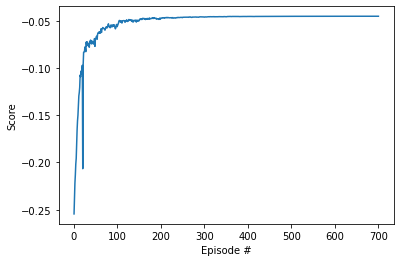

In [5]:
#Execute the cross entrophy method with default Values
#scores = cem()


#To don't ask the GPU as much reduce the pop_size, it's the amount of elemts try
scores,best_actions = cem_no_net()
# 
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
    

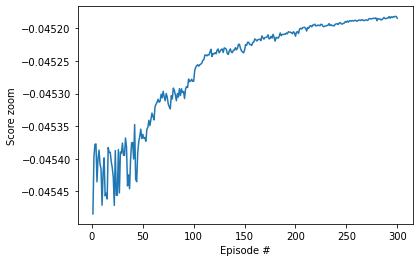

In [6]:

# plot the last scores zoom
fig = plt.figure()
zoom= 300
ax = fig.add_subplot(111)
plt.plot(np.arange(1, zoom+1), scores[-zoom:])
plt.ylabel('Score zoom')
plt.xlabel('Episode #')
plt.show()

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


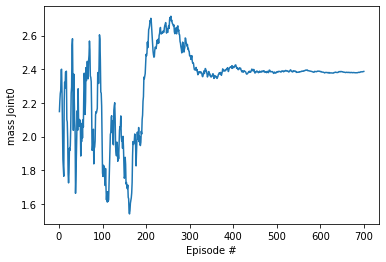

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


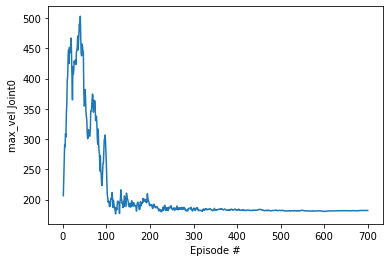

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


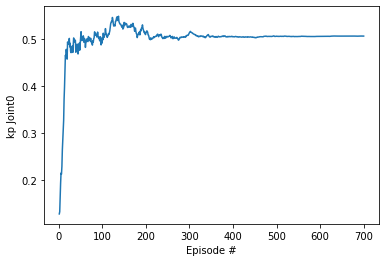

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


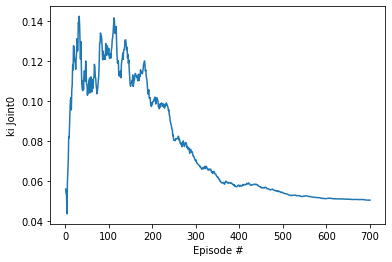

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


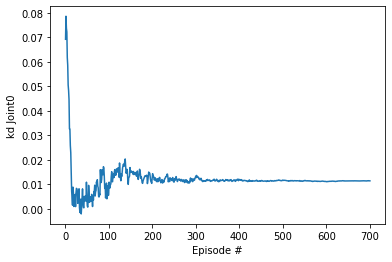

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


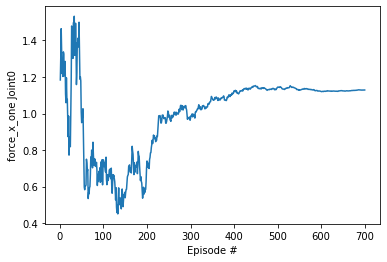

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


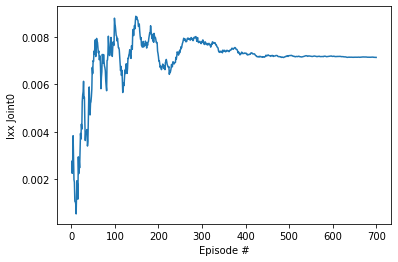

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


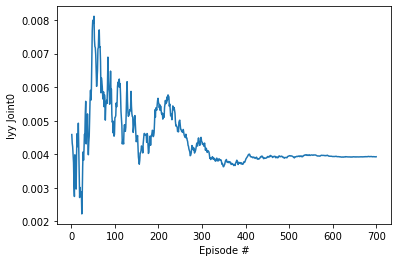

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


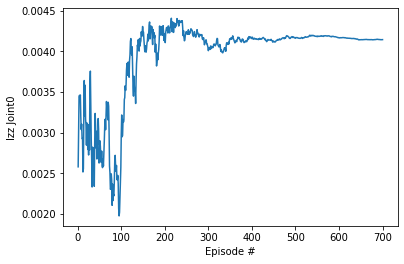

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


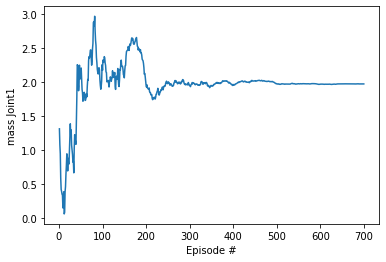

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


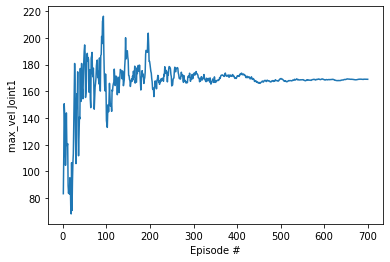

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


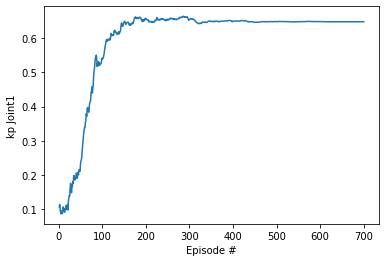

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


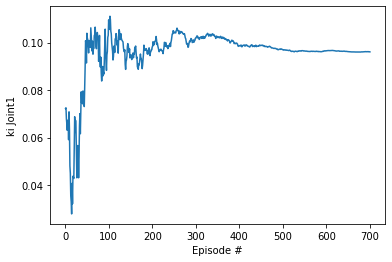

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


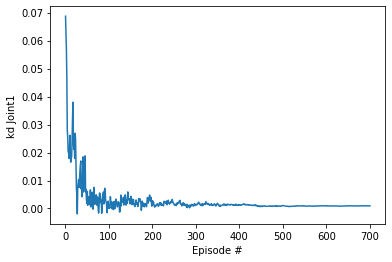

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


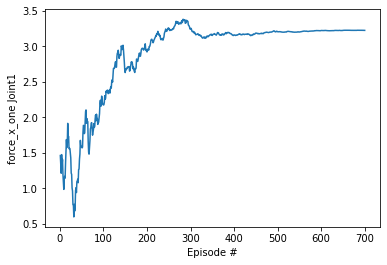

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


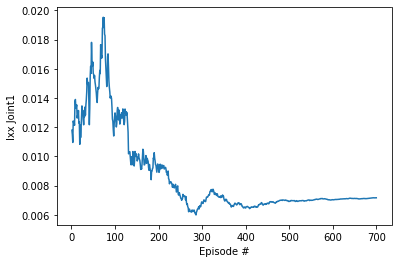

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


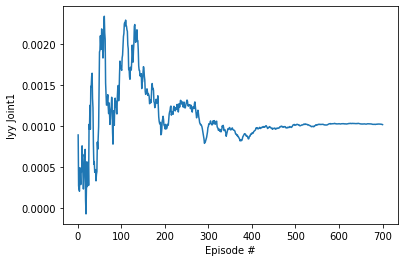

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


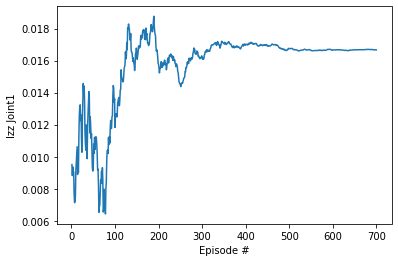

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


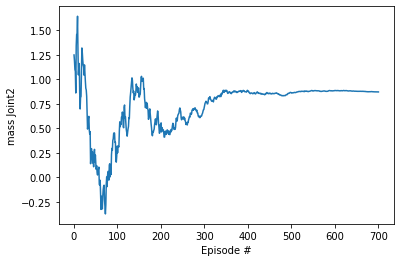

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


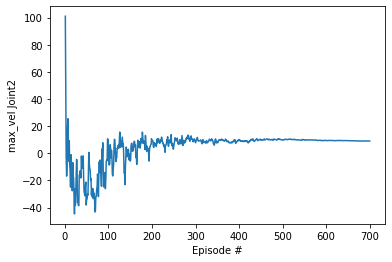

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


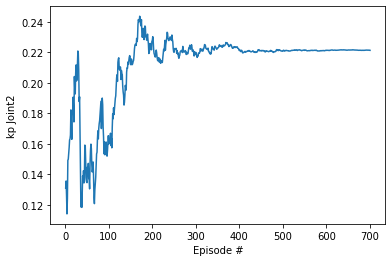

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


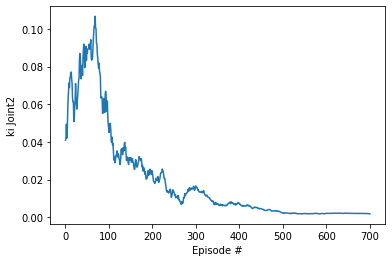

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


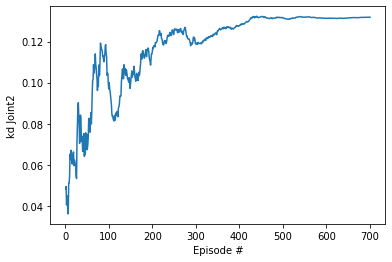

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


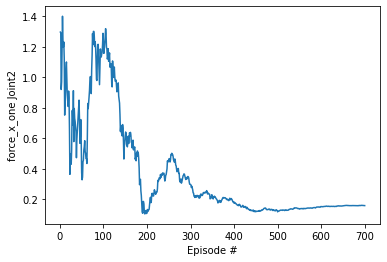

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


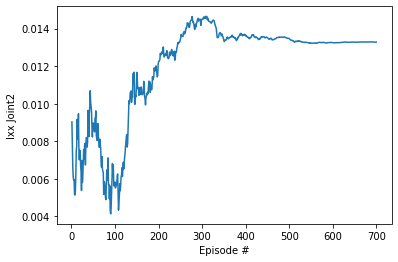

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


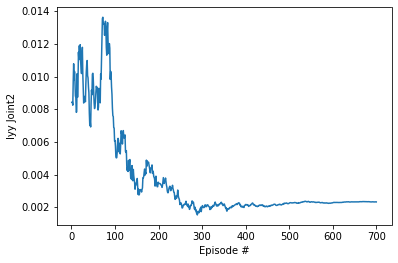

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


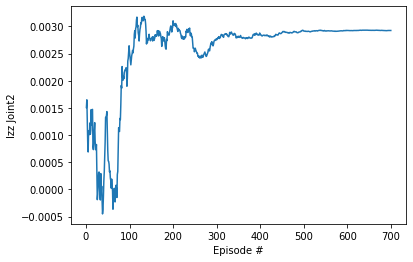

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


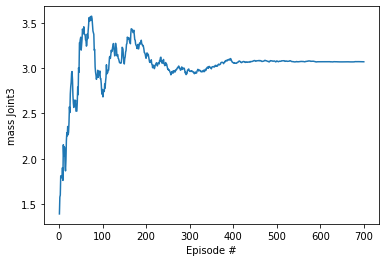

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


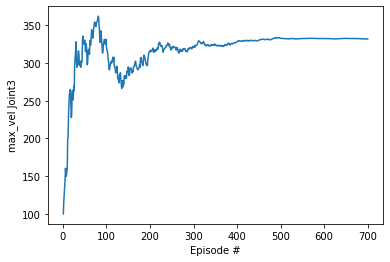

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


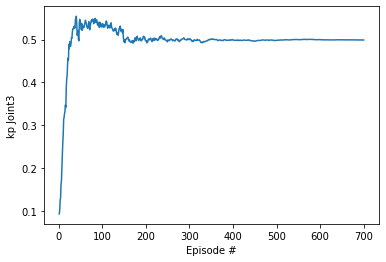

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


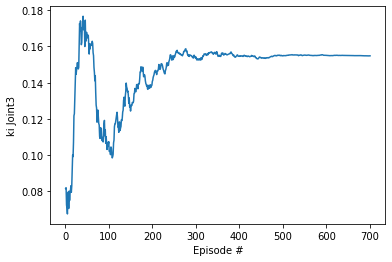

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


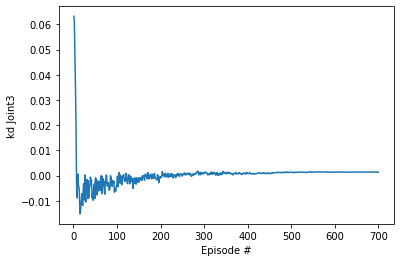

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


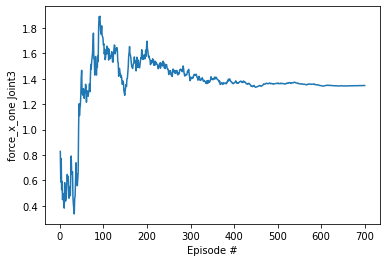

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


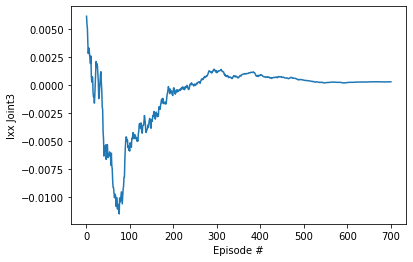

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


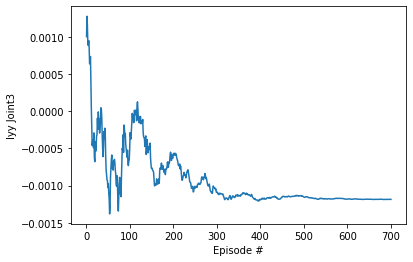

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


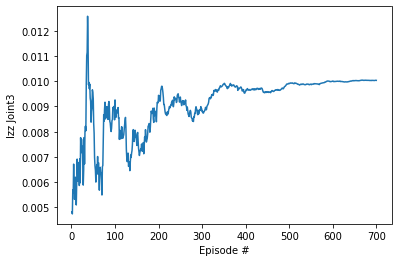

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


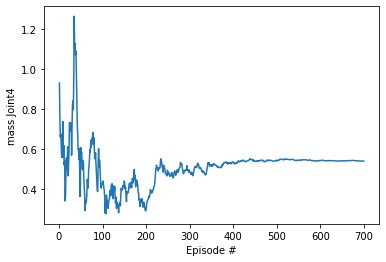

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


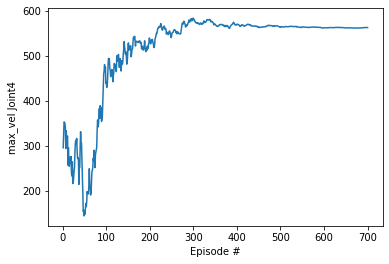

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


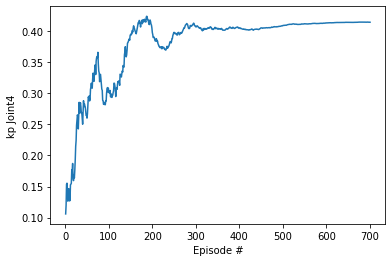

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


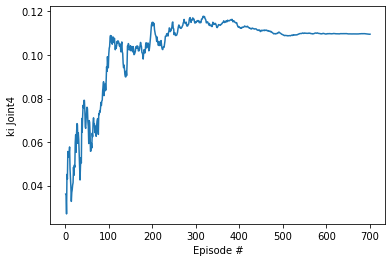

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


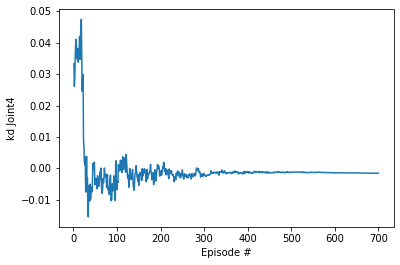

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


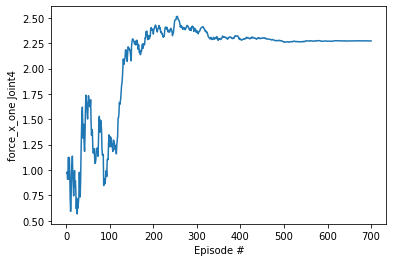

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


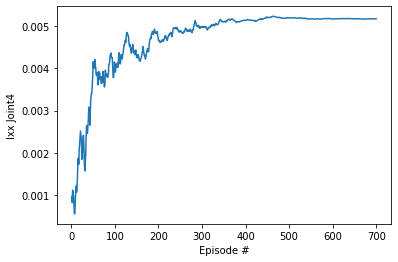

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


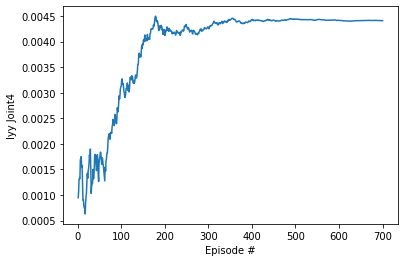

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


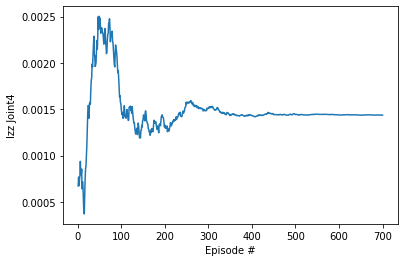

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


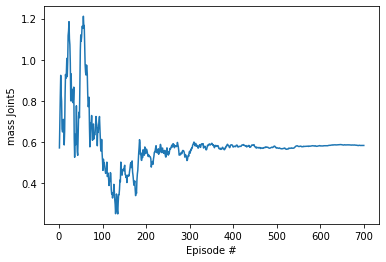

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


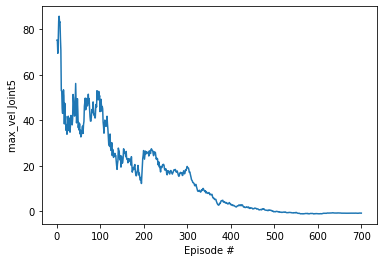

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


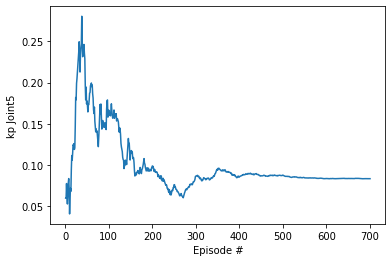

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


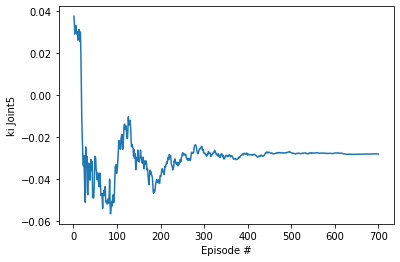

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


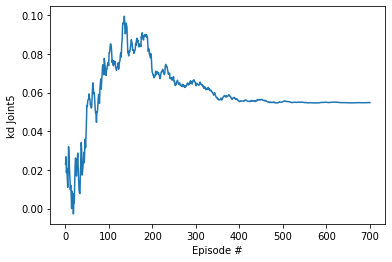

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


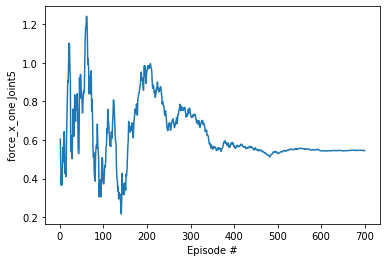

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


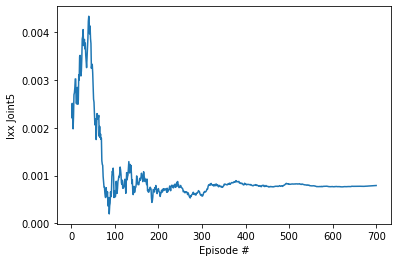

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


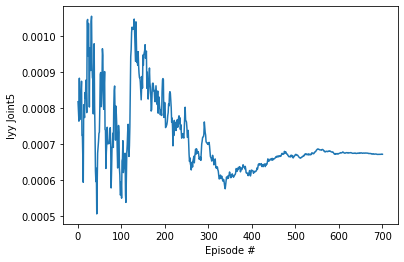

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


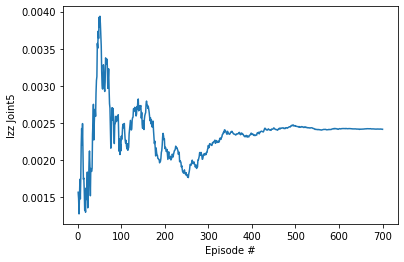

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


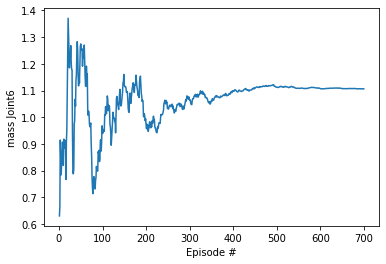

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


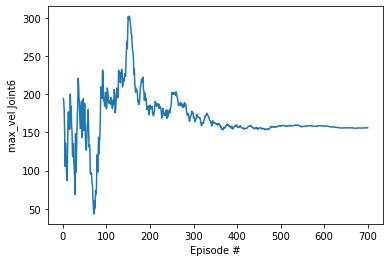

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


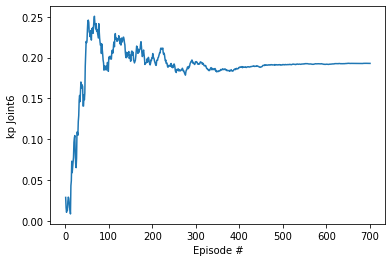

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


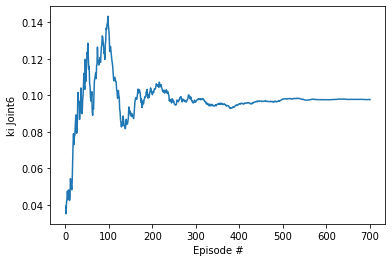

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


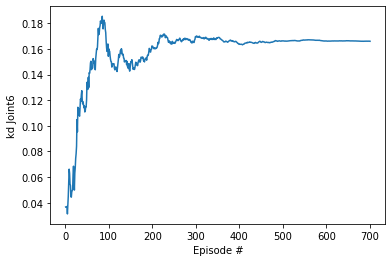

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


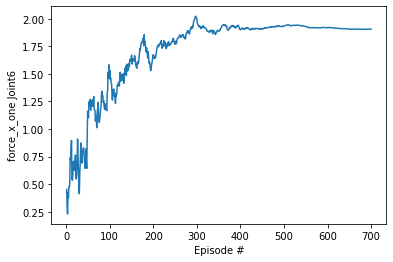

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


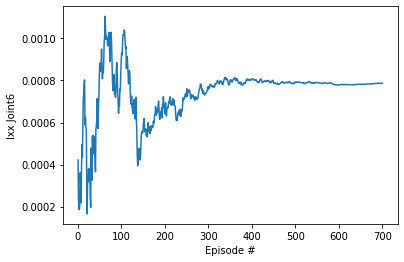

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


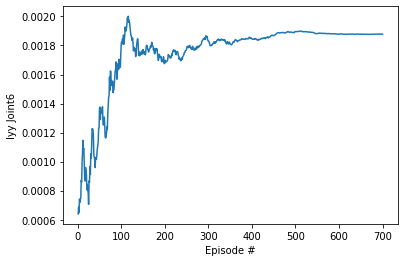

/home/sergi/anaconda3/envs/Train/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


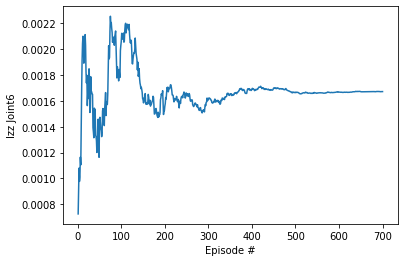

In [7]:
# plot actions
best_actions_np = np.array(best_actions)
for joint in range(7):
    for i in range(len(env.parameters_to_modify)) :
        parameter = env.parameters_to_modify[i]
        figures = plt.figure()
        ax = fig.add_subplot(111)
        plt.plot(np.arange(1, best_actions_np.shape[0]+1), best_actions_np[:,joint+i*7])
        plt.ylabel(parameter+" Joint"+str(joint))
        plt.xlabel('Episode #')
        plt.show()

In [3]:
# load the weights from file
# Not working know


#state = env.reset()
env = env_pybullet_kin_gen3(no_zeros = True,Excels_path_Okay_tcp_list = ["Tcp_Trajectori_19_1.xlsx","Tcp_Trajectori_39_1.xlsx","Tcp_Trajectori_59_1.xlsx"],\
                            Actions_offsets_Numpy_files = ["acs_19_tcp.npy","acs_39_tcp.npy","acs_59_tcp.npy"],time_step=0.02,home_angles = [-0.207226464676801,1.5689993219813,-1.01515387451347,-2.45271819663908,2.00795352004673,1.91098991659003,-0.831045149646278])
env.robot.visual_inspection = True

#Make maxvels closer to the reality
env.max_vel = [168,151,128,94,210,48,189]
env.original_parameters_df ["max_vel"]=env.max_vel
env.modified_parameters_df ["max_vel"]=[168,151,128,94,210,48,189]

env.update_parameters_to_modify(["mass","max_vel","kp","ki","kd","force_x_one","Ixx","Iyy","Izz","damping"])
#env.update_parameters_to_modify_base(["mass_base","Ixx_base","Iyy_base","Izz_base"])
env.robot.visual_inspection = True
env.modified_parameters_df = env.create_df_from_Excel("./Parameters_train_tcp_euc_rishabh_joint_offset_base.xlsx")


t.sleep(0.02)
action = env.action_modified()
action = np.array(action)
print('original action:', env.action_original()) #parameters, number of parameters choose to tune, continuous
print("trained",action)
reward = env.step_tcp_rishabh_joints_offset(action,Experiment_time=1.22)
print("reward")
print(reward)



hola
../Simulation_Pybullet/models/urdf/JACO3_URDF_V11.urdf
Robot launched
hola
(7, 12)
(7, 17)
Base parameters mod    mass_base  Ixx_base  Iyy_base  Izz_base
0   1.697353  0.005787  0.005796  0.002735
Base parameters     mass_base  Ixx_base  Iyy_base  Izz_base
0   1.697353  0.005787  0.005796  0.002735
mass okey
max_vel okey
kp okey
ki okey
kd okey
force_x_one okey
Ixx okey
Iyy okey
Izz okey
damping okey
actions without base 7
actions without base 14
actions without base 21
actions without base 28
actions without base 35
actions without base 42
actions without base 49
actions without base 56
actions without base 63
actions without base 70
original action: [1.377353, 1.163667, 1.16366, 0.930287, 0.678106, 0.678106, 0.500657, 168, 151, 128, 94, 210, 48, 189, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 1, 1, 1, 1, 1, 1, 1, 0.00480078220558528, 0.008418724123621643, 0.007544516197001279, 0.0064096919604697605, 0.00

In [4]:
#Convert to excel
a = env.df_avg.to_numpy()
print(a[:,5])
env.df_avg.to_excel("./Train_parameters_result_tcp_euc_rishabh_joint_offset_base_19.xlsx")

[-0.009355    0.03149795  0.14596862  0.15541317  0.17796331  0.18211242
  0.21996065  0.30969988  0.36617057  0.40705811  0.37924968  0.43473582
  0.48127181  0.46502794  0.53382292  0.5133829   0.52033182  0.53652807
  0.64276569  0.73208134  0.75905185  0.78496492  0.84960525  0.93320501
  0.99592562  0.96422     0.94259678  0.91728427  0.91821884  0.97318452
  0.99386221  0.94905105  0.93371073  1.00547583  0.98079746  1.07242415
  1.14098939  1.10483726  1.18366468  1.24386344  1.21341232  1.20341731
  1.18122358  1.15528137  1.12659158  1.11032899  1.16516796  1.22921851
  1.24522997  1.29968383  1.25313261  1.29912669  1.33967229  1.28329408
  1.23704705  1.18805854  1.2418777   1.18917095  1.24450351  1.19649471
  1.24555688]


In [ ]:
env.original_parameters_df

In [ ]:
#Original ERROR
# load the weights from file
# Not working know


#state = env.reset()
env = env_pybullet_kin_gen3(no_zeros = True,Excels_path_Okay_tcp_list = ["Tcp_Trajectori_19_1.xlsx","Tcp_Trajectori_39_1.xlsx","Tcp_Trajectori_59_1.xlsx"],\
                            Actions_offsets_Numpy_files = ["acs_19_tcp.npy","acs_39_tcp.npy","acs_59_tcp.npy"],time_step=0.02,home_angles = [-0.207226464676801,1.5689993219813,-1.01515387451347,-2.45271819663908,2.00795352004673,1.91098991659003,-0.831045149646278])
#Make maxvels closer to the reality
env.max_vel = [168,151,128,94,210,48,189]
env.original_parameters_df ["max_vel"]=env.max_vel
env.modified_parameters_df ["max_vel"]=[168,151,128,94,210,48,189]

env.update_parameters_to_modify(["mass","max_vel","kp","ki","kd","force_x_one","Ixx","Iyy","Izz"])
#env.update_parameters_to_modify_base(["mass_base","Ixx_base","Iyy_base","Izz_base"])
env.robot.visual_inspection = True
env.modified_parameters_df = env.original_parameters_df


t.sleep(10)
action = env.action_modified()

action = np.array(action)
print(action)
reward = env.step_tcp_rishabh_joints_offset(action,Experiment_time=1.22)

print("reward")
print(reward)

In [ ]:
#Convert to excel
a = env.df_avg.to_numpy()
print(a[:,5])
env.df_avg.to_excel("./Original_parameters_result_tcp_euc_rishabh_joint_offset_59.xlsx")